In [1]:
import pandas as pd
df = pd.read_csv('clean_data.csv')

#drop first column Unnamed: 0
df.drop(columns=['Unnamed: 0'], inplace =True)

df.head()

user_id regist_date  gender age_group       region is_rural_or_urban  \
0  418329478  2021-04-06  Female     19-24  Jabodetabek             RURAL   
1  439733301  2021-05-08  Female     19-24  Jabodetabek             RURAL   
2  434646106  2021-05-01  Female     19-24  Jabodetabek             RURAL   
3  453720531  2021-05-29  Female     19-24  Jabodetabek             RURAL   
4  418277451  2021-04-06  Female     19-24  Jabodetabek             RURAL   

   is_buyer_14d  is_dp_buyer_14d  label  \
0             0                0      0   
1             0                0      0   
2             0                0      0   
3             0                0      0   
4             0                0      0   

                    new_buyer_initiative  ...  use_regular  use_hemat  \
0  Serba Seribu - Price Point Collection  ...          0.0        0.0   
1                                 No KSP  ...          0.0        0.0   
2                                    FSV  ...          0.0        0.0   
3                      Shopee Dari Rumah  ...          0.0        0.0   
4                                    FSV  ...          0.0        0.0   

   shop_mall  shop_ss_plus  shop_cb  shop_sbs  shop_normal_shop  \
0        0.0           0.0      0.0       0.0               0.0   
1        0.0           0.0      0.0       0.0               0.0   
2        0.0           0.0      0.0       0.0               0.0   
3        0.0           0.0      0.0       0.0               0.0   
4        0.0           0.0      0.0       0.0               0.0   

   shop_flash_sale  activate_shopeepay  top_up_14d  
0              0.0                   0         0.0  
1              0.0                   0         0.0  
2              0.0                   0         0.0  
3              0.0                   0         0.0  
4              0.0                   0         0.0  

[5 rows x 37 columns]

In [2]:
df.isnull().sum()

user_id                        0
regist_date                    0
gender                         0
age_group                      0
region                         0
is_rural_or_urban              0
is_buyer_14d                   0
is_dp_buyer_14d                0
label                          0
new_buyer_initiative         378
total_voucher_claim_14d        0
total_order_14d                0
gmv_14d                        0
pdp_views_14d                  0
shop_views_14d                 0
total_login_days_l14d          0
total_login_sessions_l14d      0
time_spent_platform_14d        0
avg_time_per_session_14d       0
use_shopeepay                  0
use_shopeepaylater             0
use_cod                        0
use_va_bt                      0
use_cc_debit                   0
use_instant                    0
use_sameday                    0
use_nextday                    0
use_regular                    0
use_hemat                      0
shop_mall                      0
shop_ss_pl

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222378 entries, 0 to 222377
Data columns (total 37 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   user_id                    222378 non-null  int64  
 1   regist_date                222378 non-null  object 
 2   gender                     222378 non-null  object 
 3   age_group                  222378 non-null  object 
 4   region                     222378 non-null  object 
 5   is_rural_or_urban          222378 non-null  object 
 6   is_buyer_14d               222378 non-null  int64  
 7   is_dp_buyer_14d            222378 non-null  int64  
 8   label                      222378 non-null  int64  
 9   new_buyer_initiative       222000 non-null  object 
 10  total_voucher_claim_14d    222378 non-null  float64
 11  total_order_14d            222378 non-null  float64
 12  gmv_14d                    222378 non-null  float64
 13  pdp_views_14d              22

# EDA

## correlation table

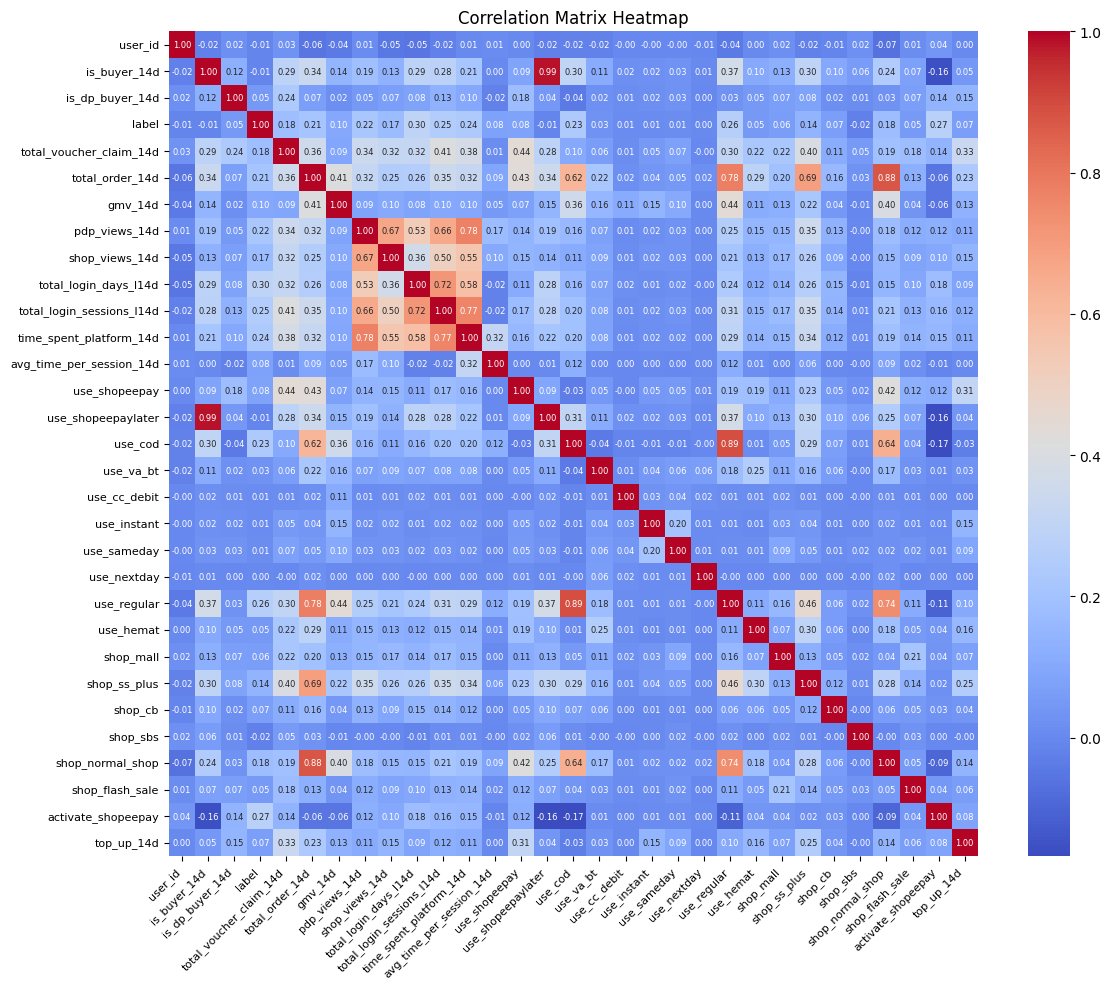

In [4]:
import seaborn as sns

#correlation table
#Get only Numerical value for correlation
numerical_data = df.select_dtypes(include=['number'])  # This selects both int and float columns

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

import matplotlib.pyplot as plt
# Plot the heatmap with adjusted font sizes
plt.figure(figsize=(12, 10))  # You might need to adjust the figure size based on your actual data size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0, 
            annot_kws={'size': 6},  # Reduce annotation font size
            xticklabels=True, yticklabels=True)

# Optionally, rotate the tick labels if it makes them more readable
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=8)  # Adjust y-axis labels font size

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()  # This will fit the plot within the figure area nicely
plt.show()

use_shopeepaylater and is_buyer_14d is highly correlated which indicatea multicolnarity. We can remove one of them. So I dicided to remove is_buyer_14d.

USE_COD and use_regular also highly correlated with 0.89 but it seems like it still important to keep since it might be has smae 0 value for most part which make them has that highly correlated

In [5]:
df.drop(columns=['is_buyer_14d'], inplace=True)
df.head()

user_id regist_date  gender age_group       region is_rural_or_urban  \
0  418329478  2021-04-06  Female     19-24  Jabodetabek             RURAL   
1  439733301  2021-05-08  Female     19-24  Jabodetabek             RURAL   
2  434646106  2021-05-01  Female     19-24  Jabodetabek             RURAL   
3  453720531  2021-05-29  Female     19-24  Jabodetabek             RURAL   
4  418277451  2021-04-06  Female     19-24  Jabodetabek             RURAL   

   is_dp_buyer_14d  label                   new_buyer_initiative  \
0                0      0  Serba Seribu - Price Point Collection   
1                0      0                                 No KSP   
2                0      0                                    FSV   
3                0      0                      Shopee Dari Rumah   
4                0      0                                    FSV   

   total_voucher_claim_14d  ...  use_regular  use_hemat  shop_mall  \
0                      0.0  ...          0.0        0.0        0.0   
1                      0.0  ...          0.0        0.0        0.0   
2                      0.0  ...          0.0        0.0        0.0   
3                      0.0  ...          0.0        0.0        0.0   
4                      0.0  ...          0.0        0.0        0.0   

   shop_ss_plus  shop_cb  shop_sbs  shop_normal_shop  shop_flash_sale  \
0           0.0      0.0       0.0               0.0              0.0   
1           0.0      0.0       0.0               0.0              0.0   
2           0.0      0.0       0.0               0.0              0.0   
3           0.0      0.0       0.0               0.0              0.0   
4           0.0      0.0       0.0               0.0              0.0   

   activate_shopeepay  top_up_14d  
0                   0         0.0  
1                   0         0.0  
2                   0         0.0  
3                   0         0.0  
4                   0         0.0  

[5 rows x 36 columns]

# Correlation with Target variable

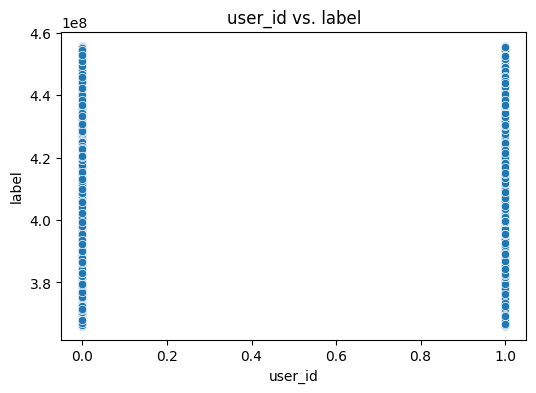

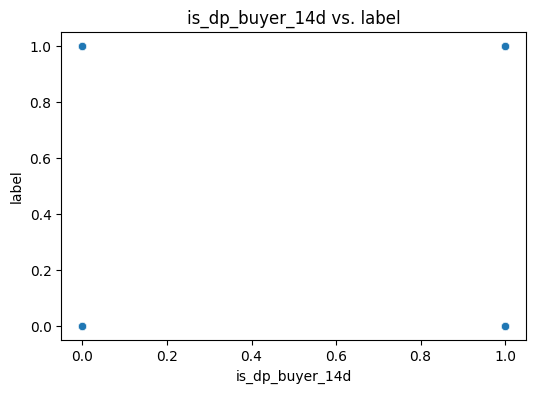

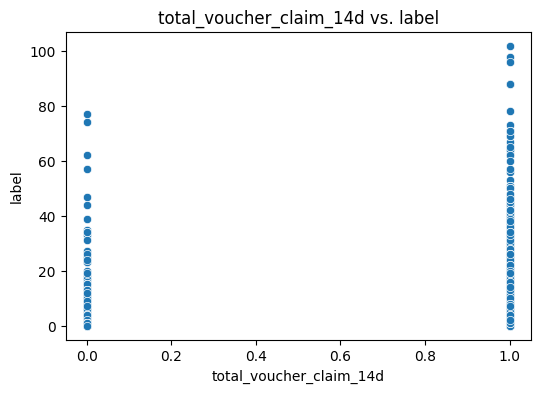

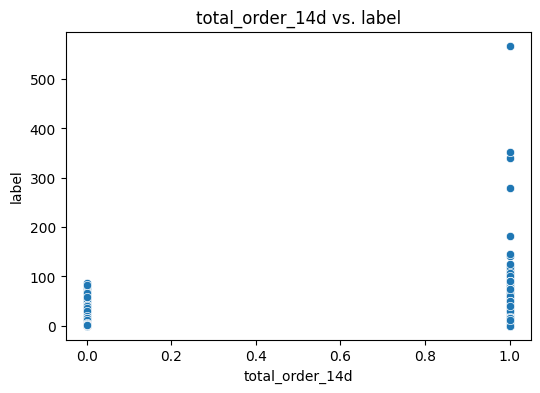

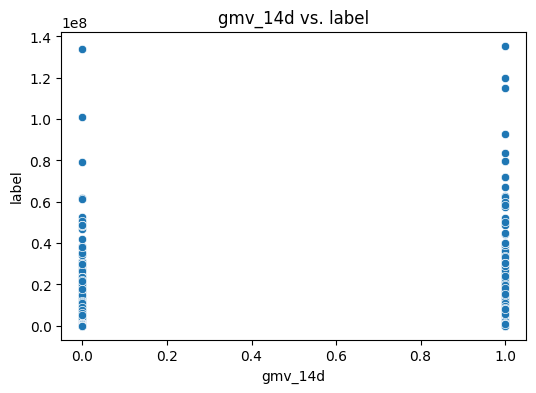

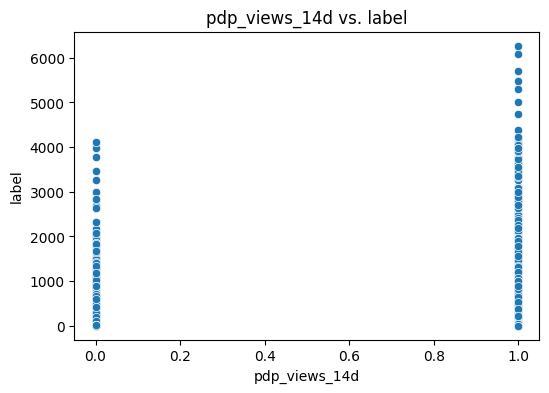

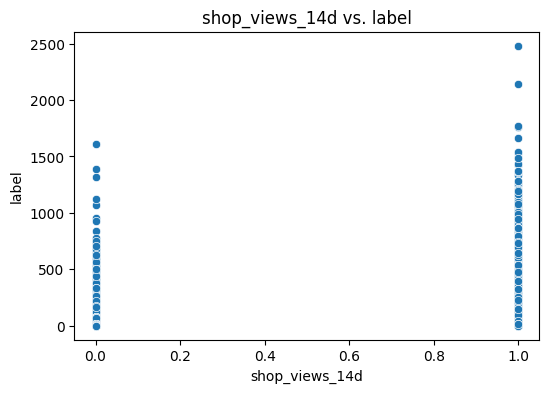

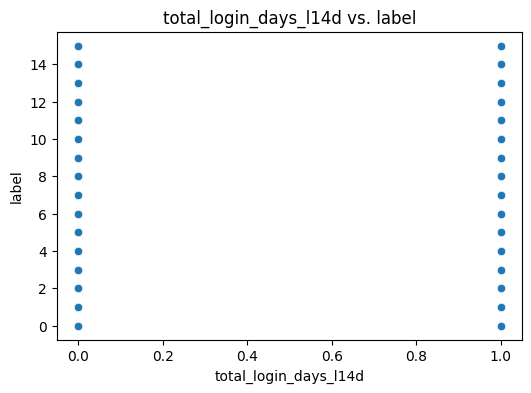

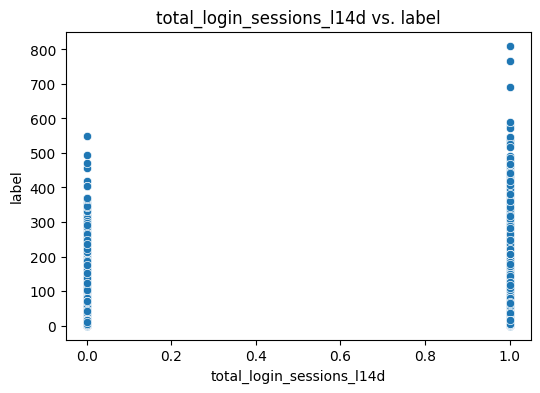

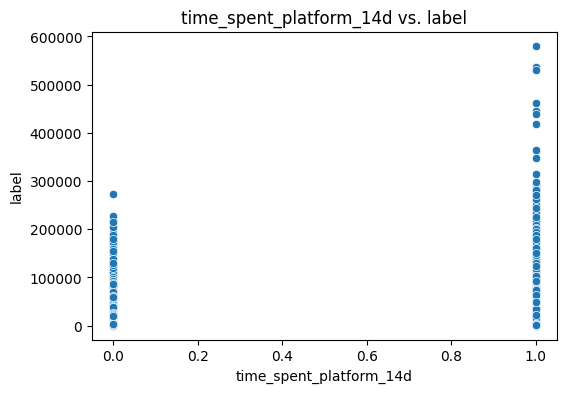

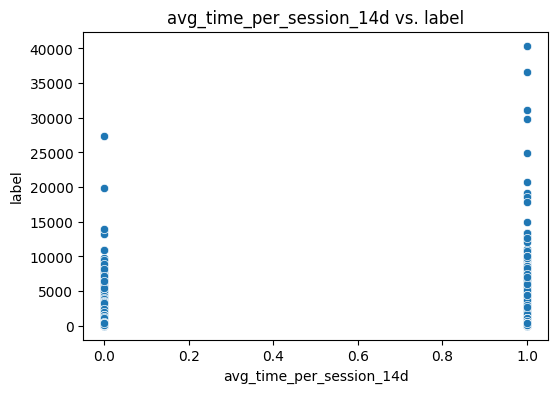

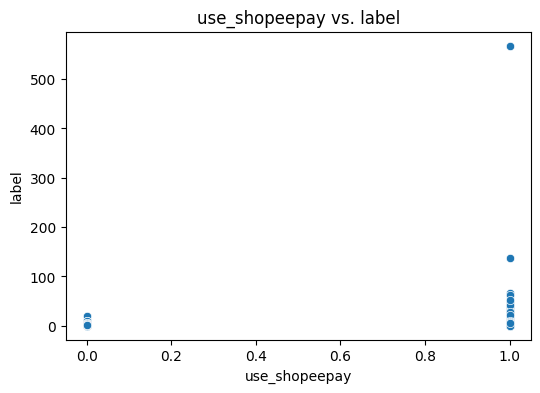

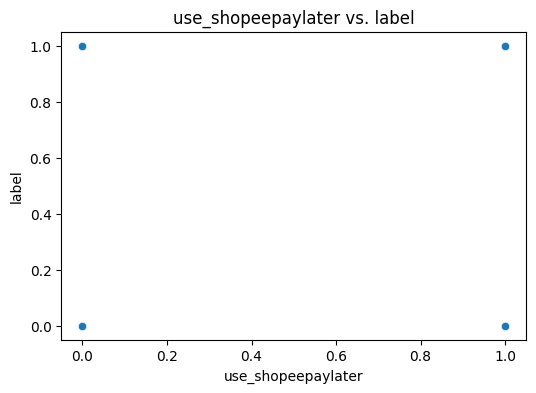

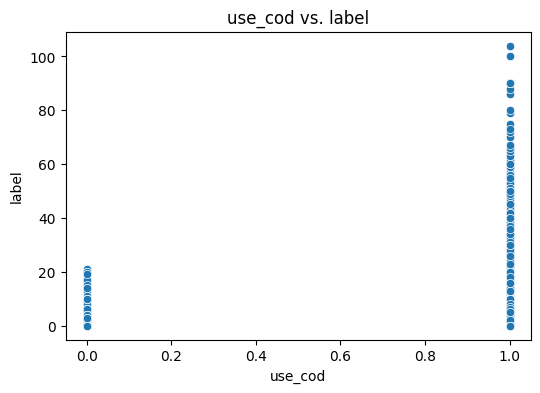

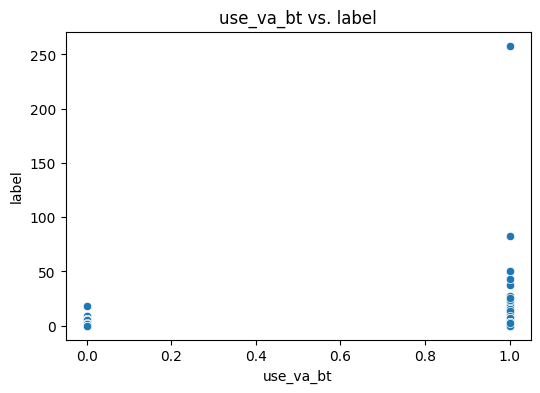

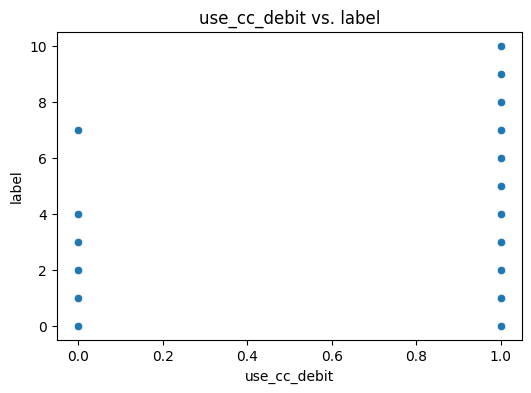

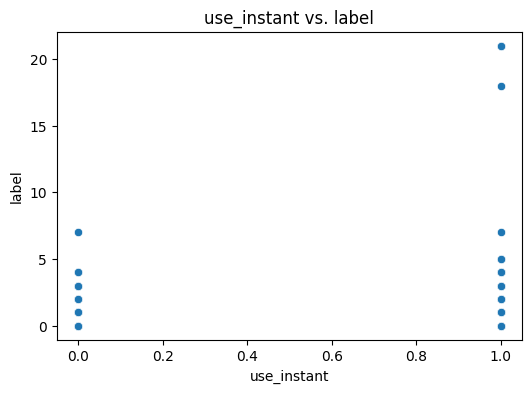

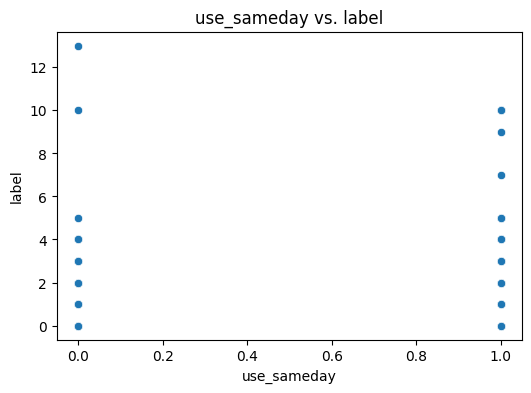

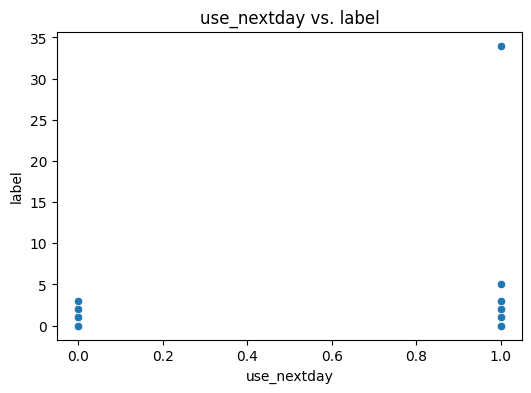

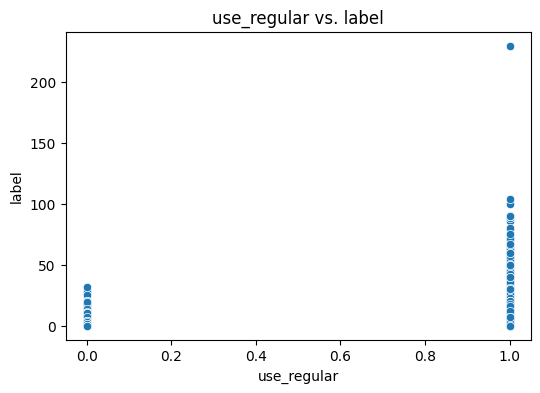

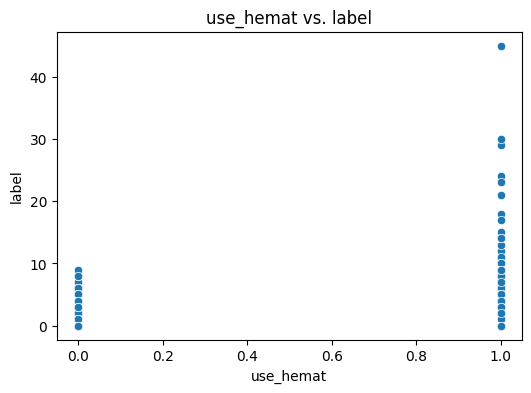

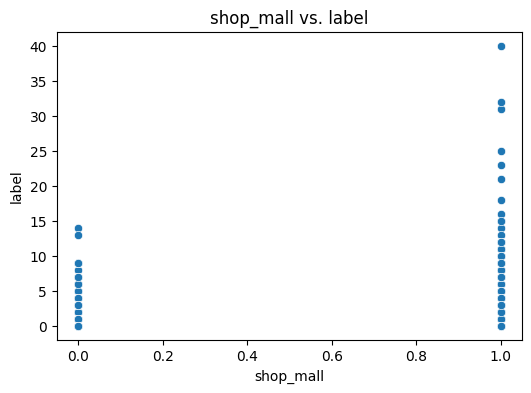

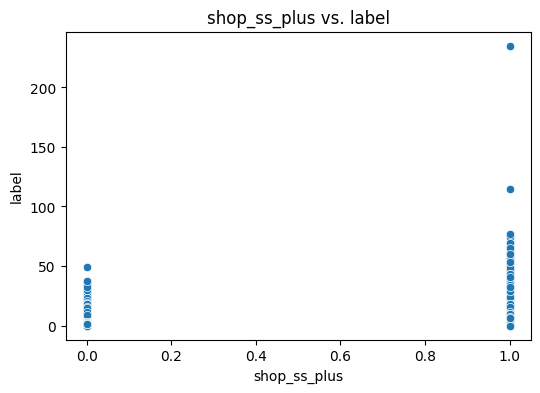

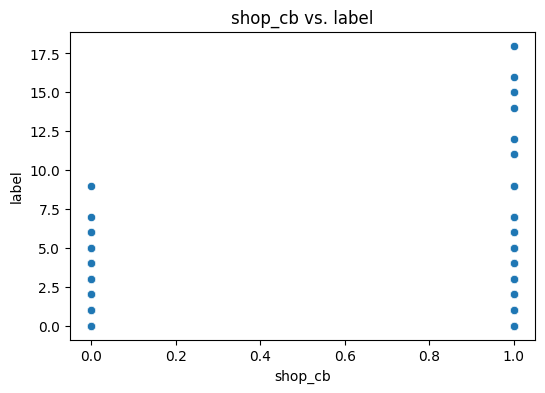

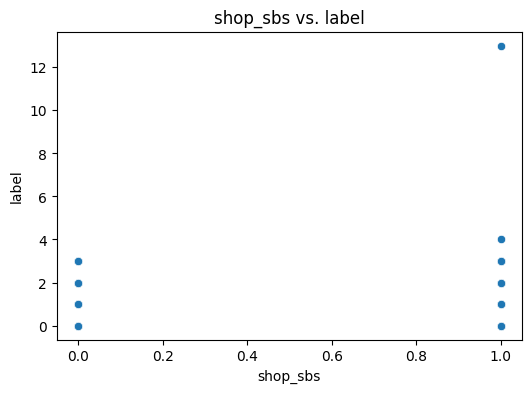

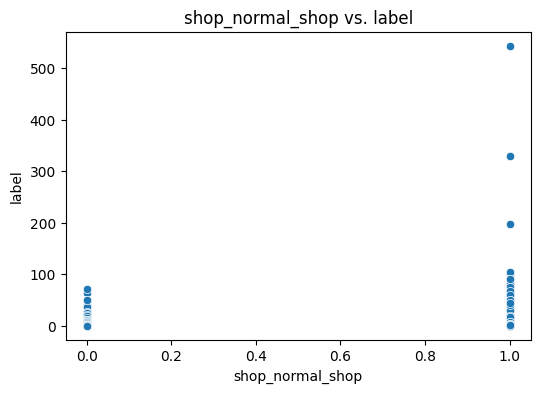

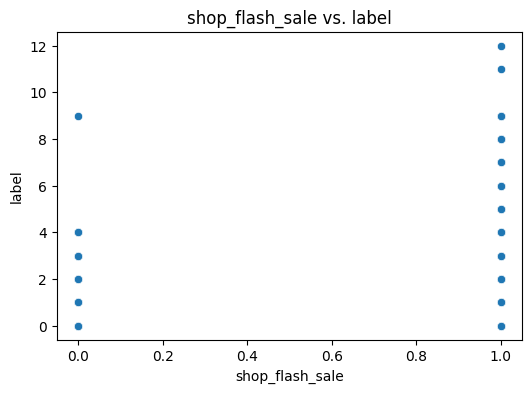

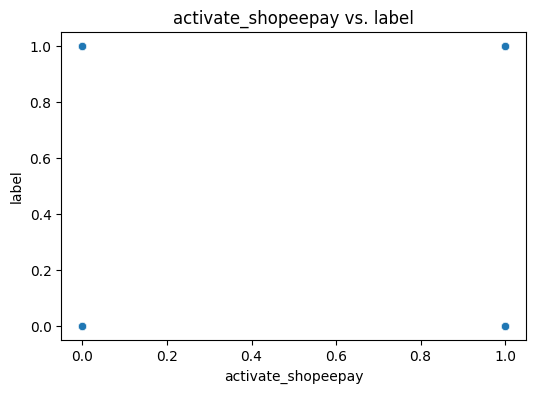

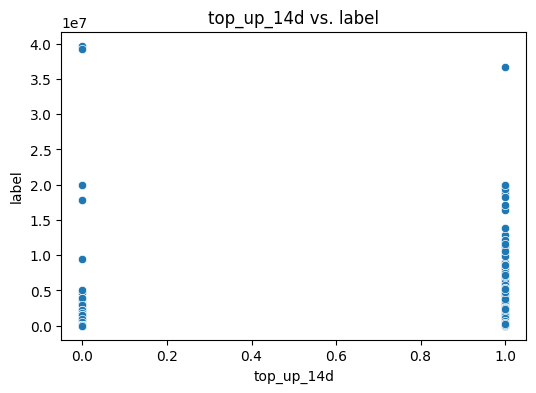

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'label' is the target variable
for column in df.select_dtypes(include=['int64', 'float64']).columns.drop('label'):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df['label'], y=df[column])
    plt.title(f'{column} vs. label')
    plt.xlabel(column)
    plt.ylabel('label')
    plt.show()

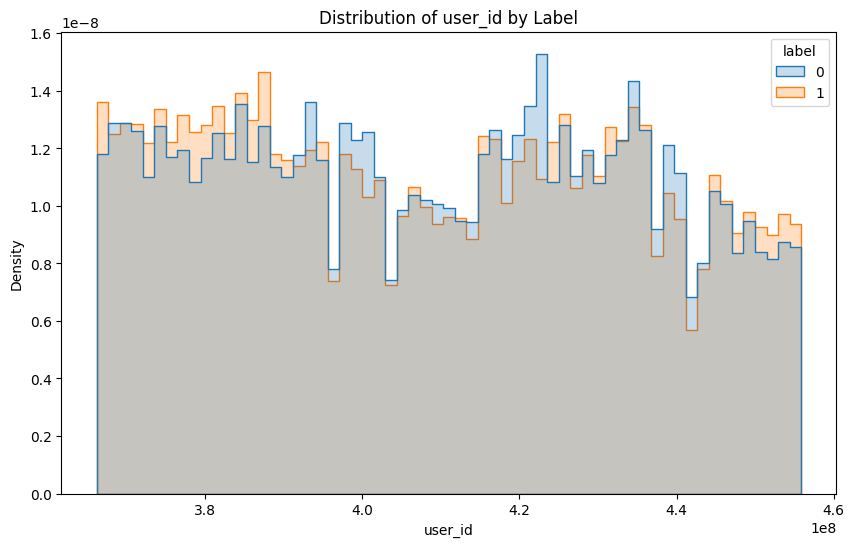

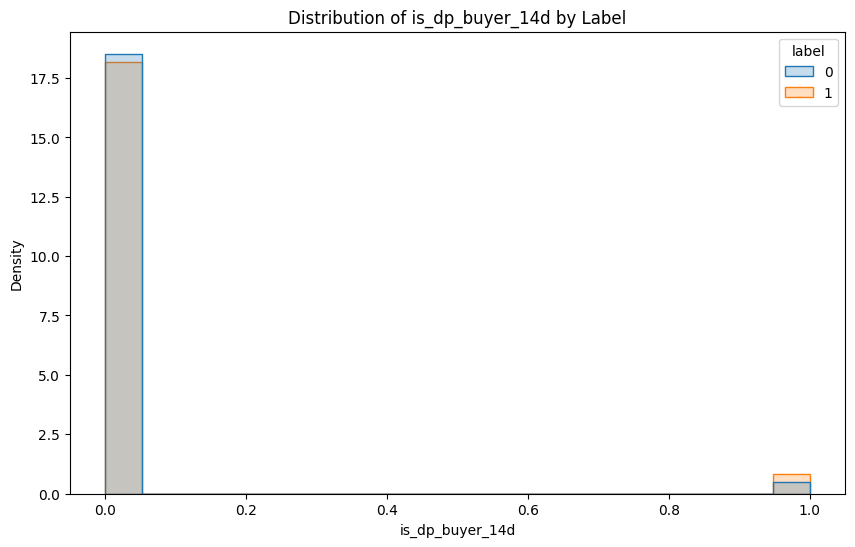

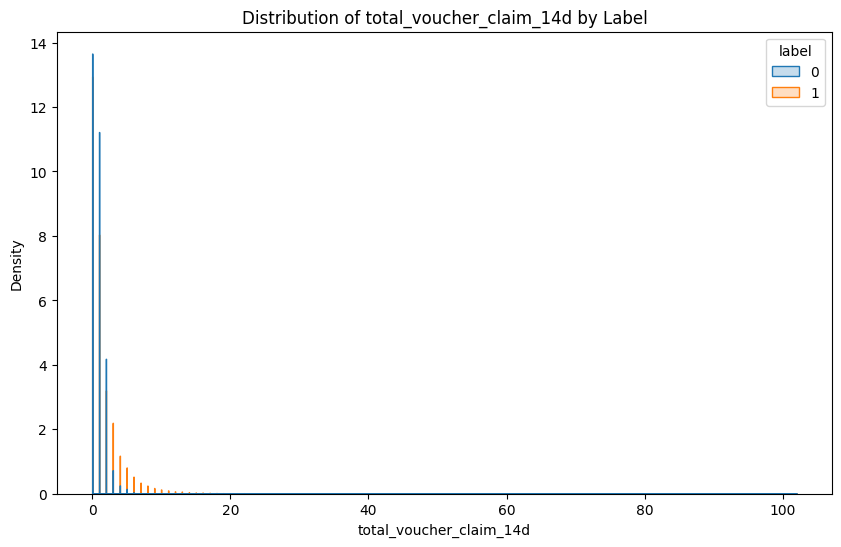

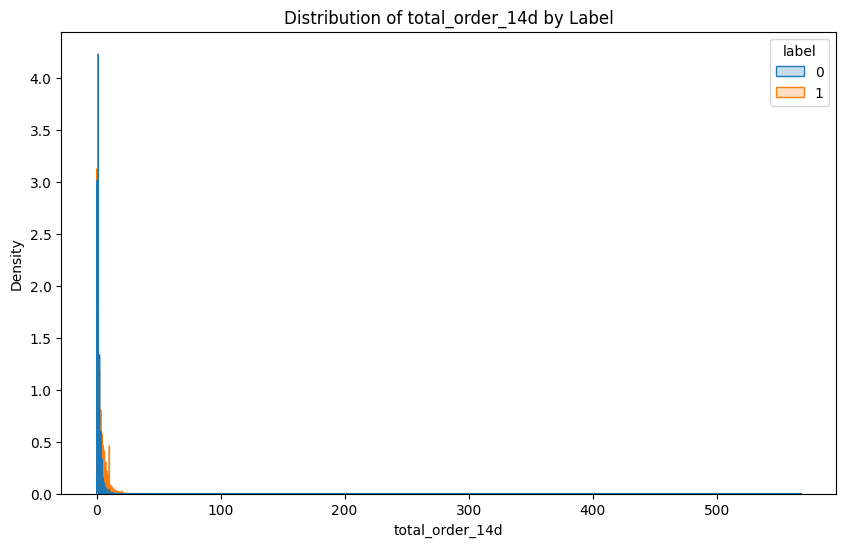

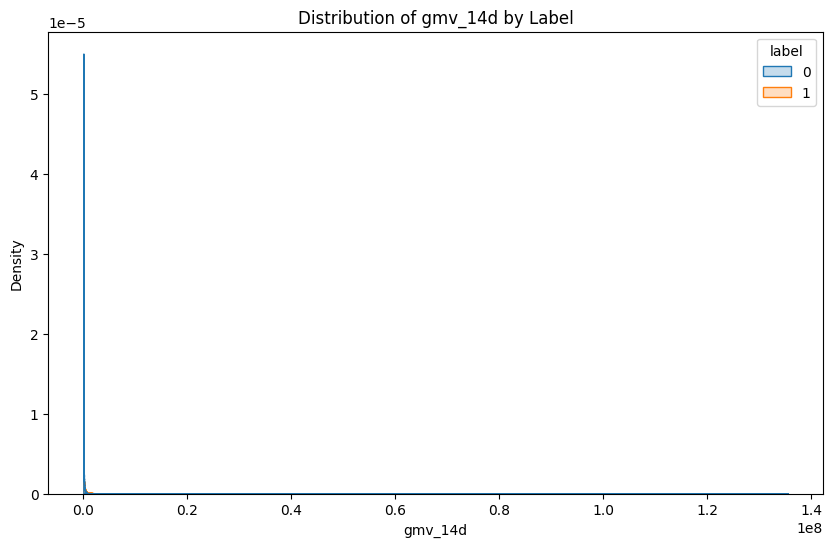

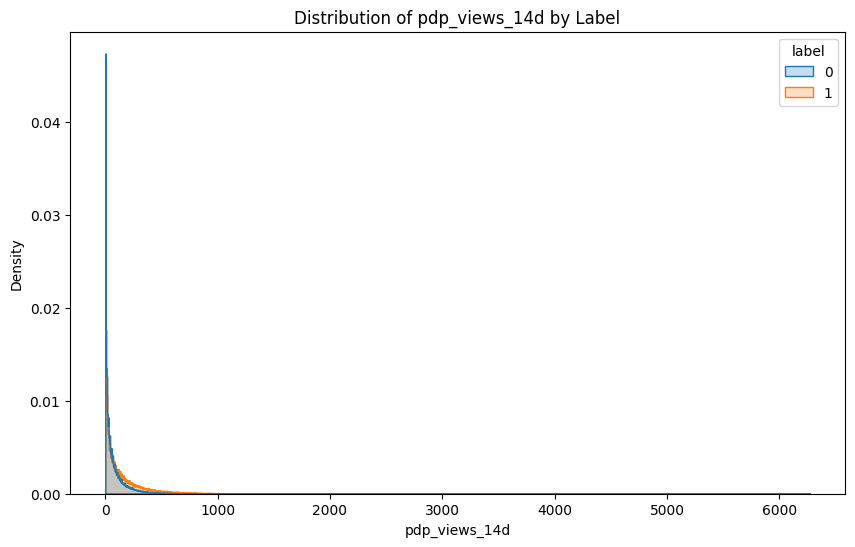

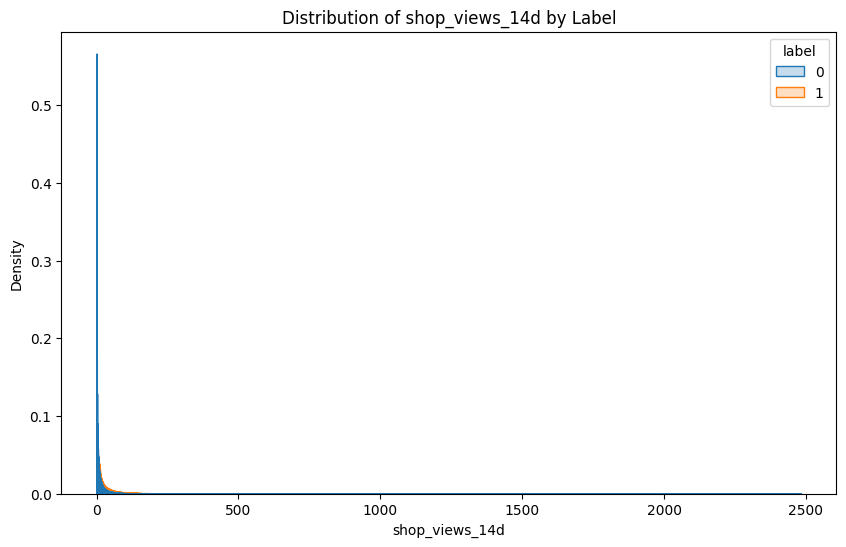

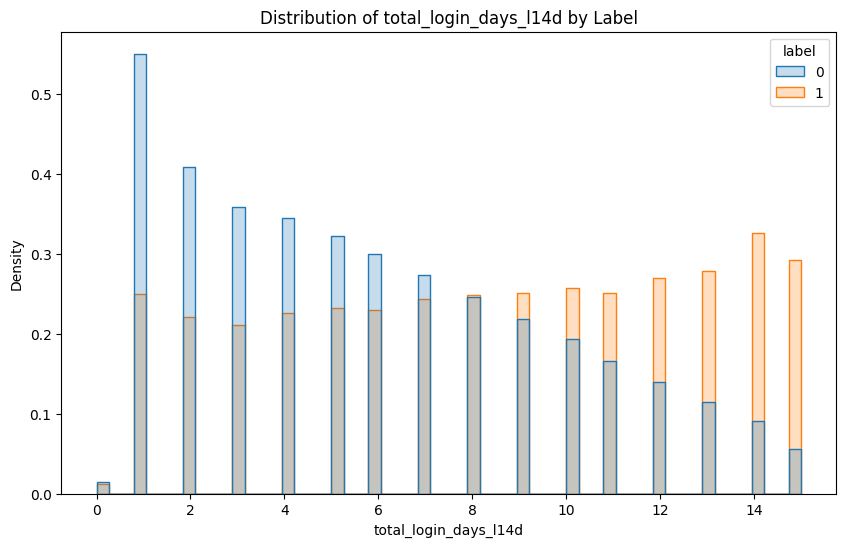

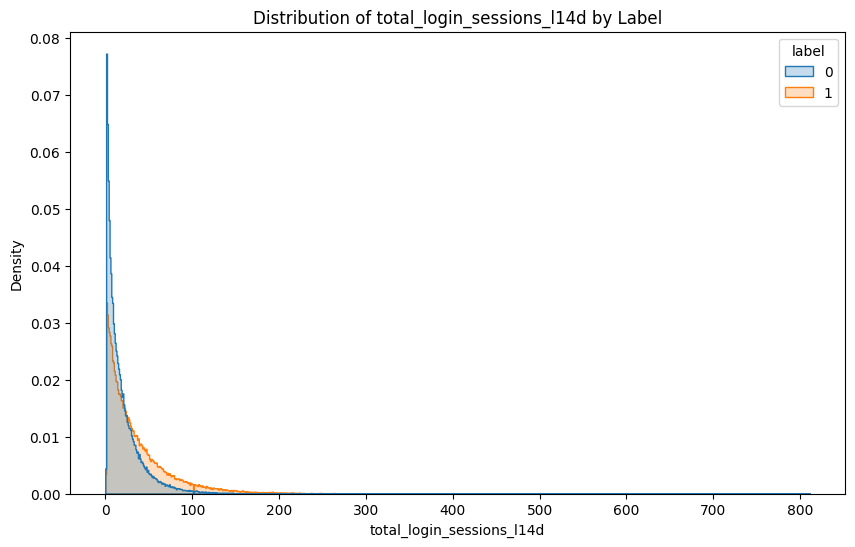

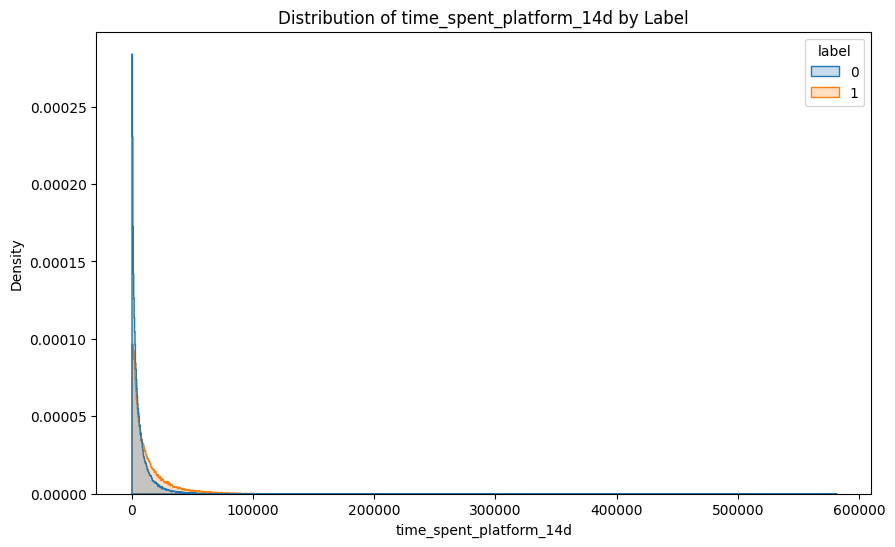

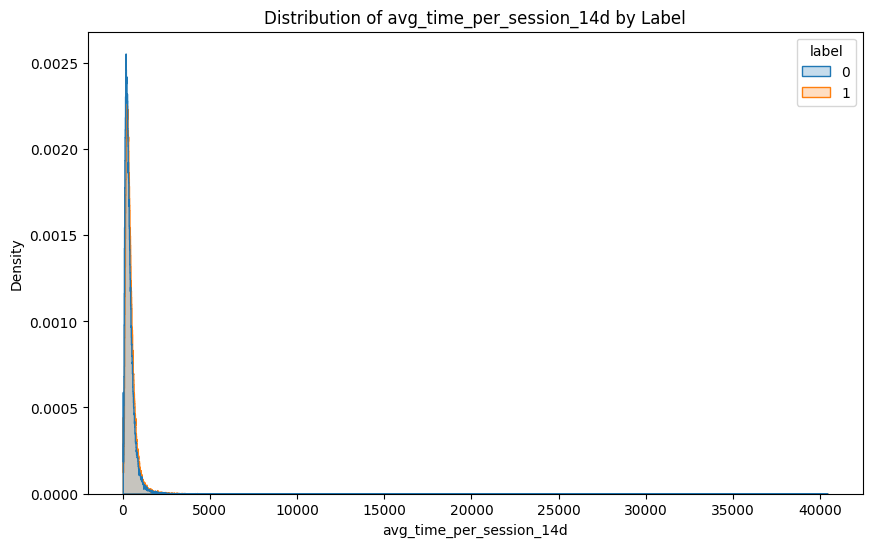

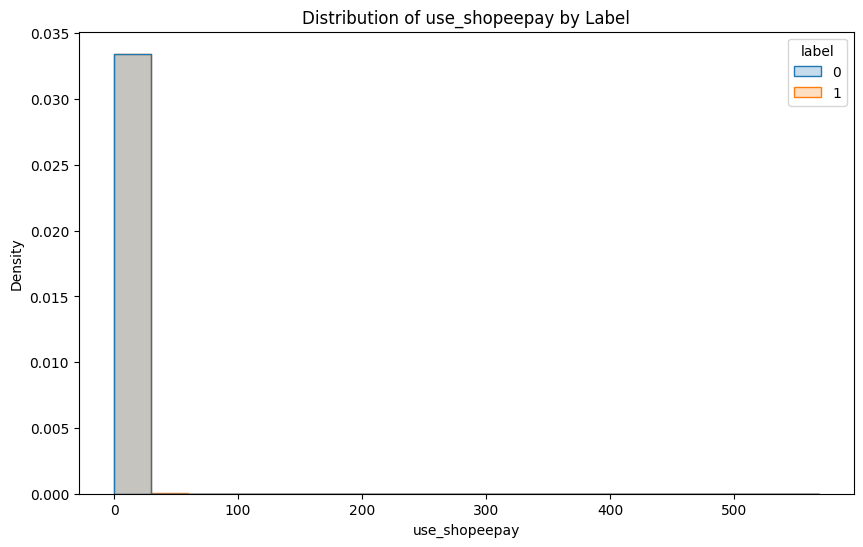

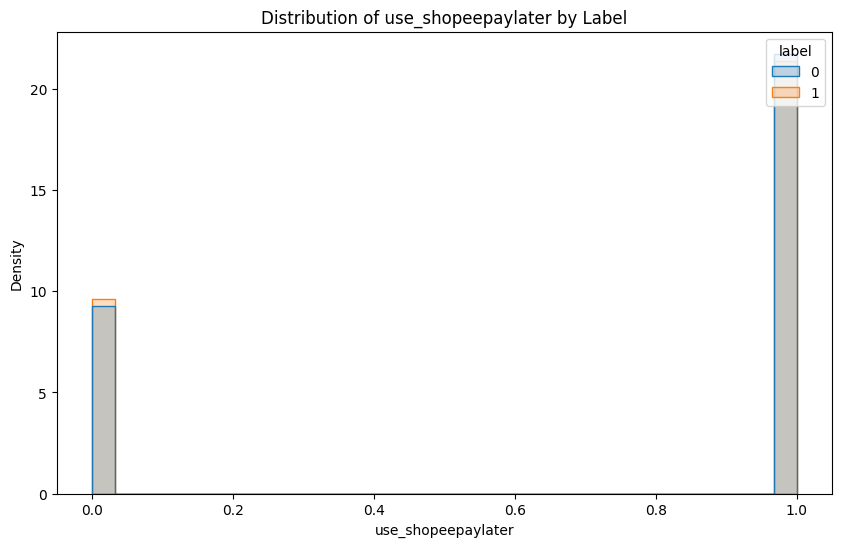

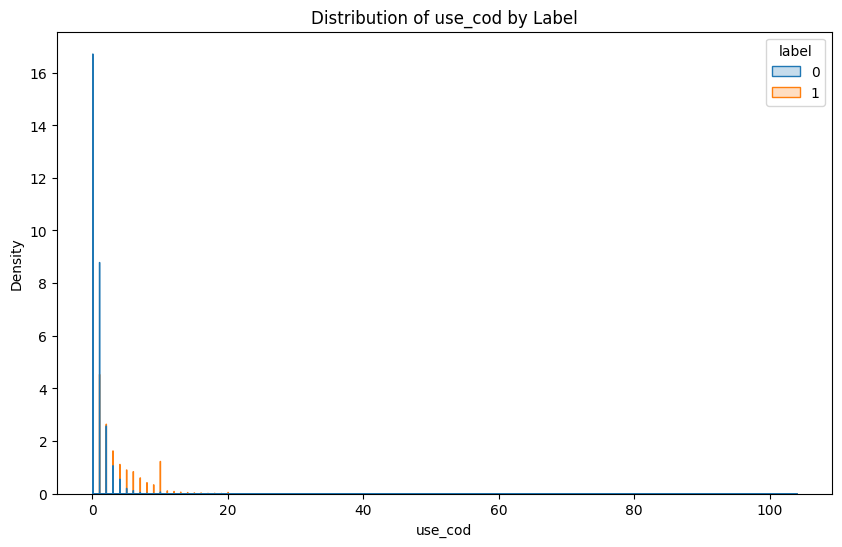

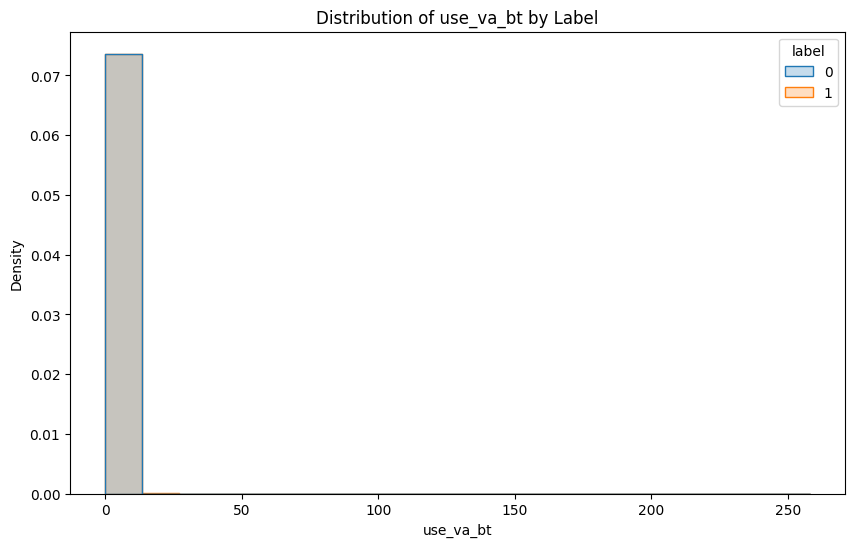

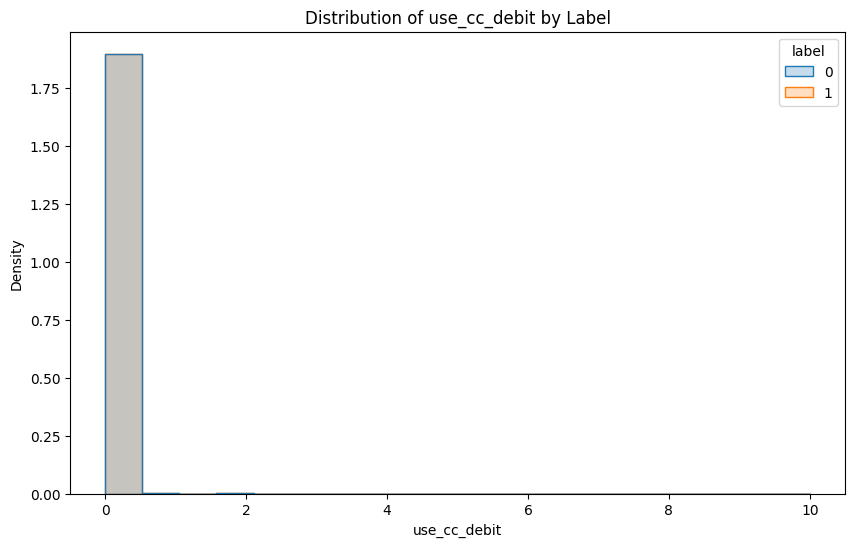

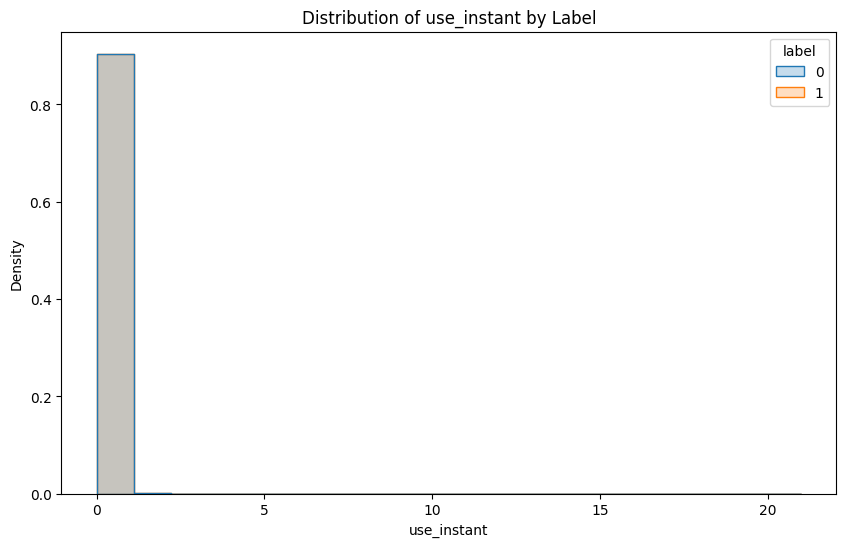

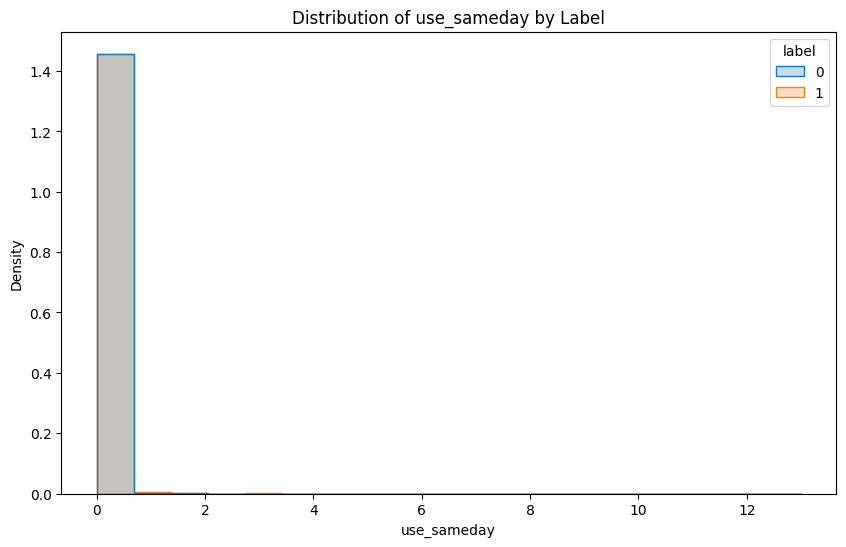

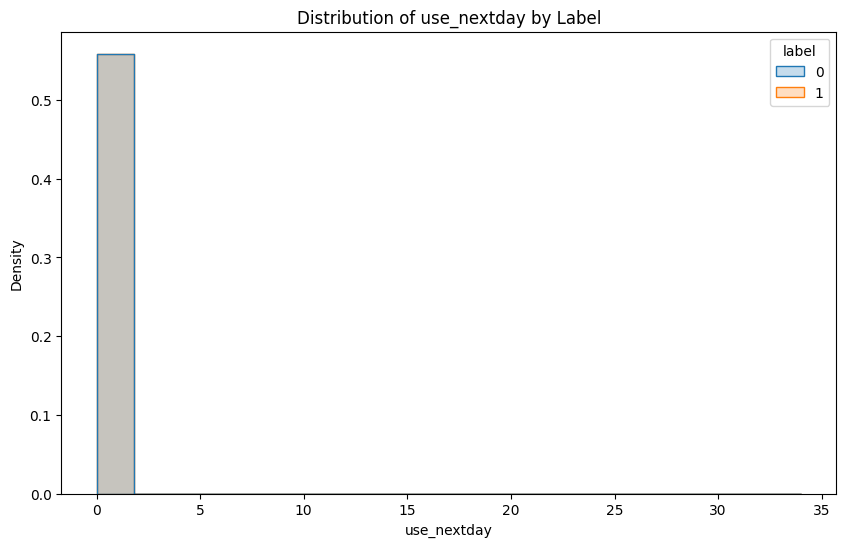

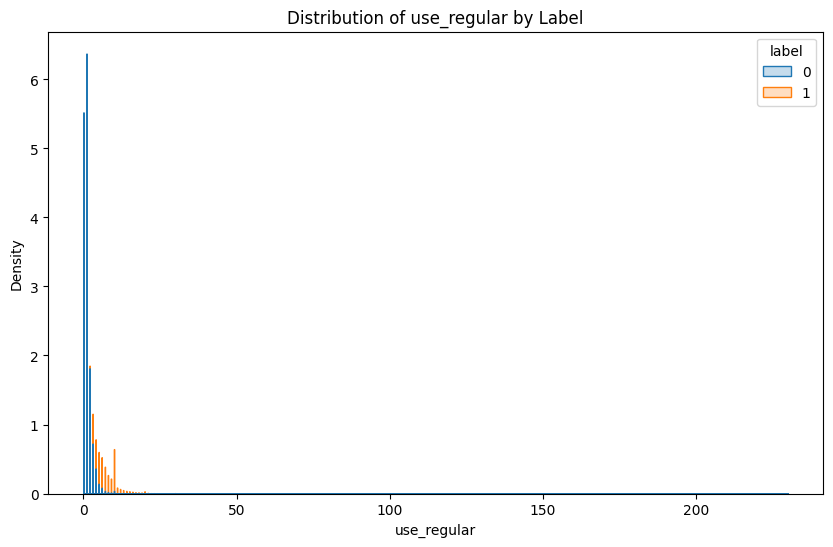

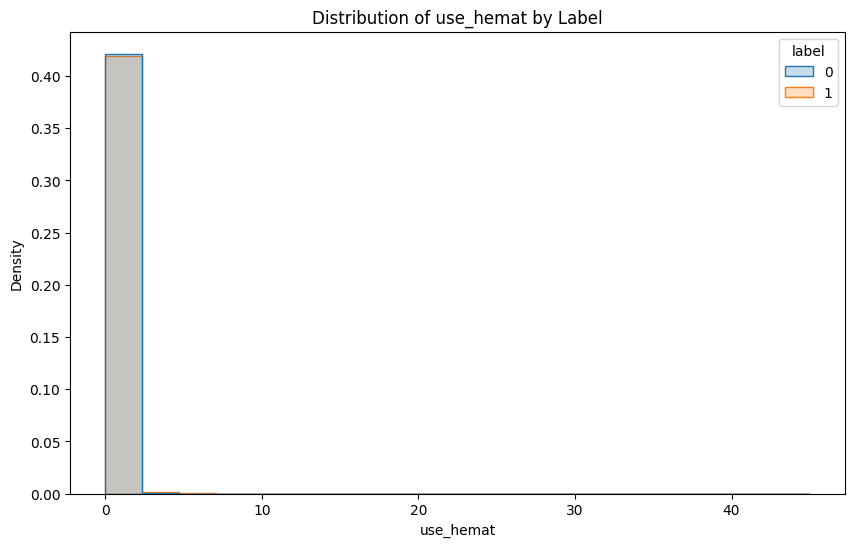

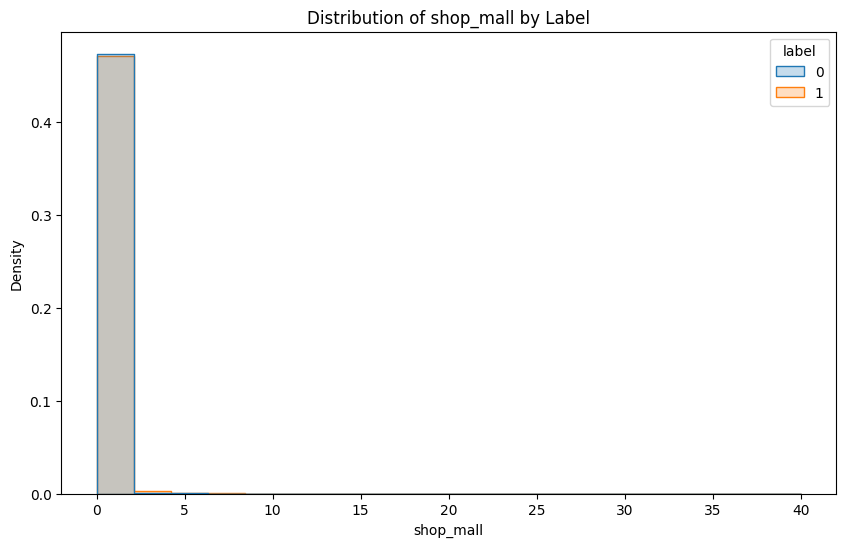

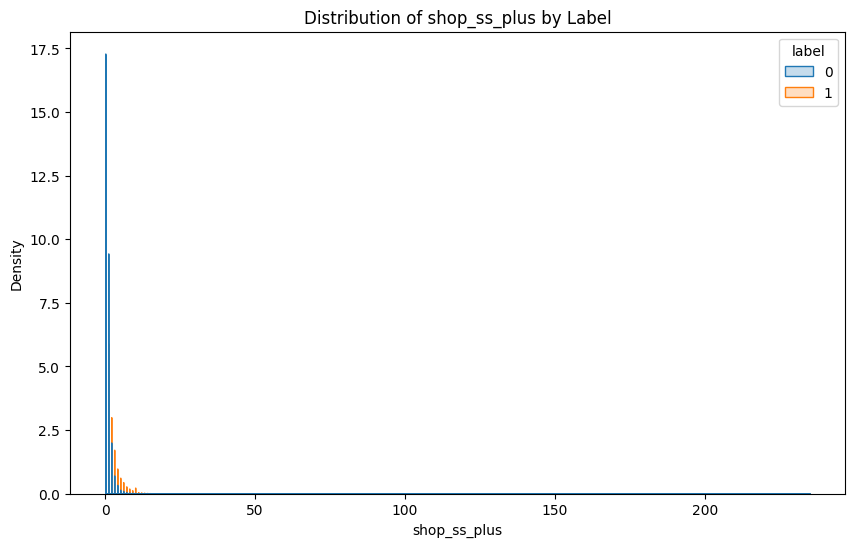

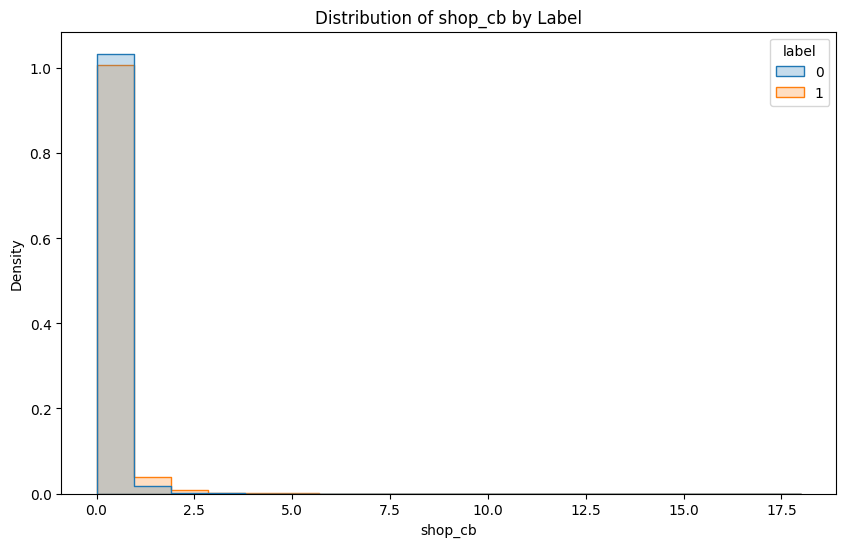

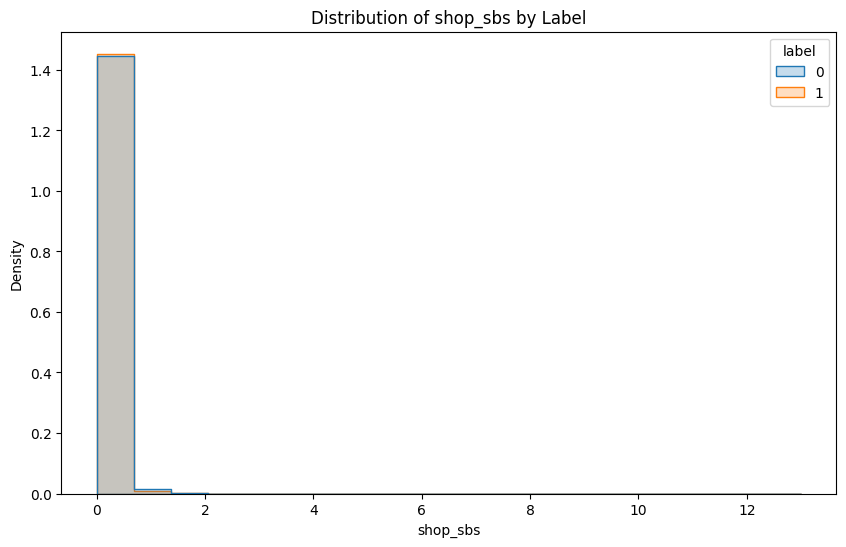

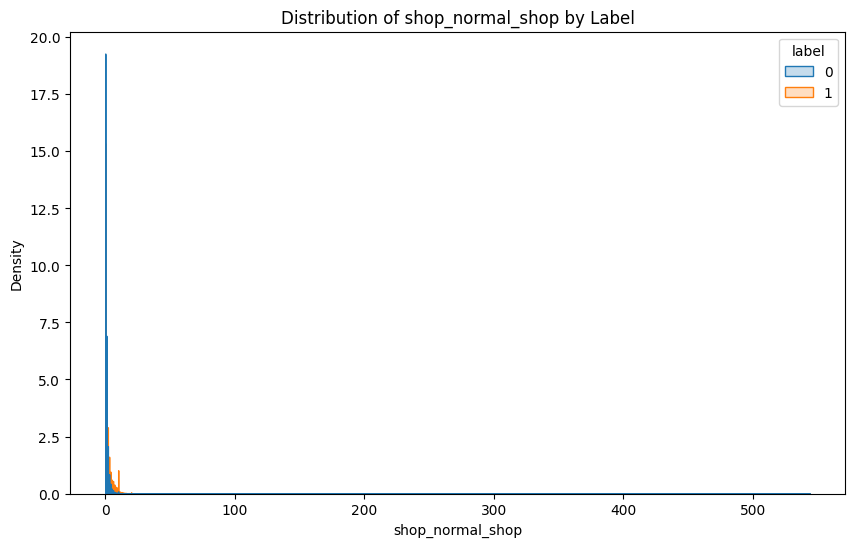

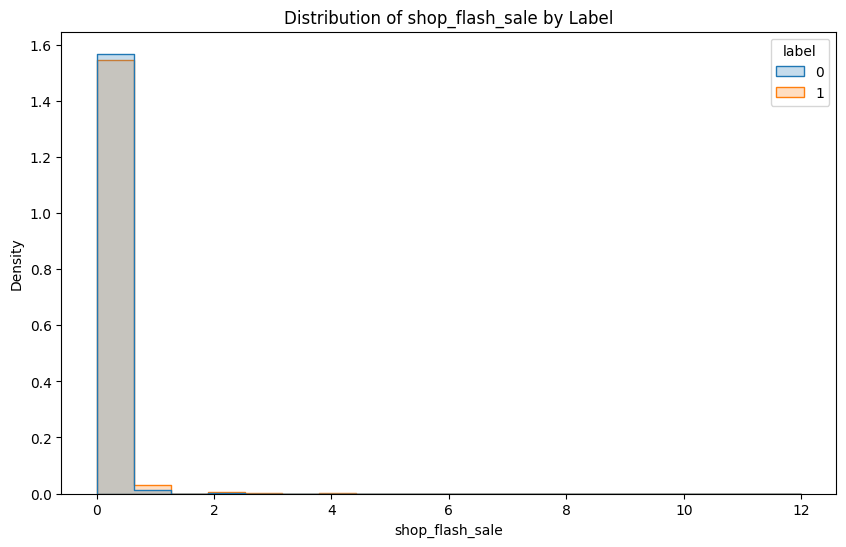

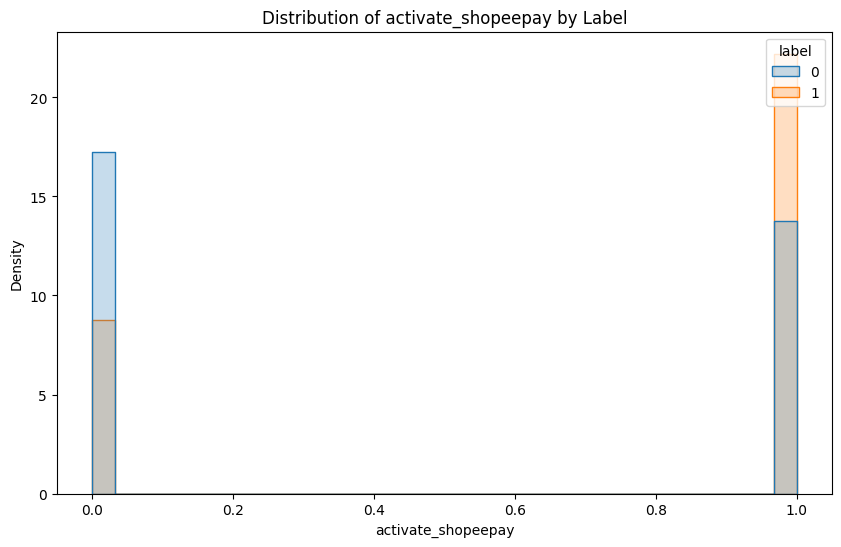

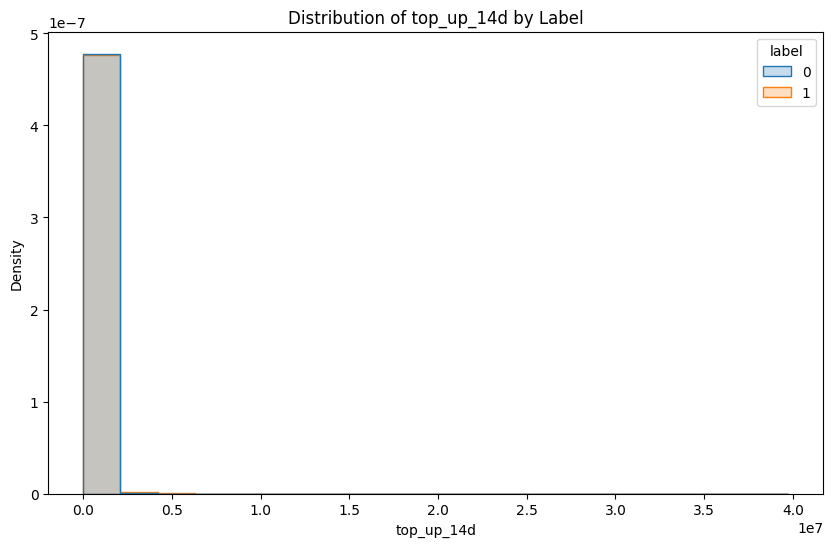

In [7]:
# distribution of data with density of the taget vraible
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('label')

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='label', element='step', stat='density', common_norm=False)
    plt.title(f'Distribution of {column} by Label')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

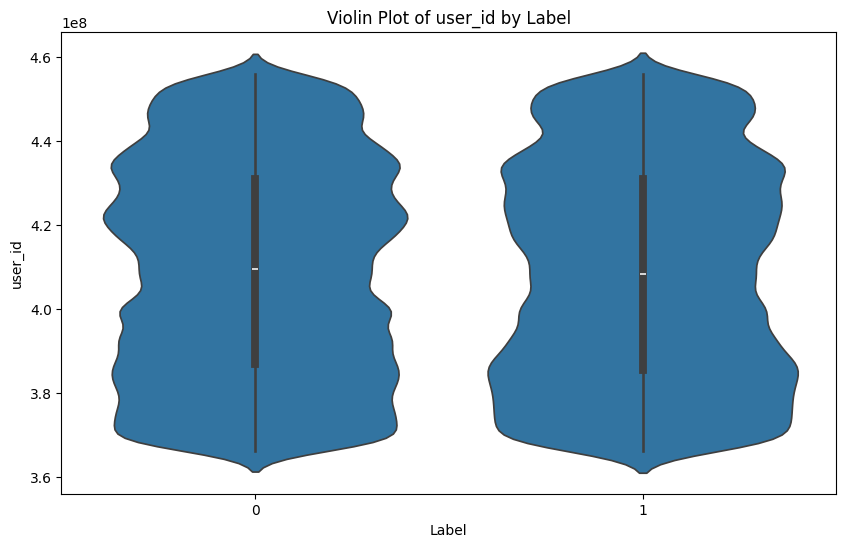

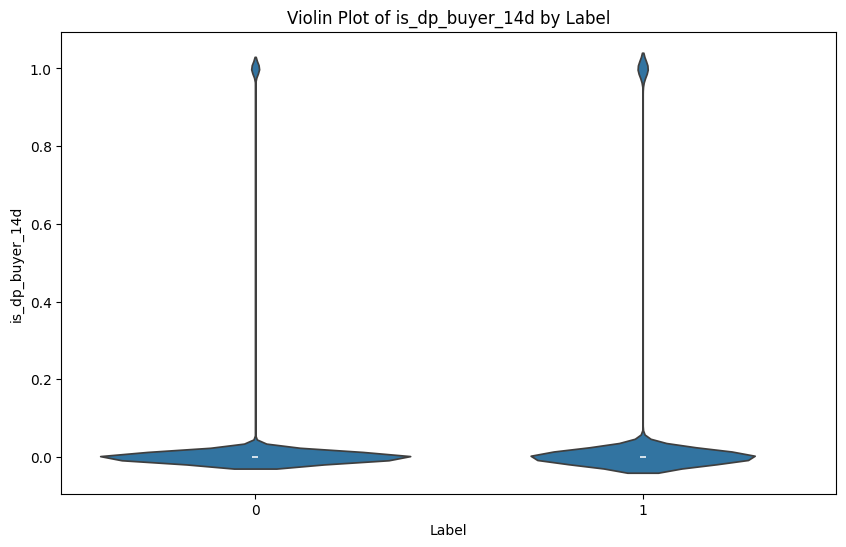

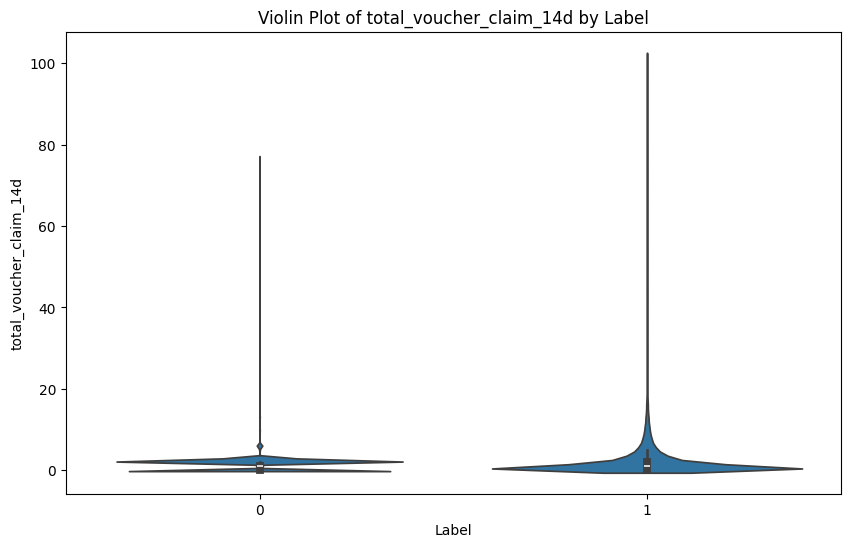

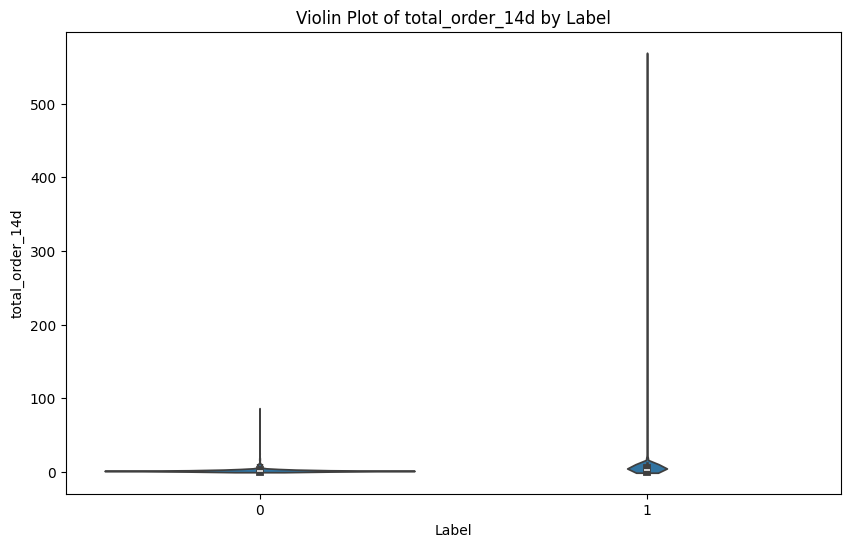

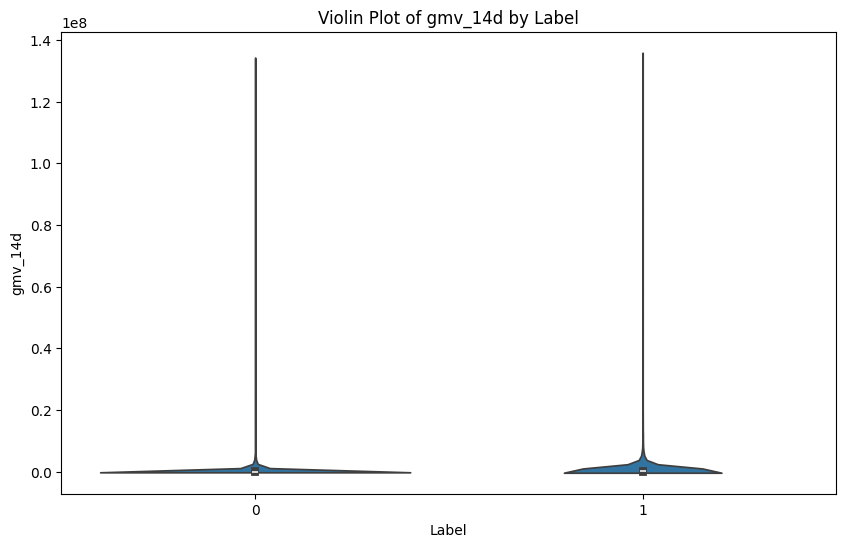

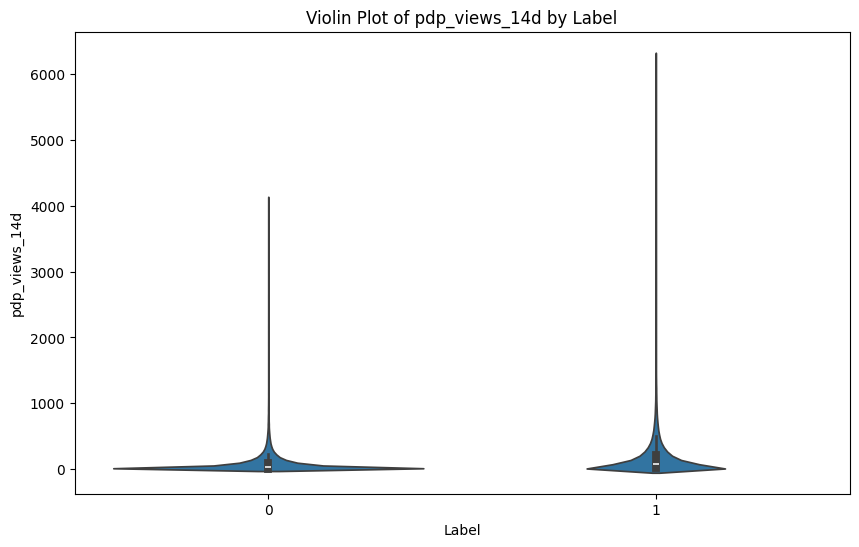

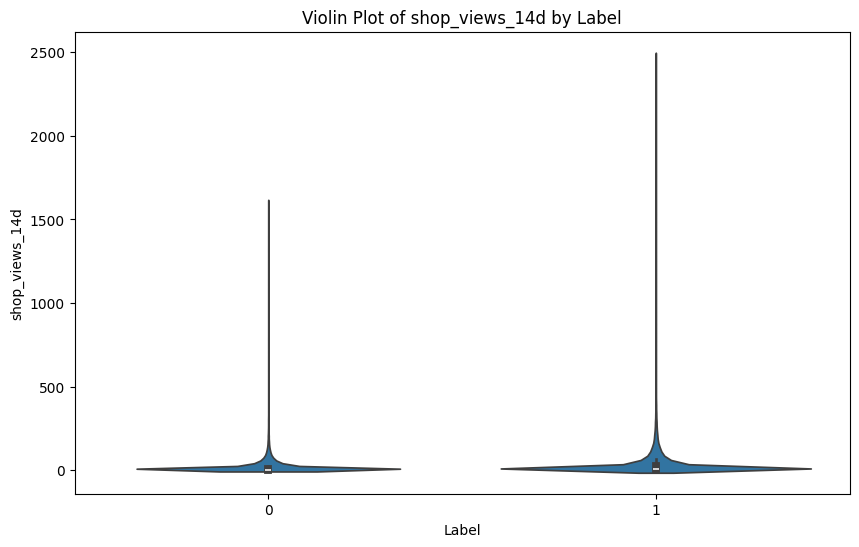

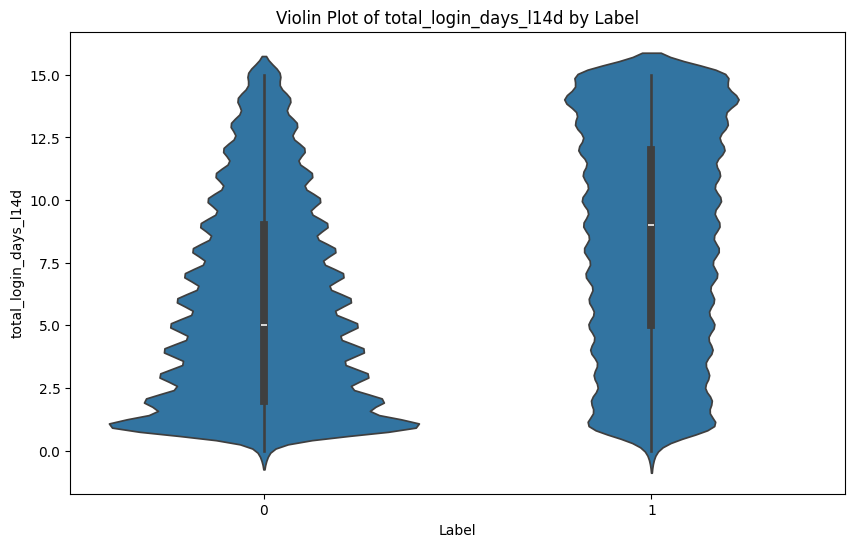

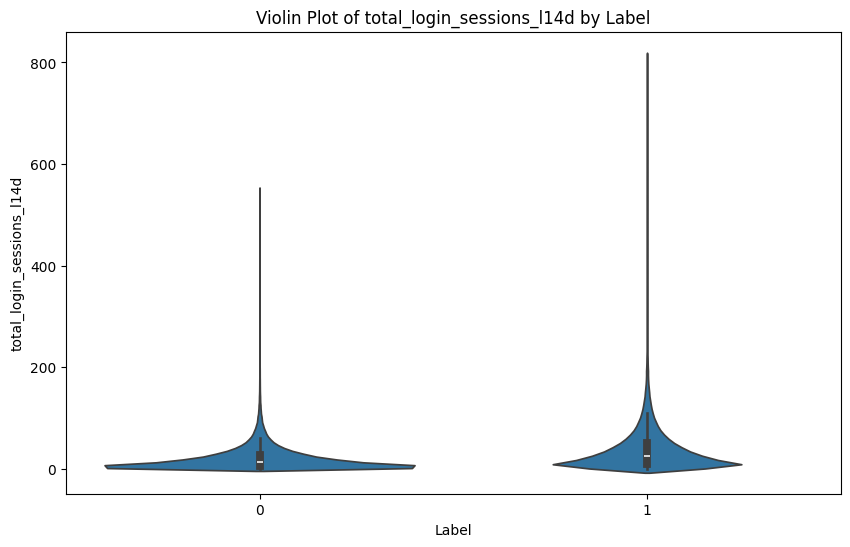

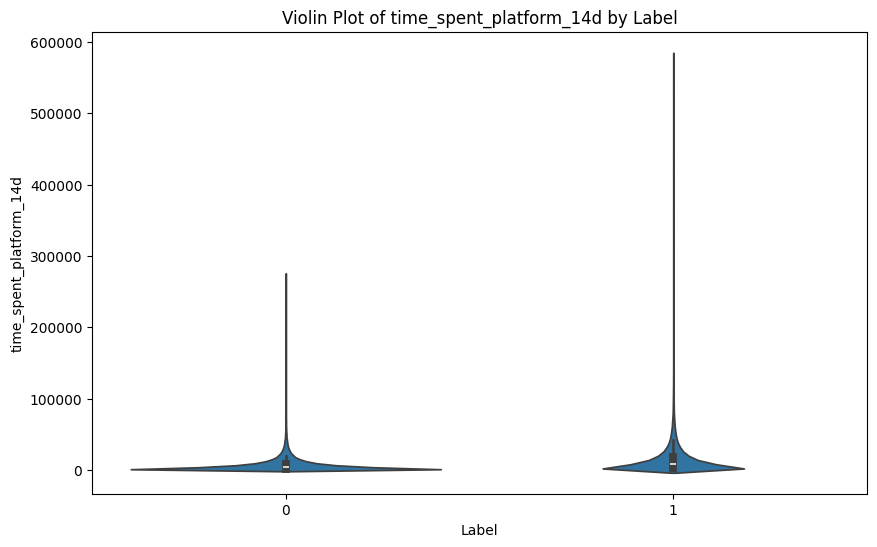

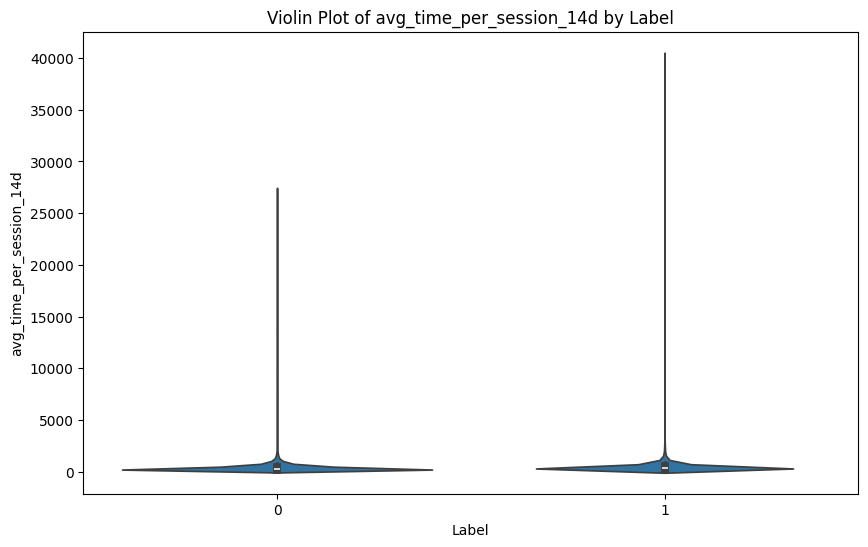

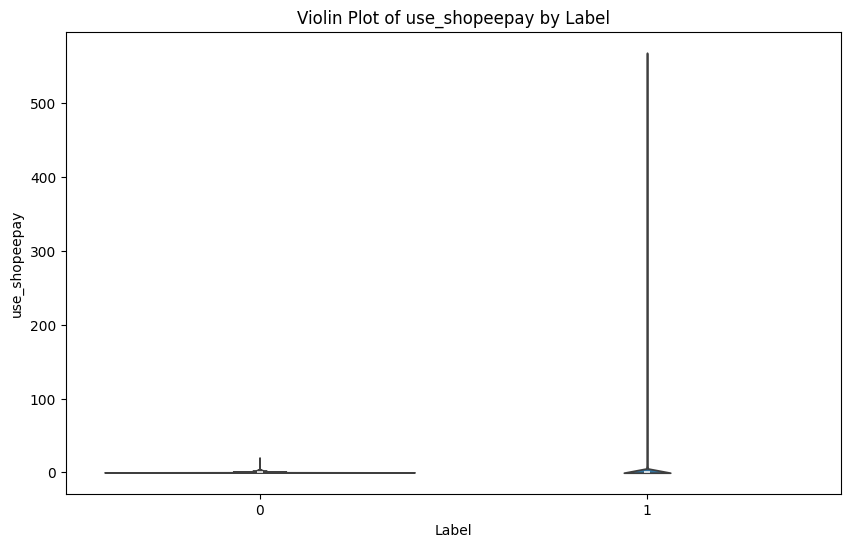

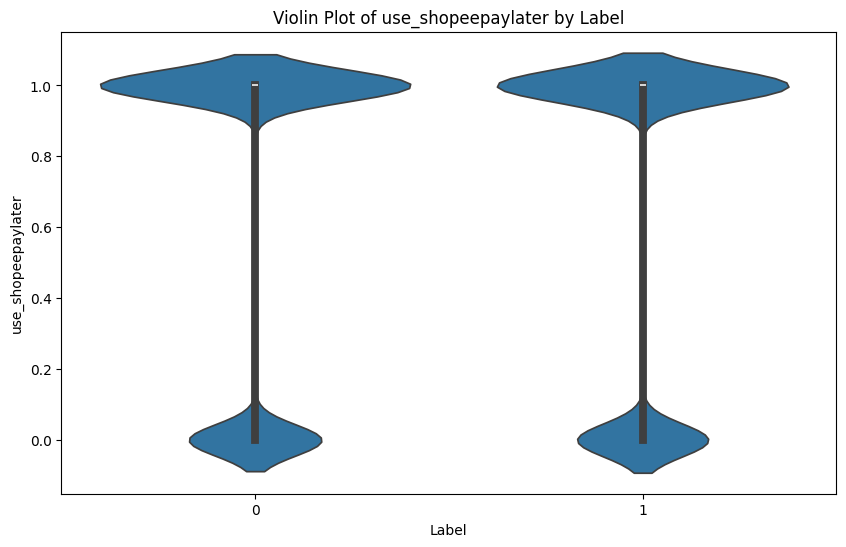

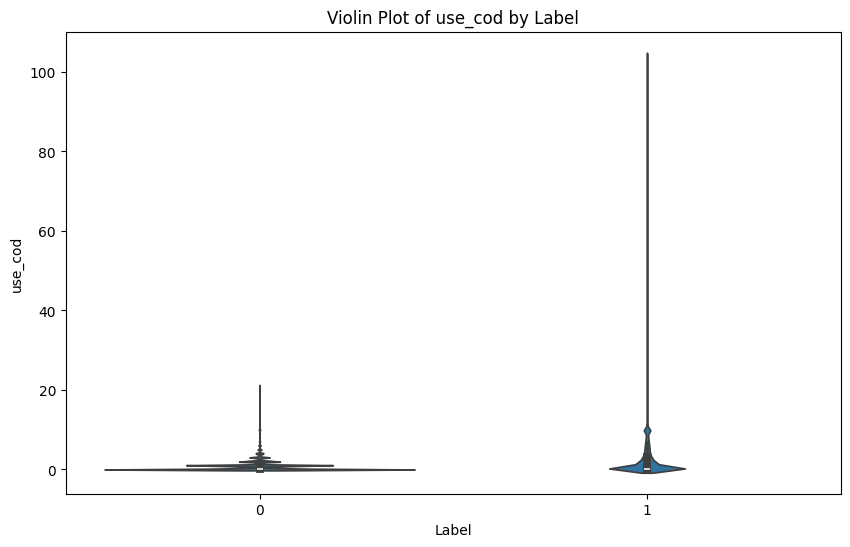

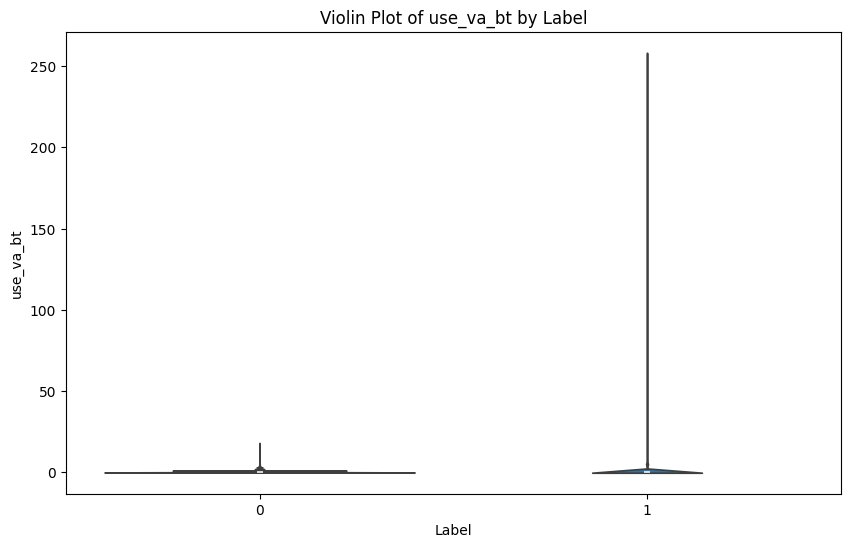

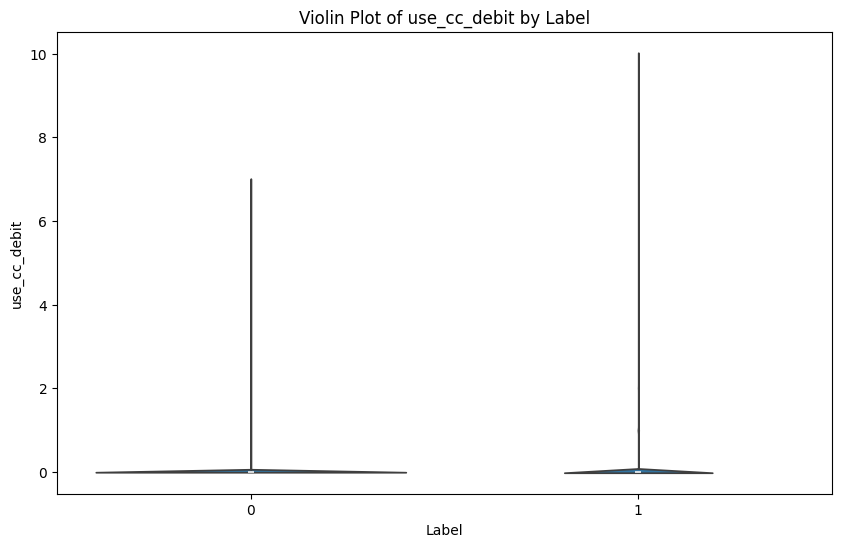

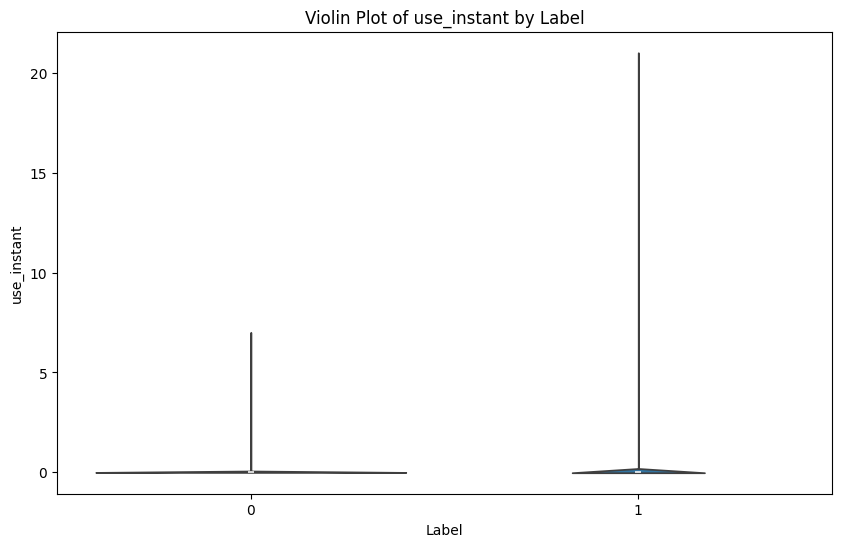

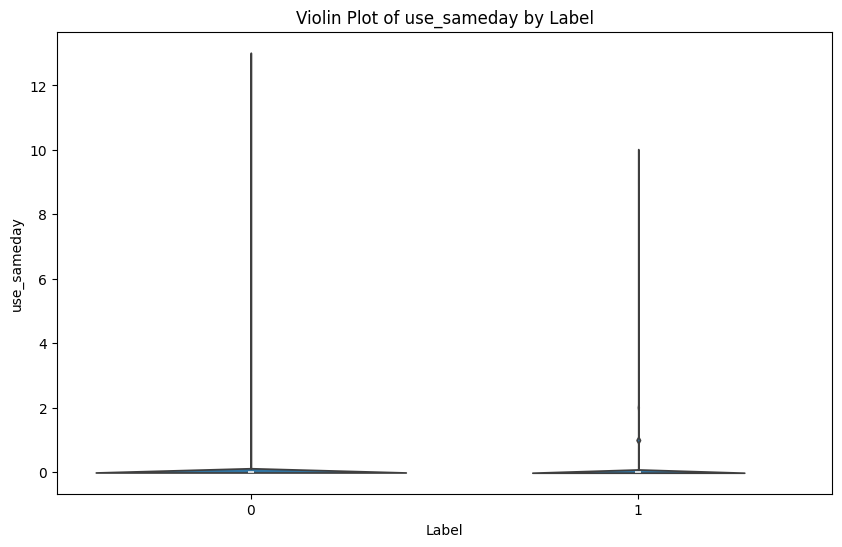

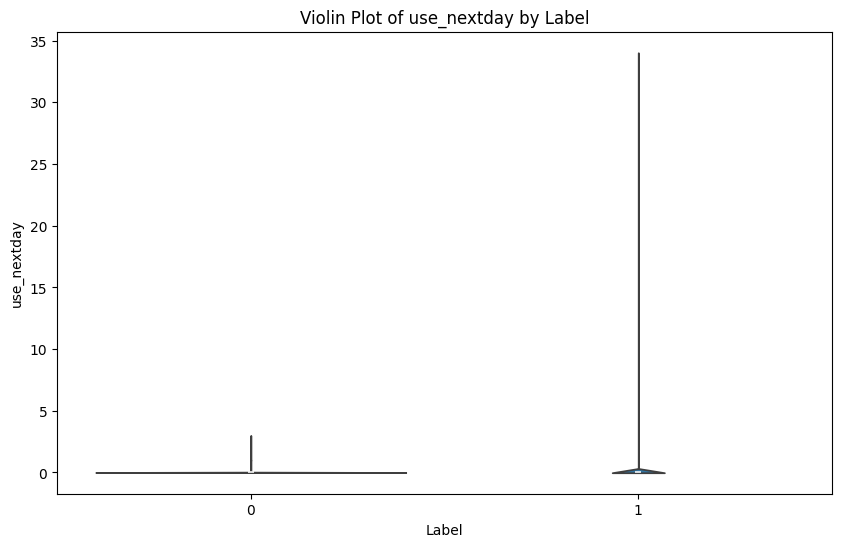

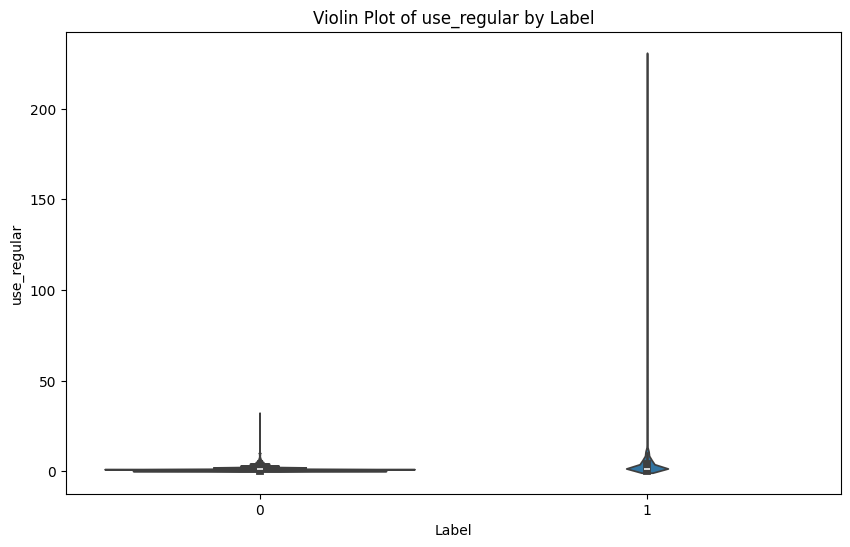

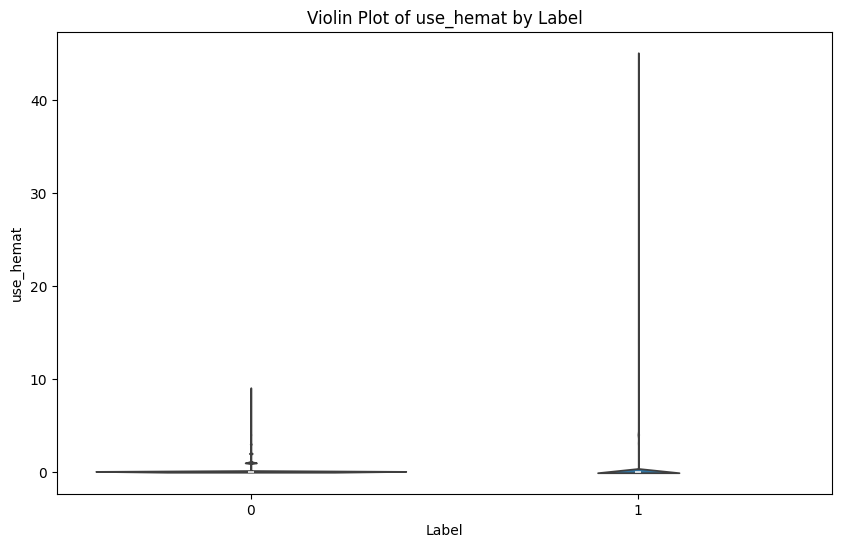

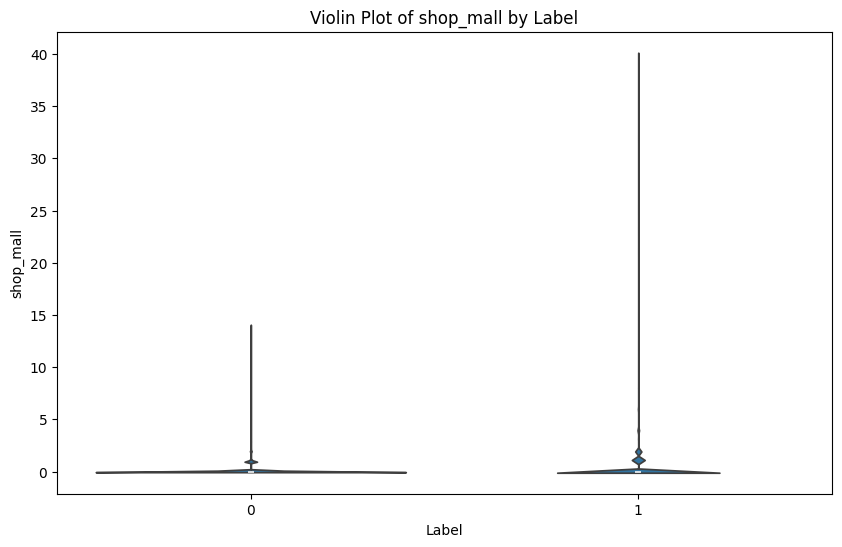

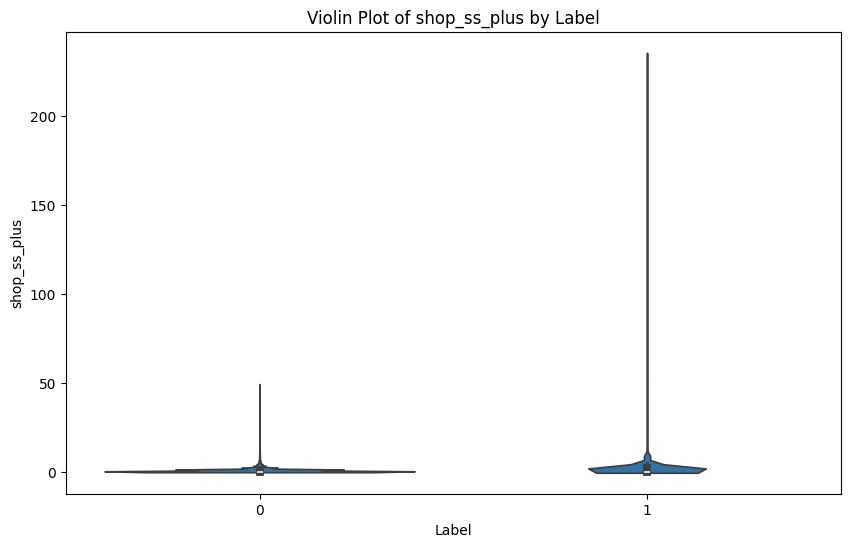

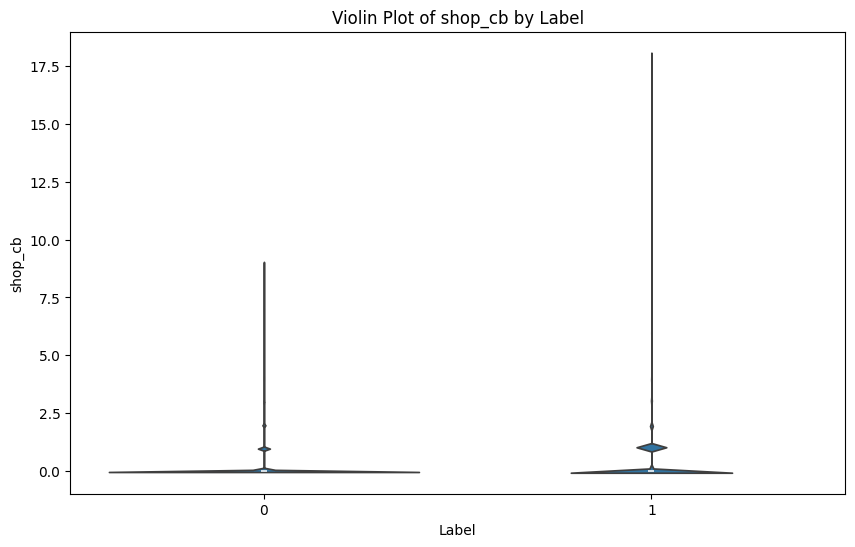

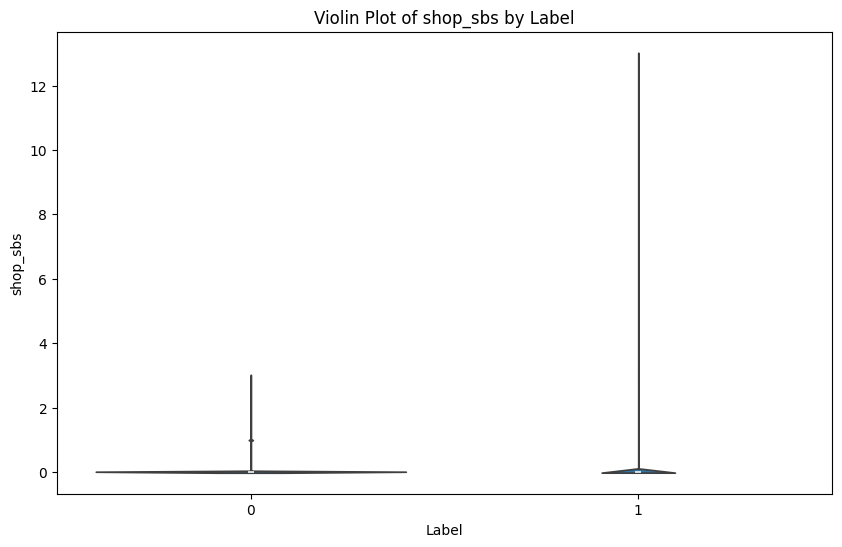

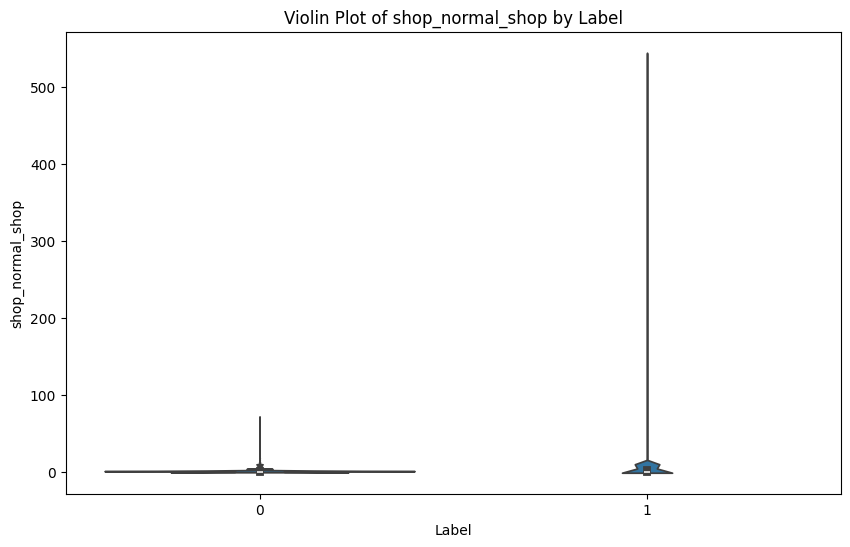

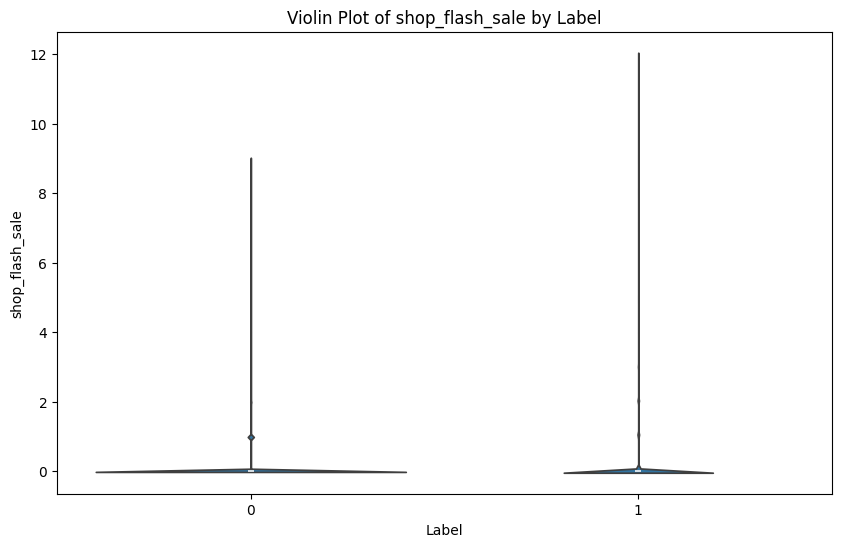

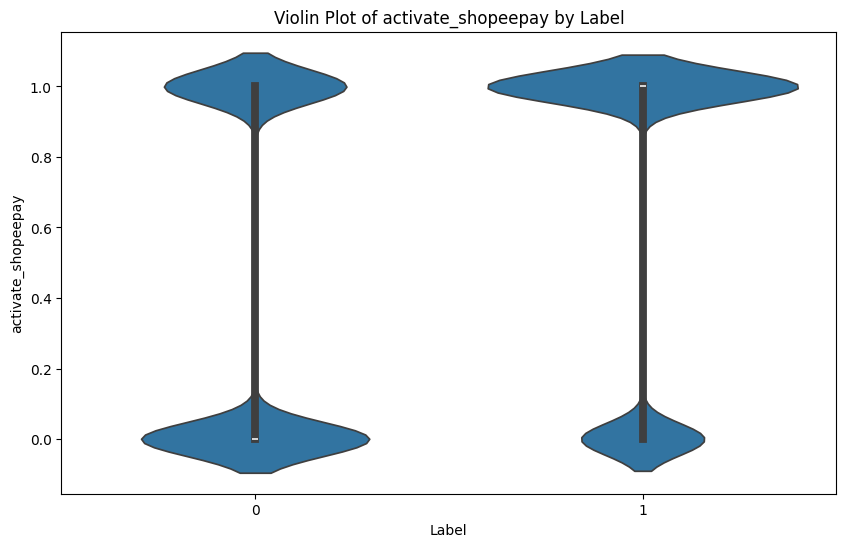

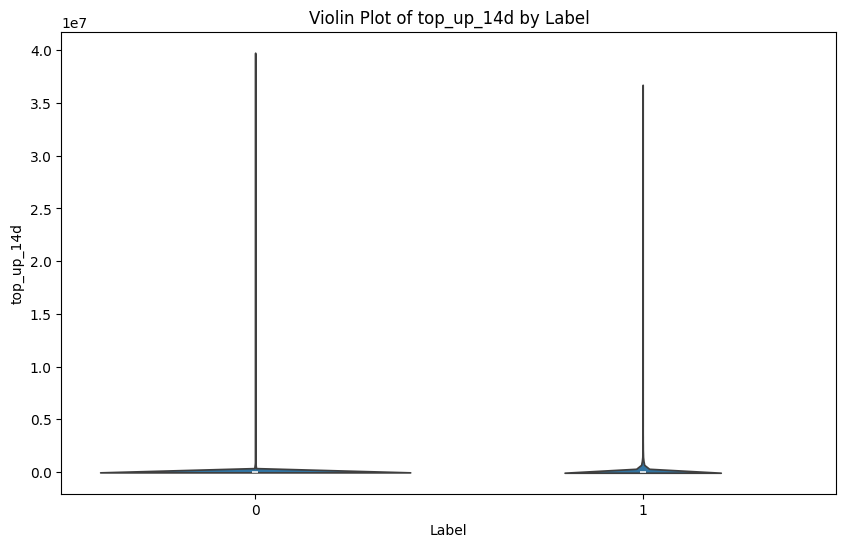

In [8]:
# violin plot
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('label')

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='label', y=column, data=df)
    plt.title(f'Violin Plot of {column} by Label')
    plt.xlabel('Label')
    plt.ylabel(column)
    plt.show()

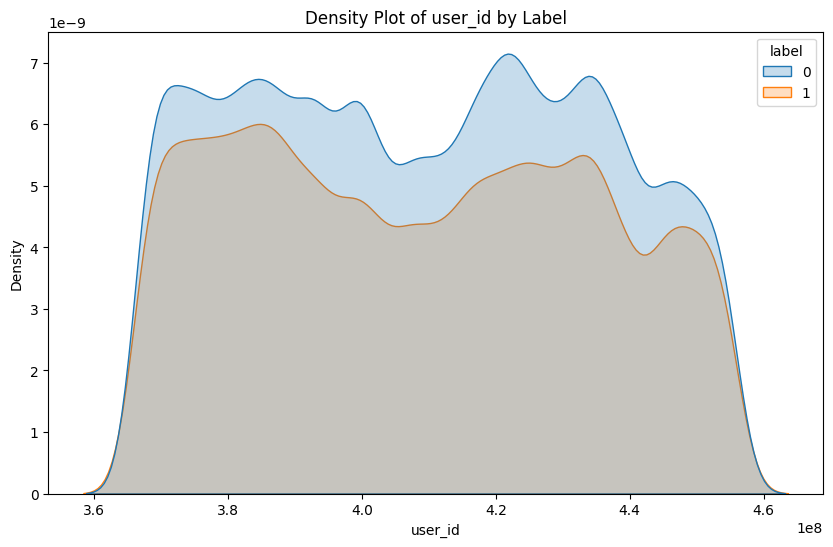

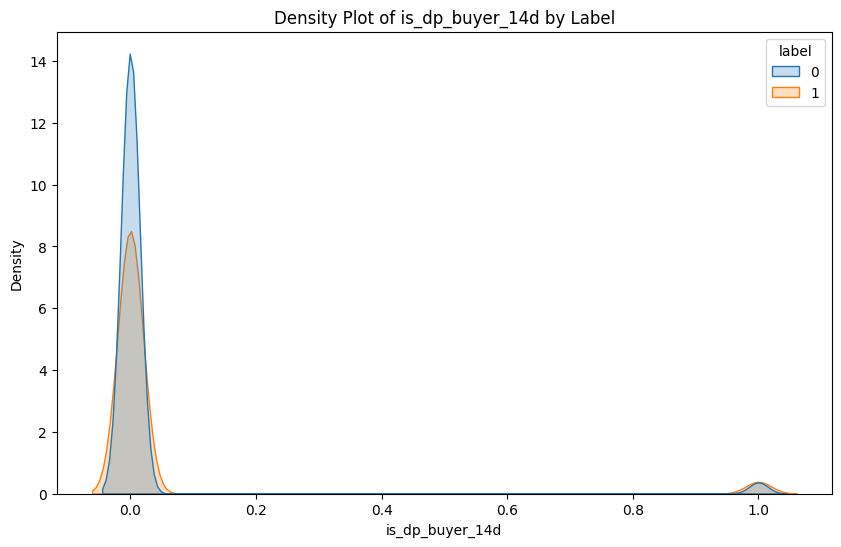

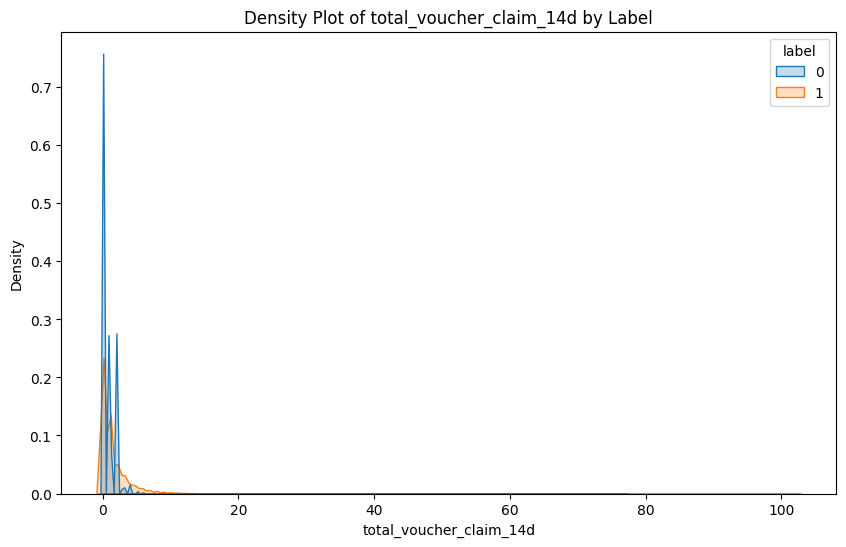

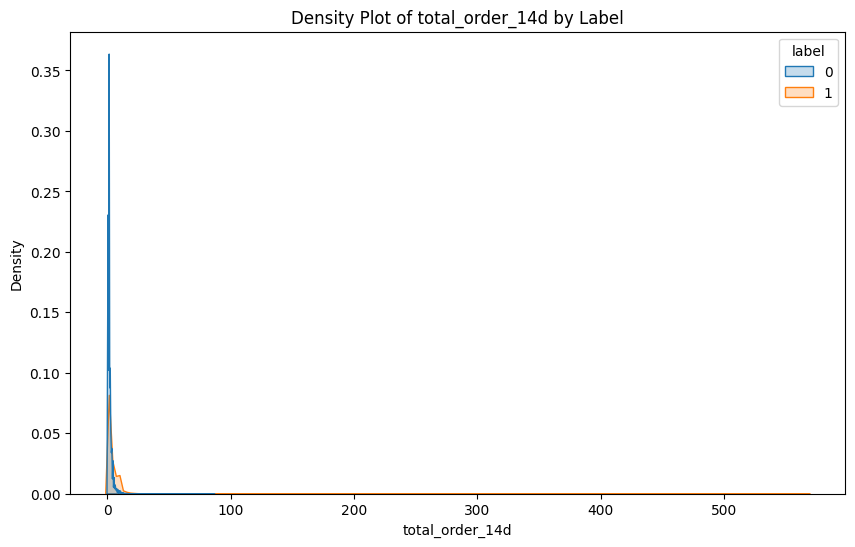

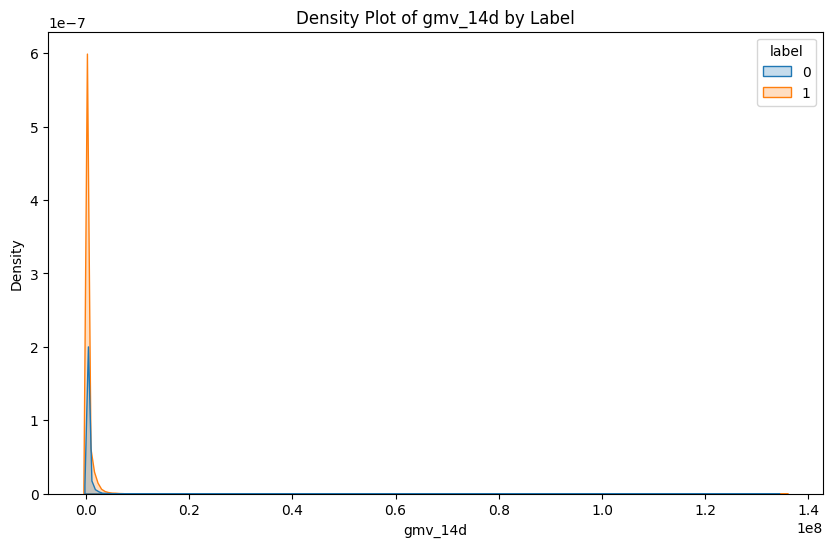

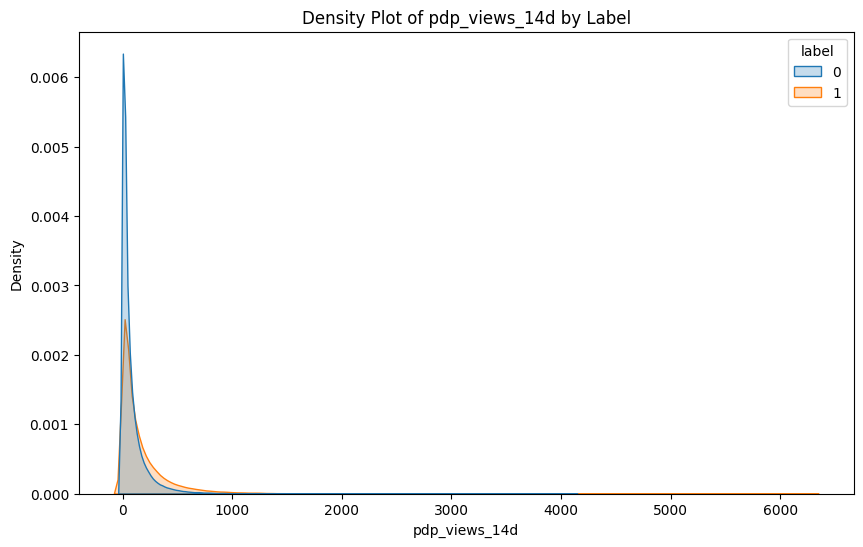

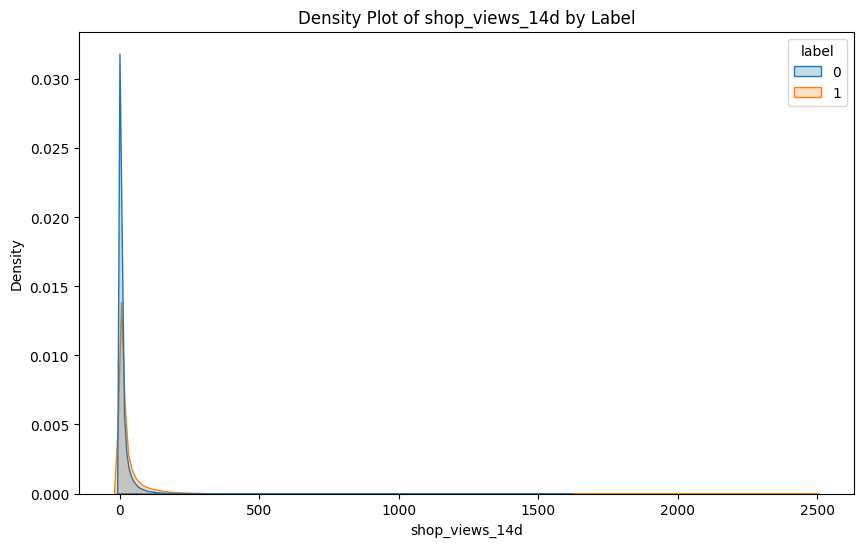

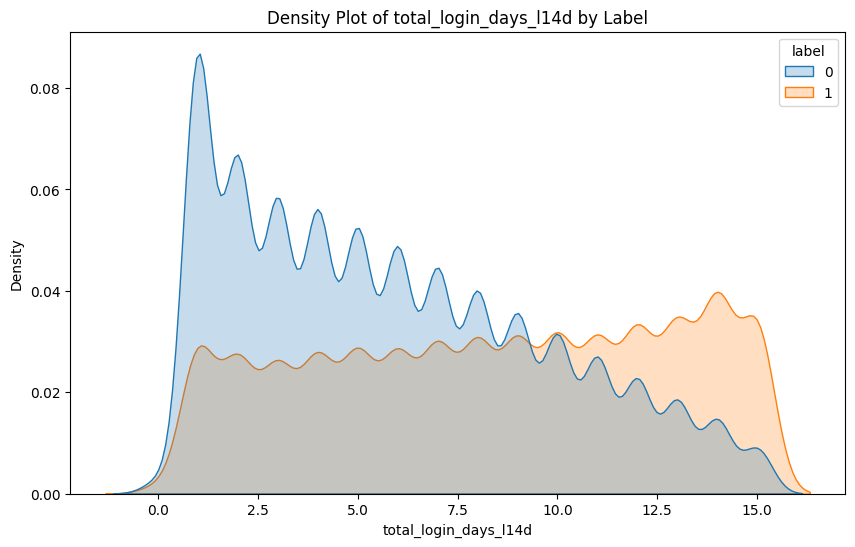

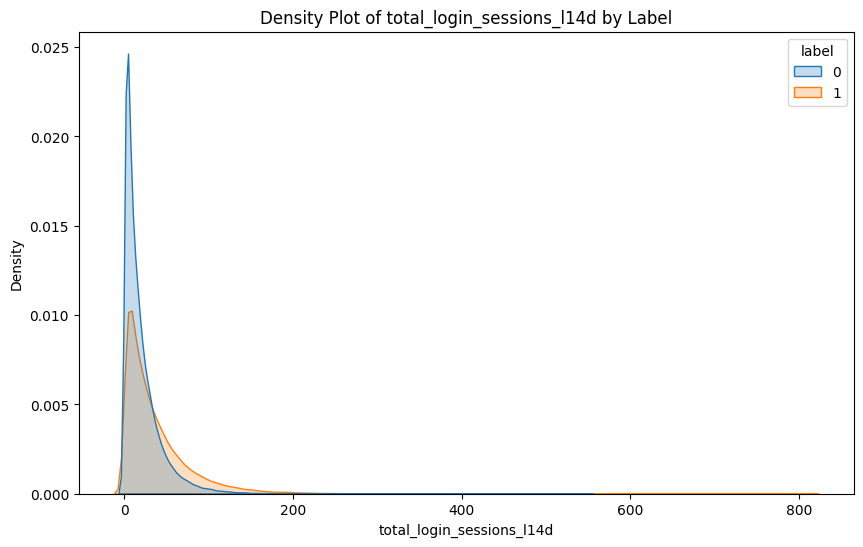

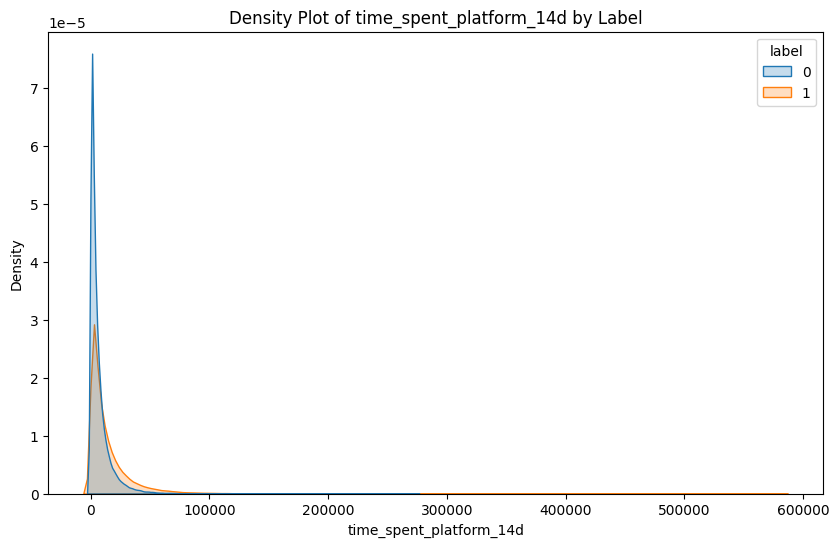

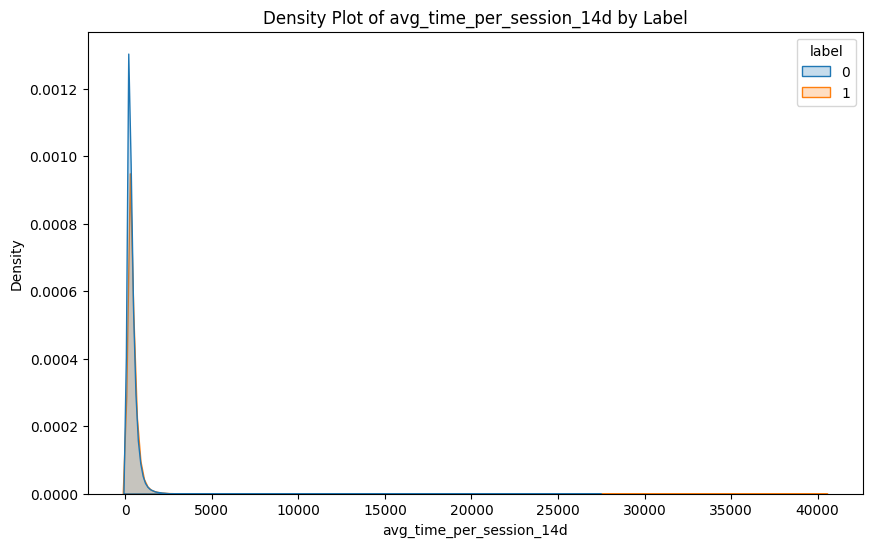

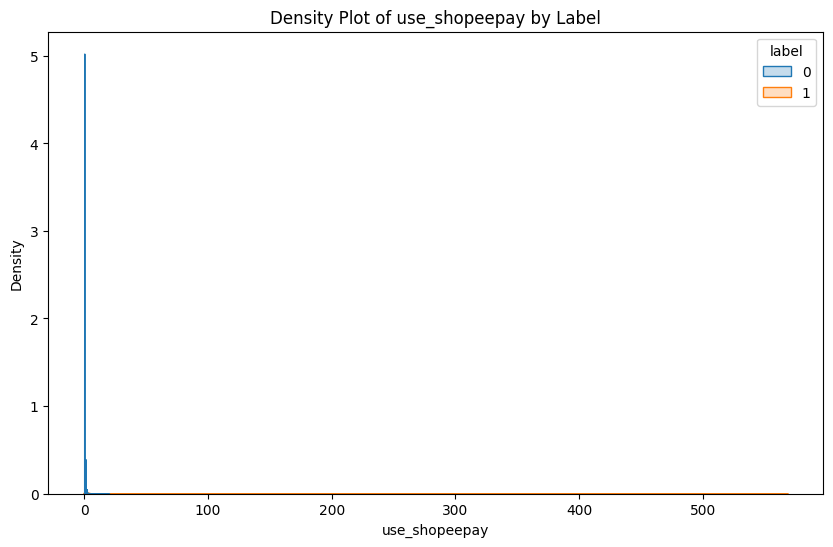

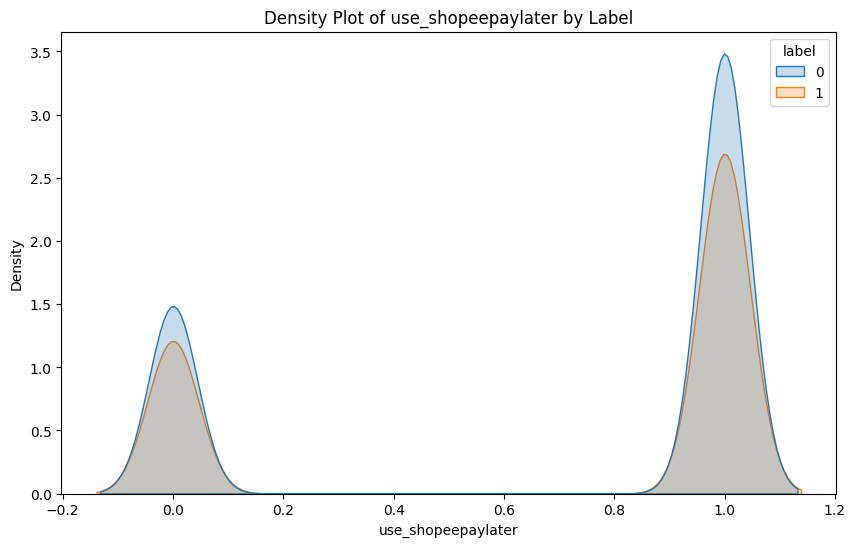

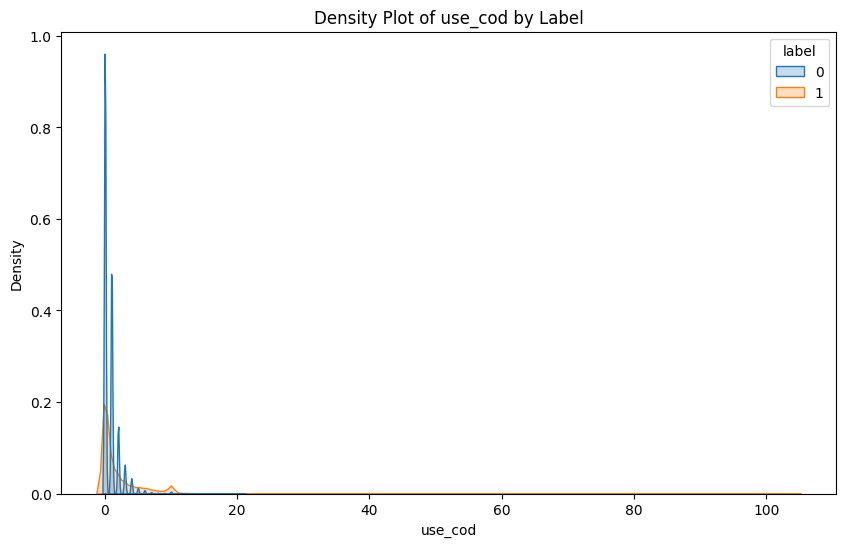

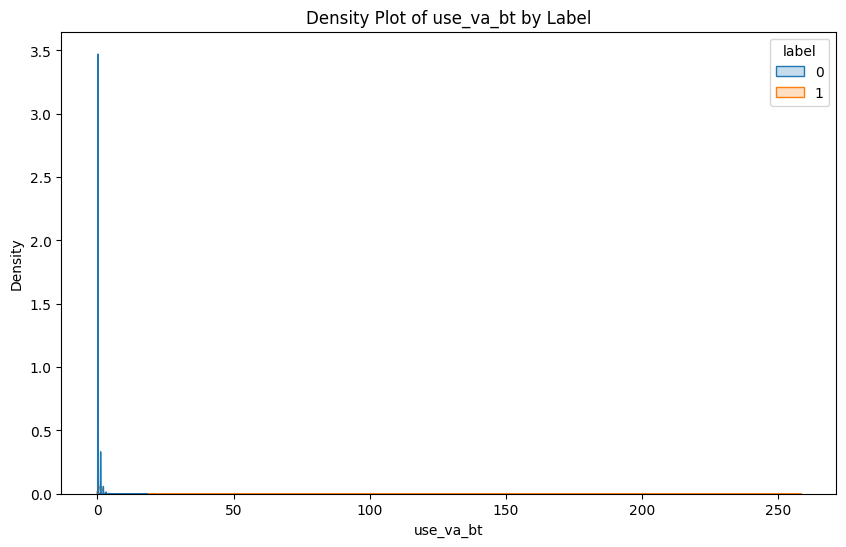

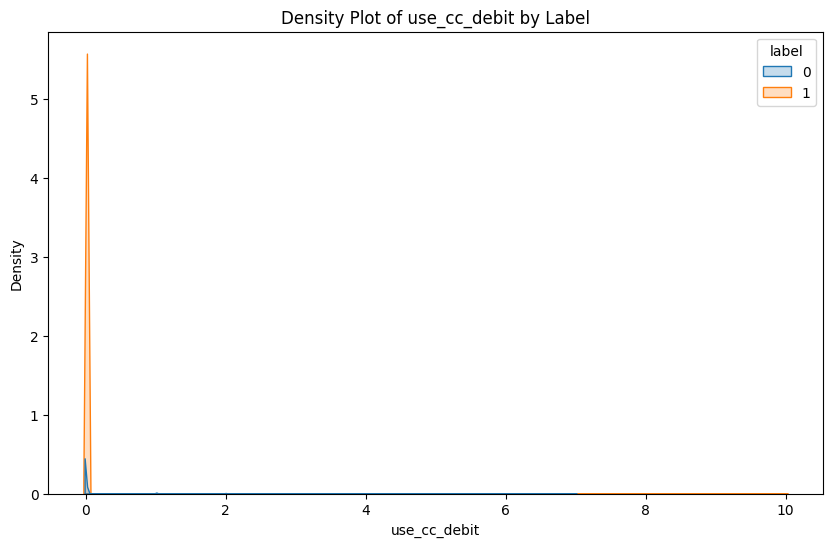

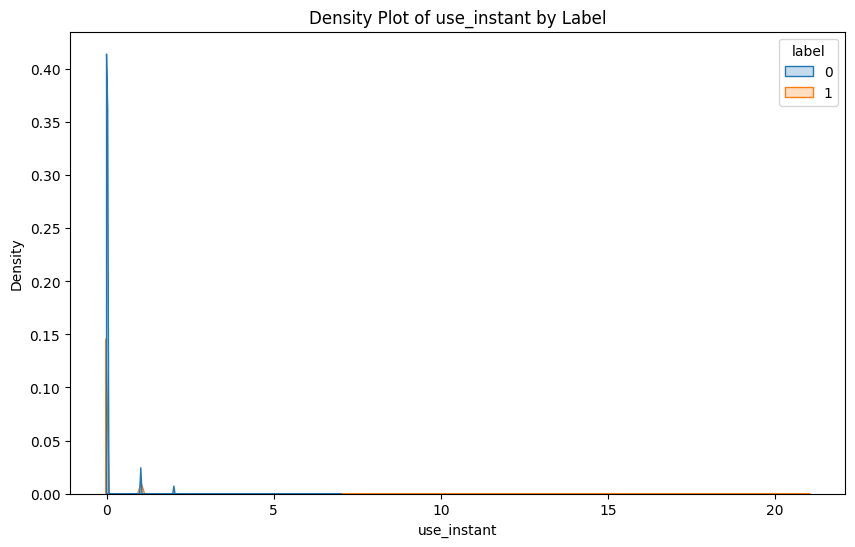

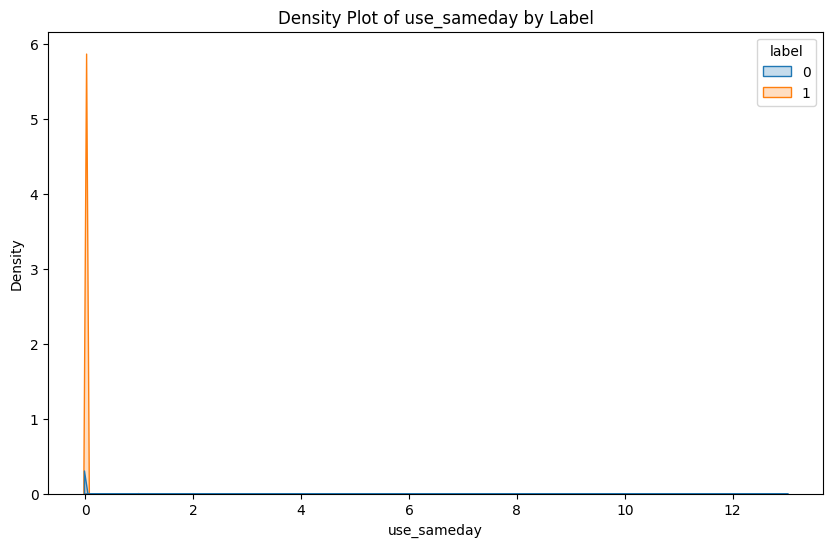

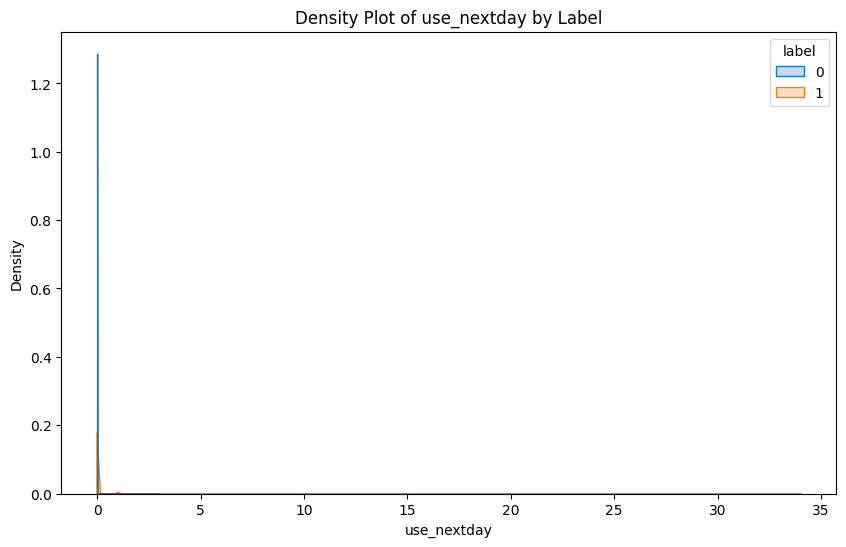

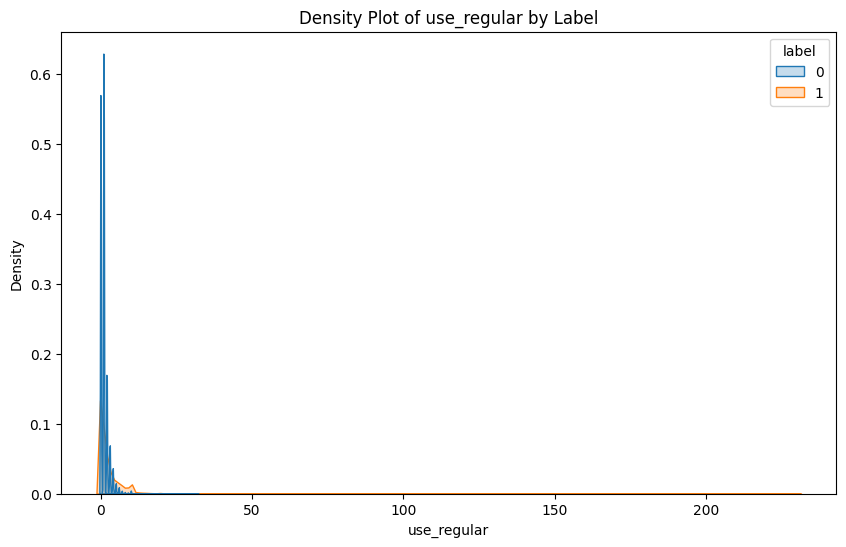

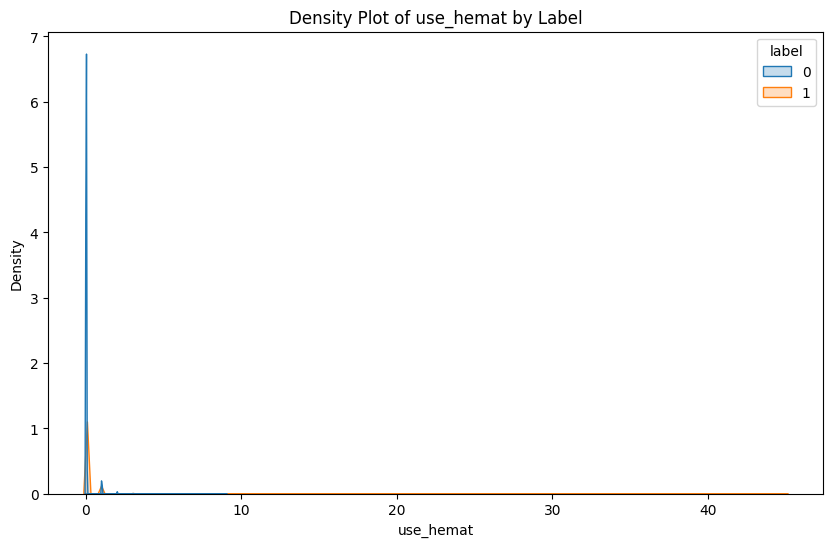

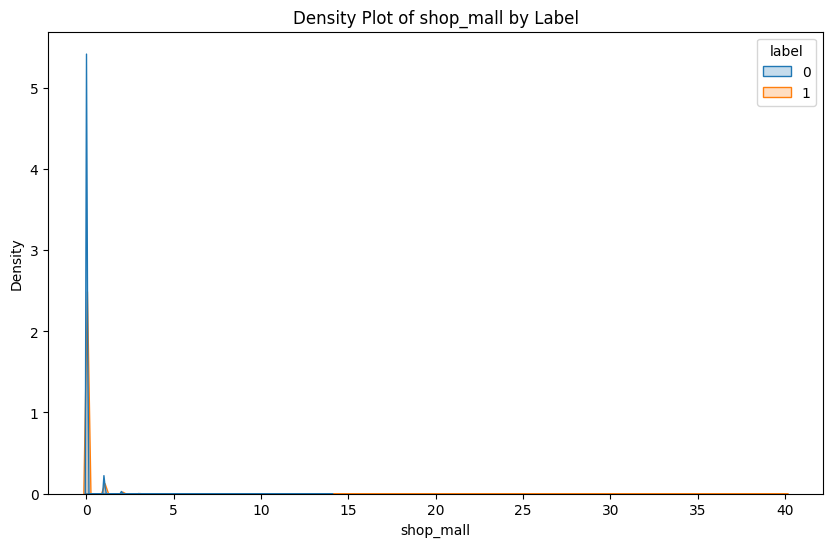

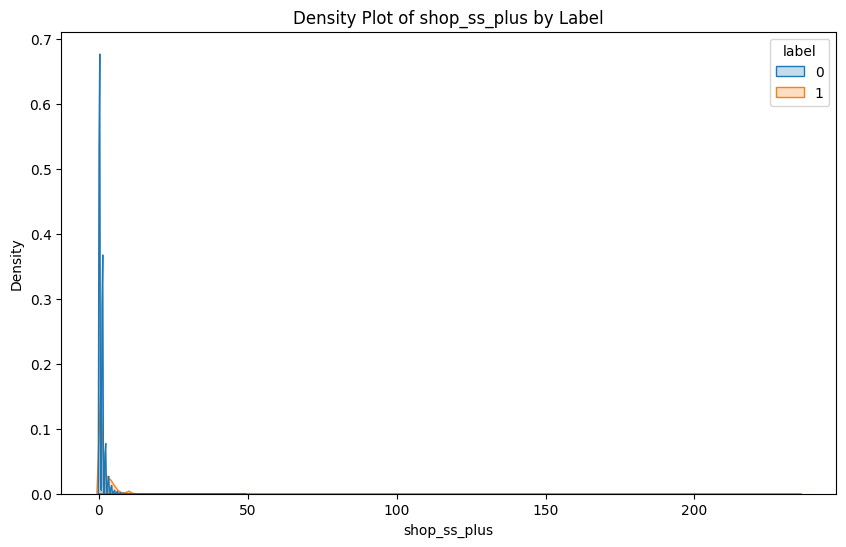

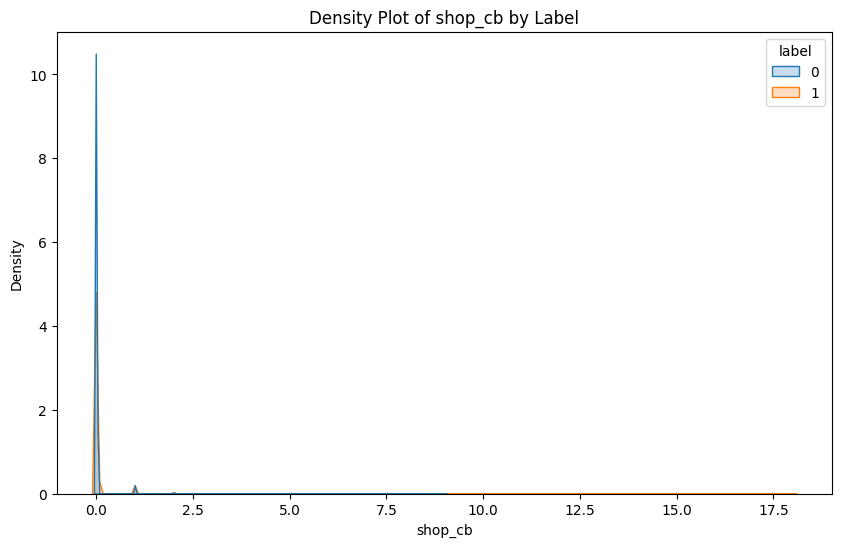

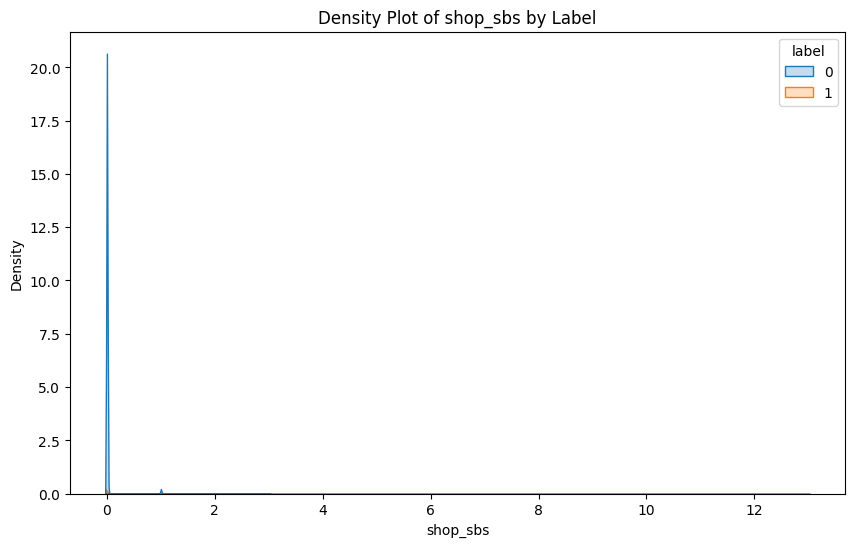

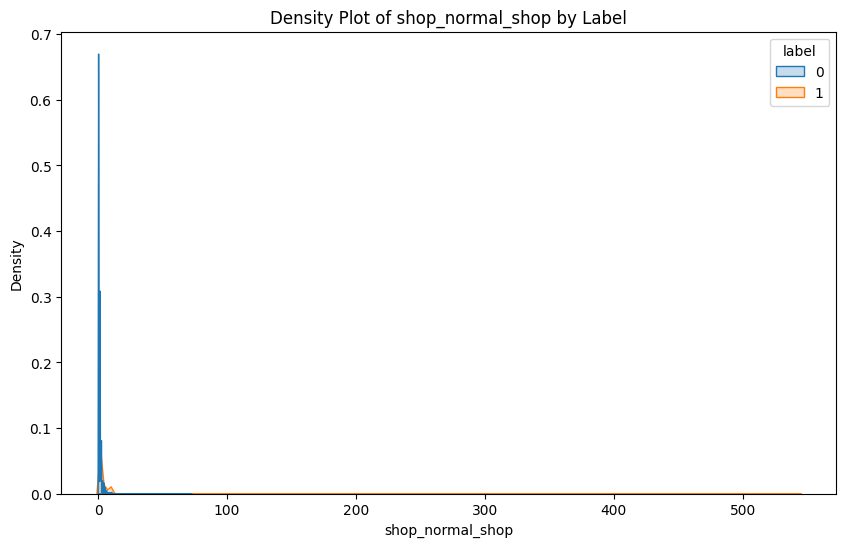

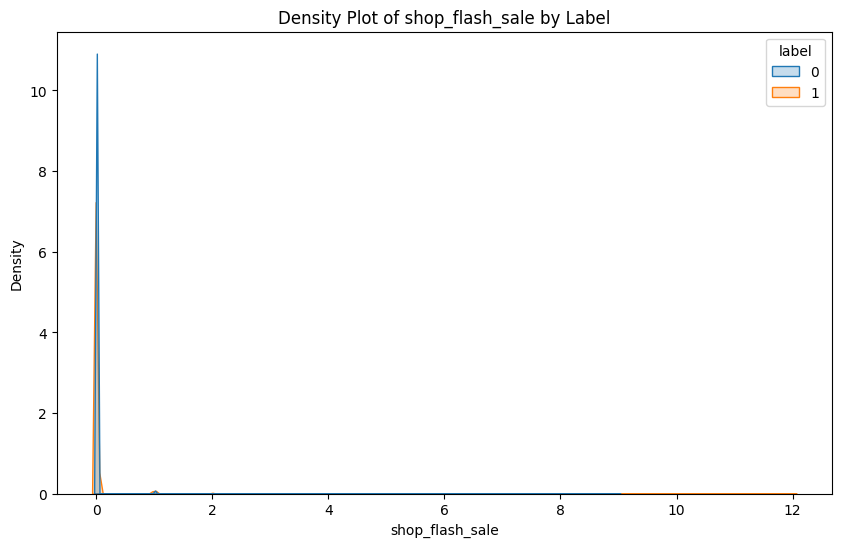

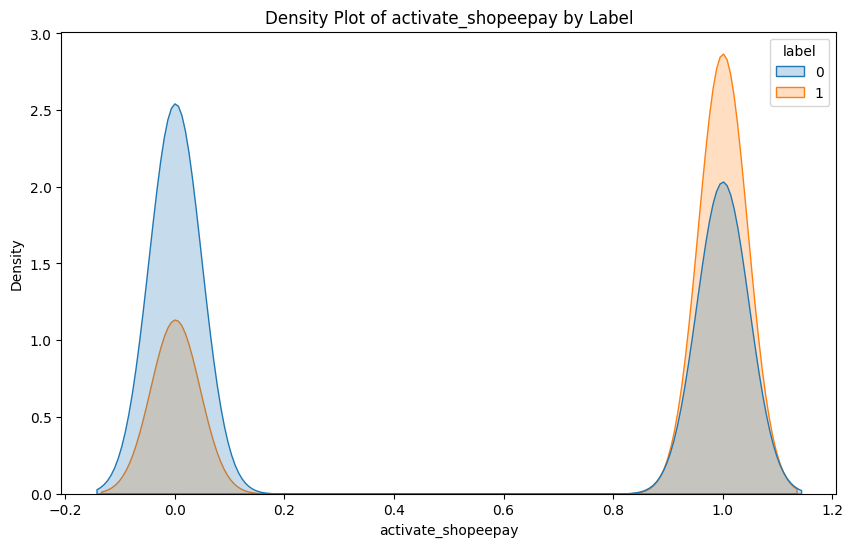

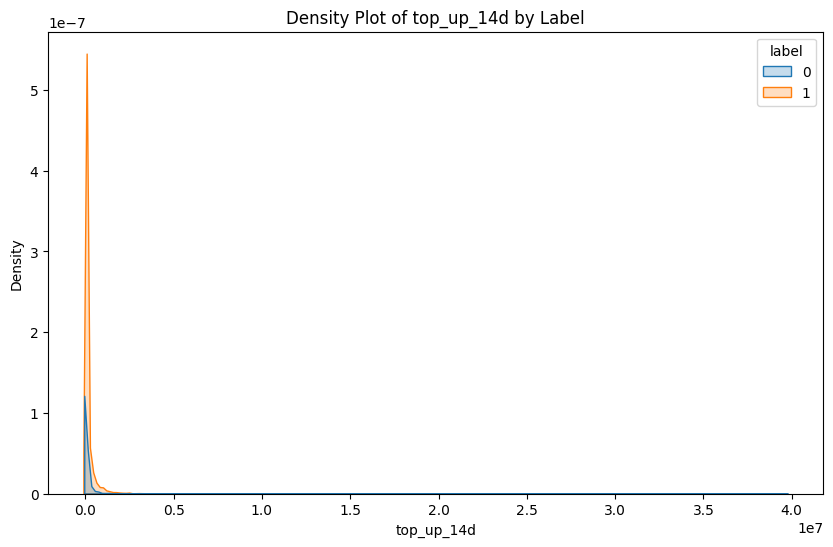

In [9]:
#violin desnity plot
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('label')

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=column, hue='label', fill=True)
    plt.title(f'Density Plot of {column} by Label')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


# Box plot

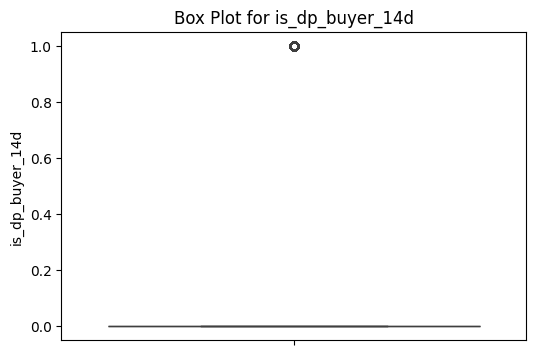

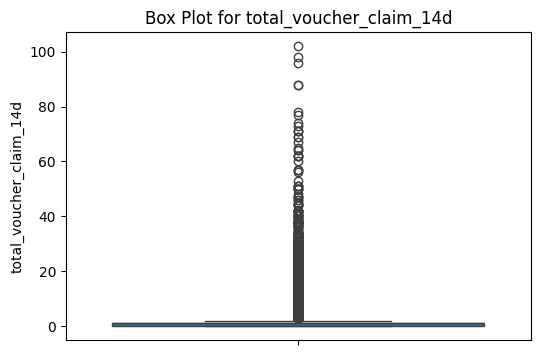

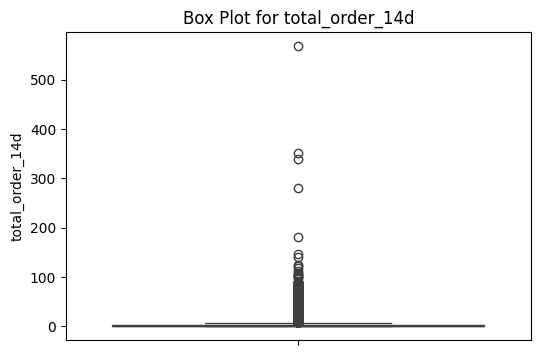

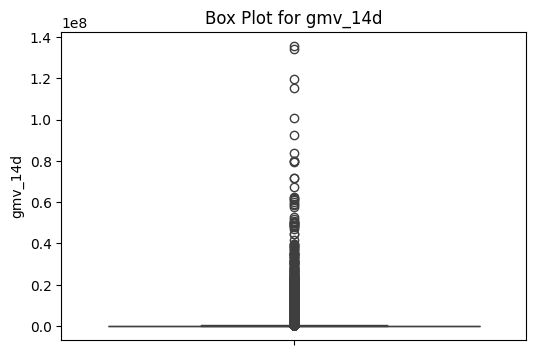

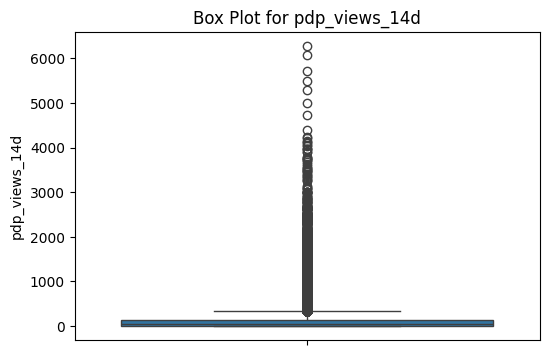

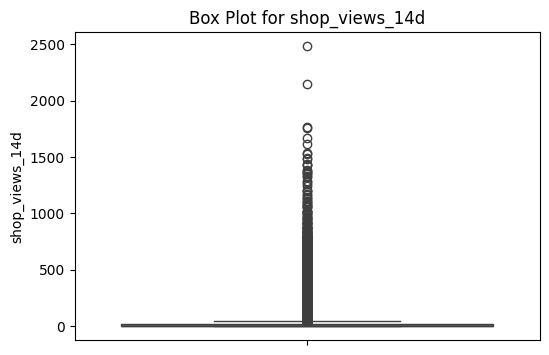

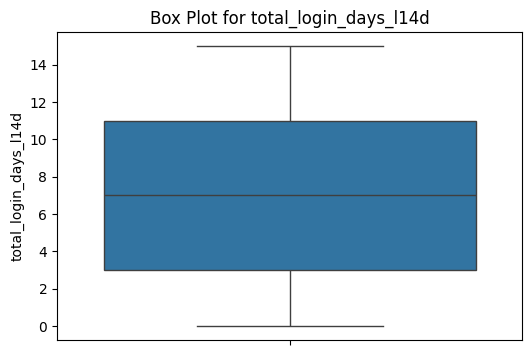

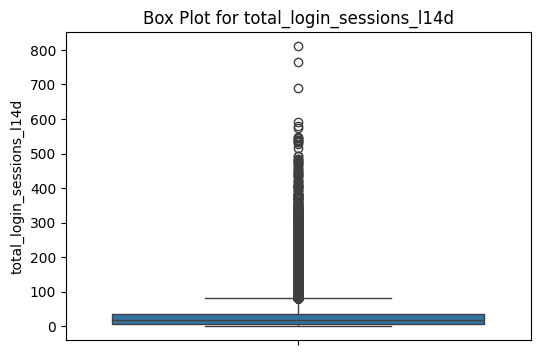

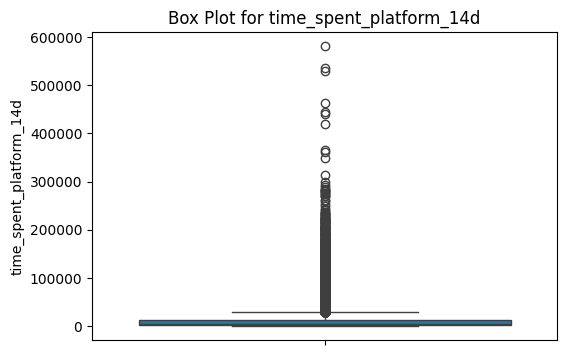

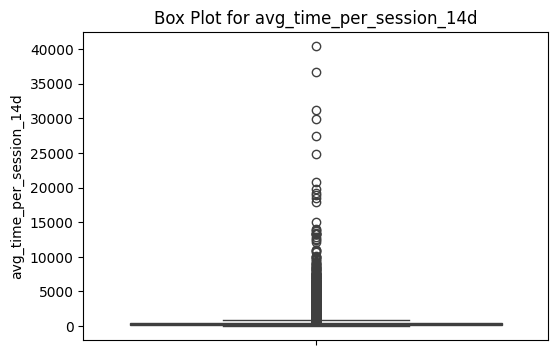

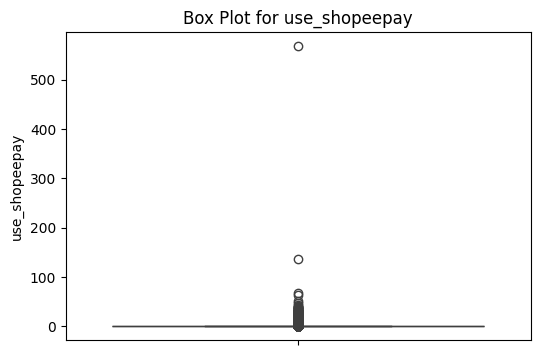

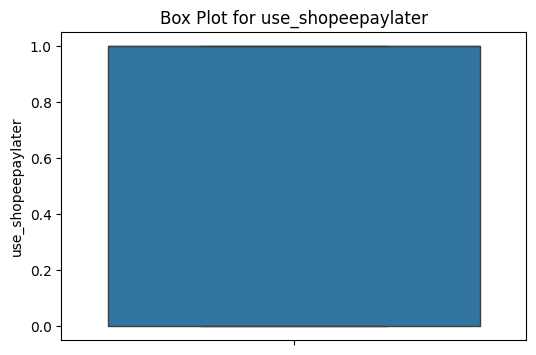

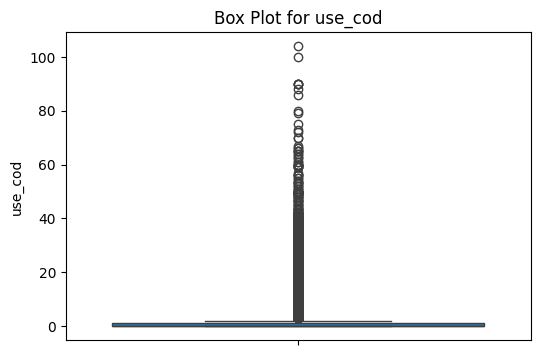

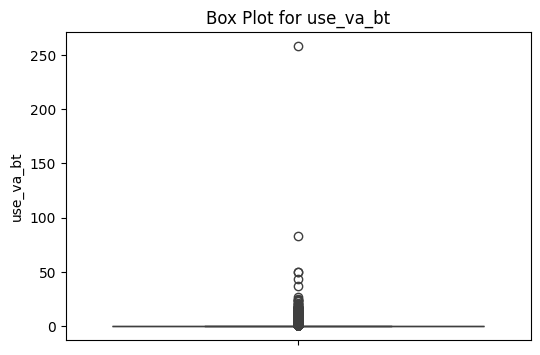

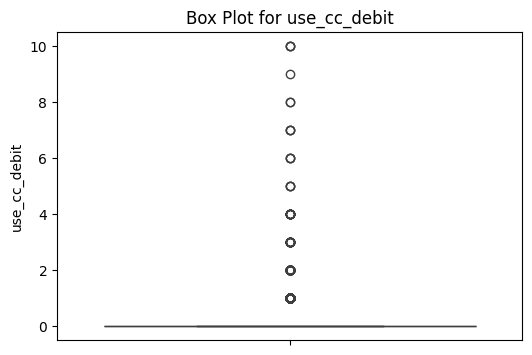

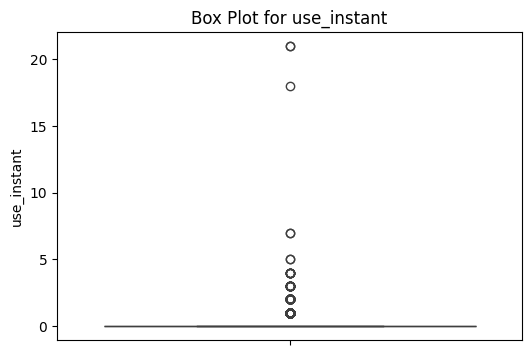

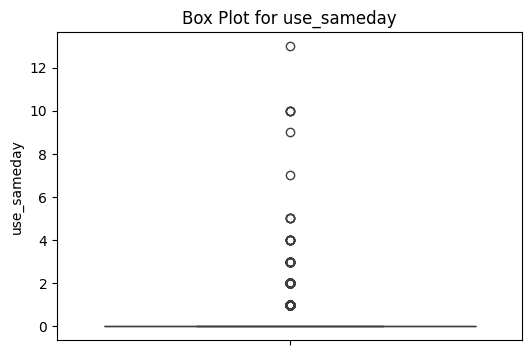

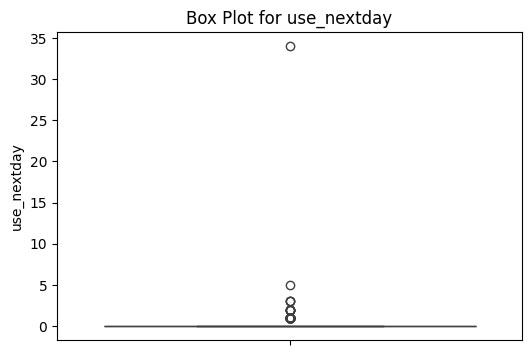

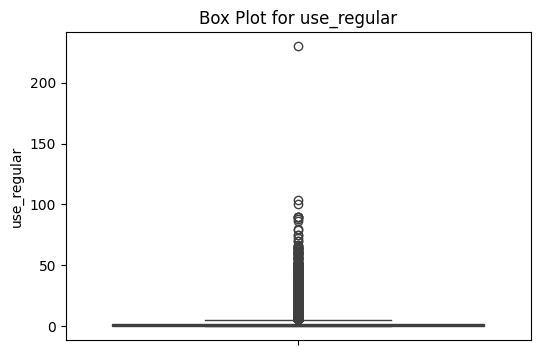

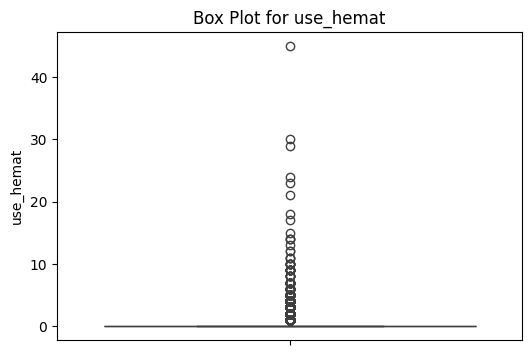

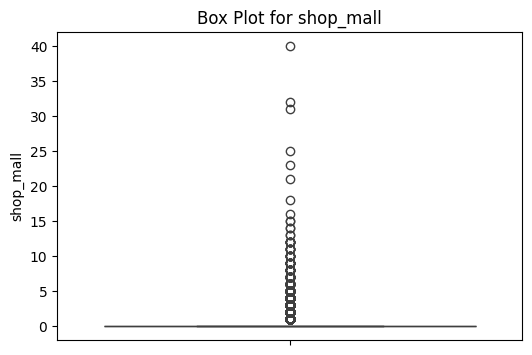

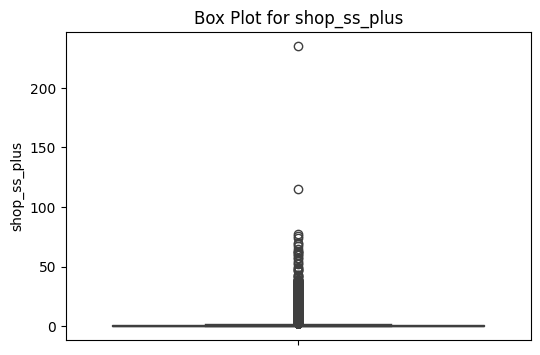

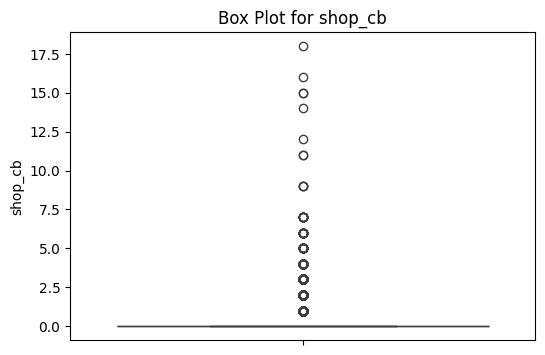

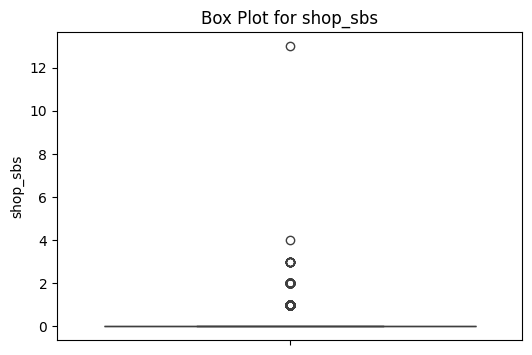

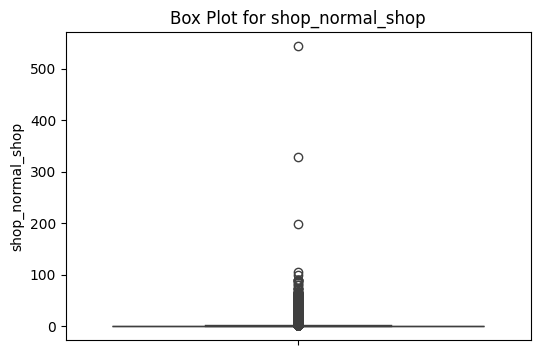

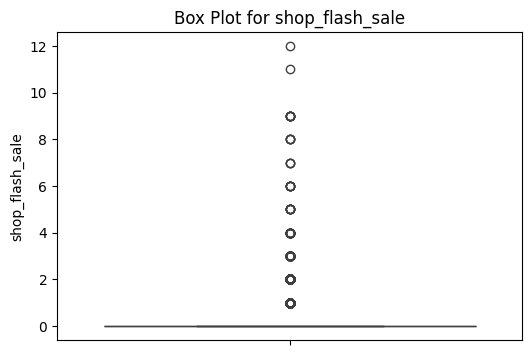

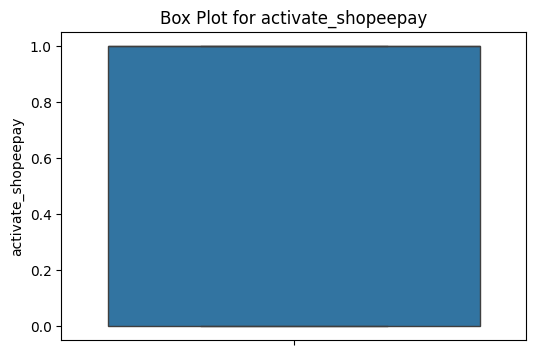

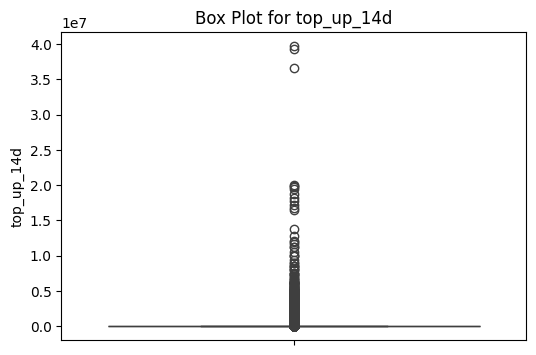

In [12]:
#remove the user id for box plot
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop(['user_id', 'label'])

# Generate a box plot for each numerical column, excluding 'user_id' and 'label'
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

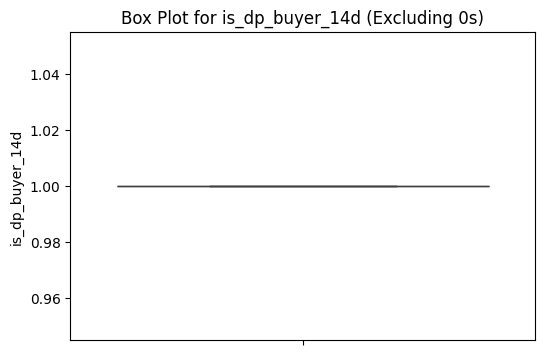

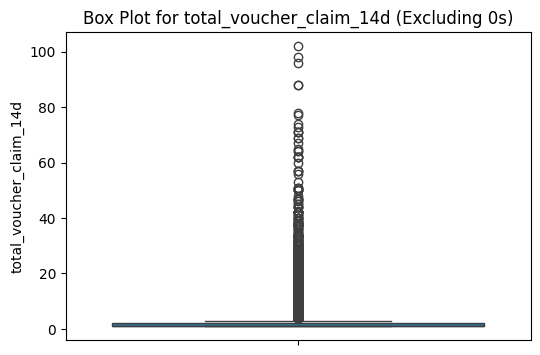

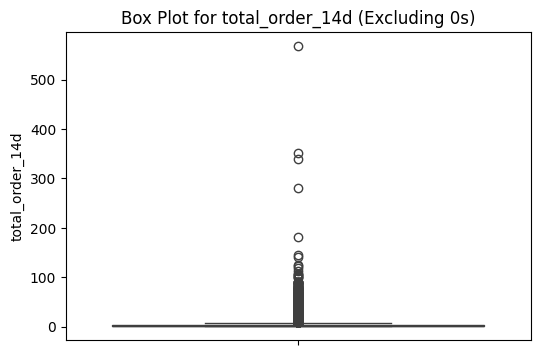

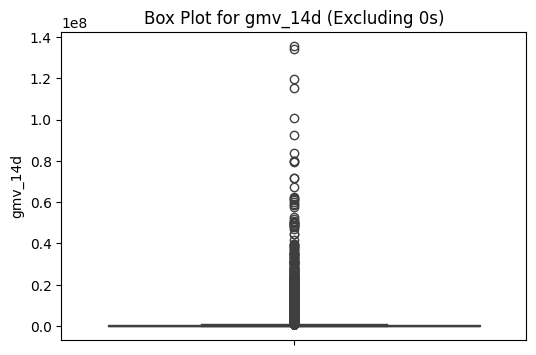

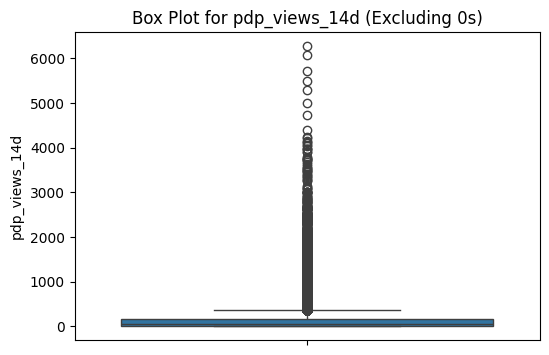

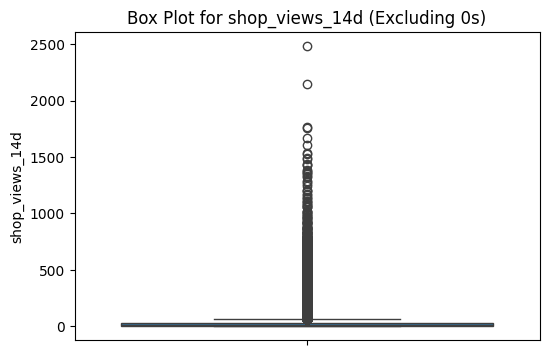

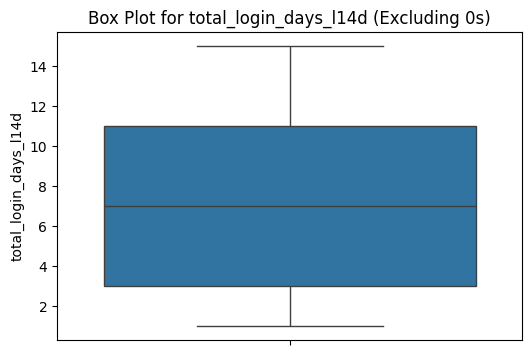

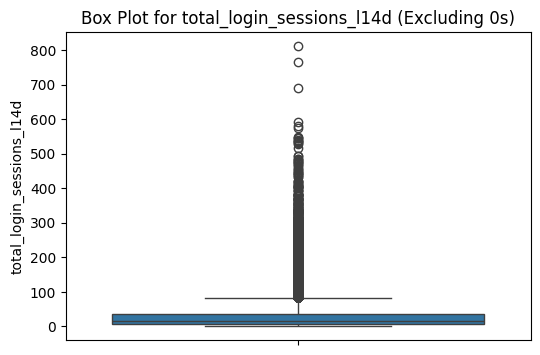

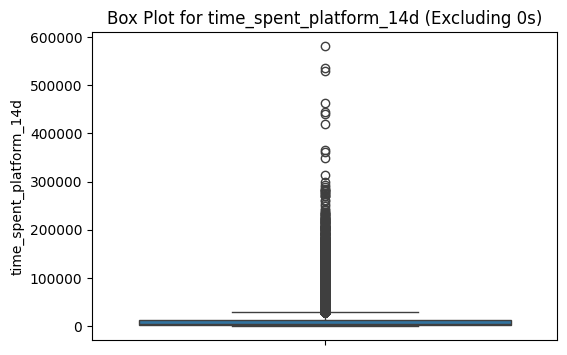

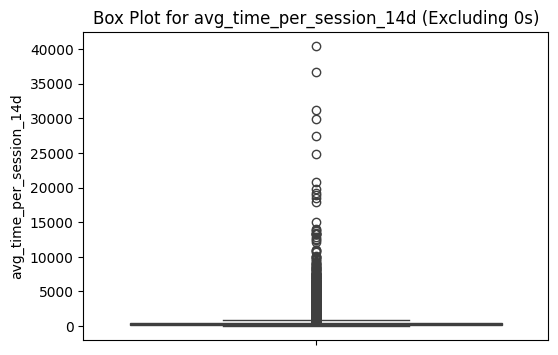

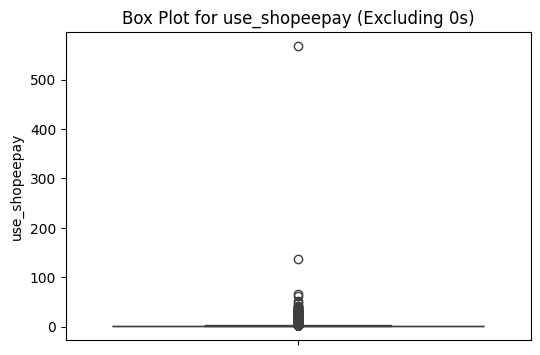

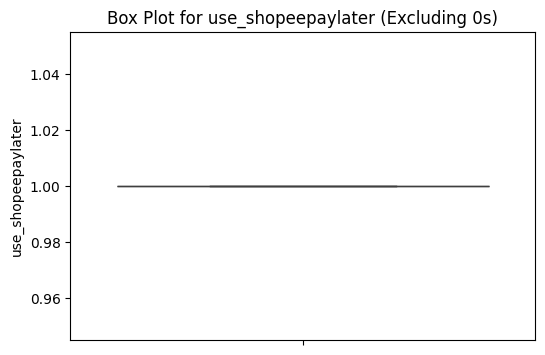

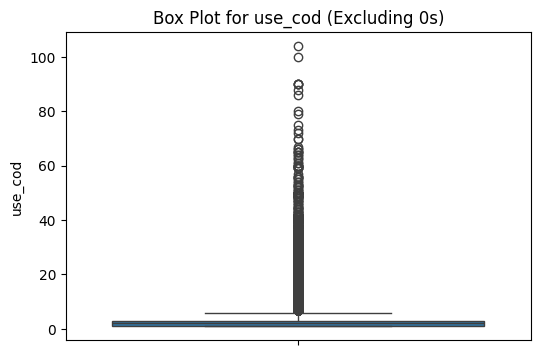

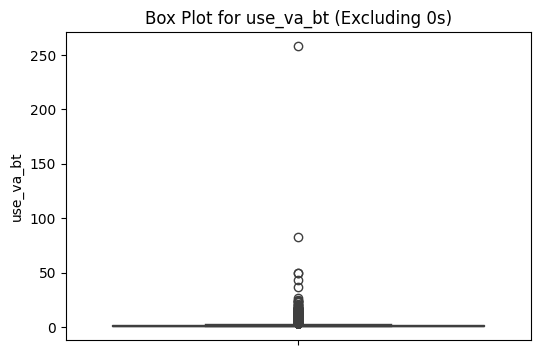

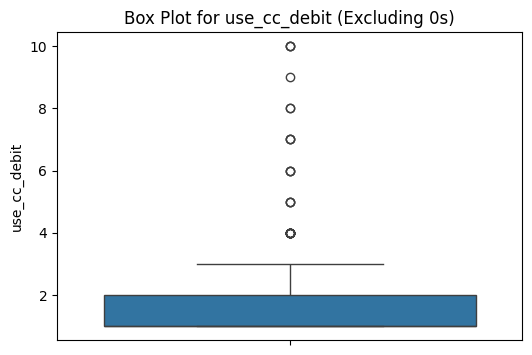

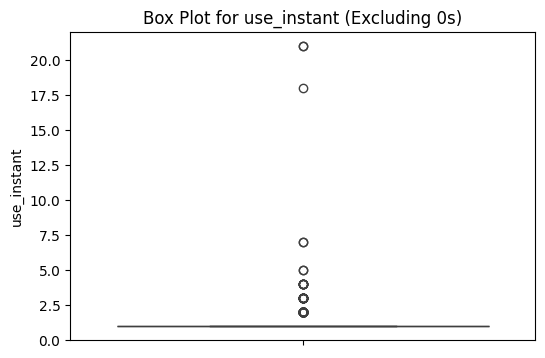

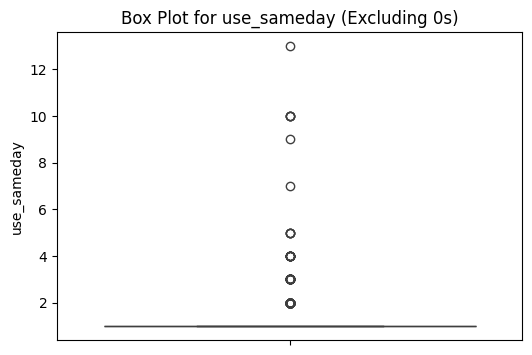

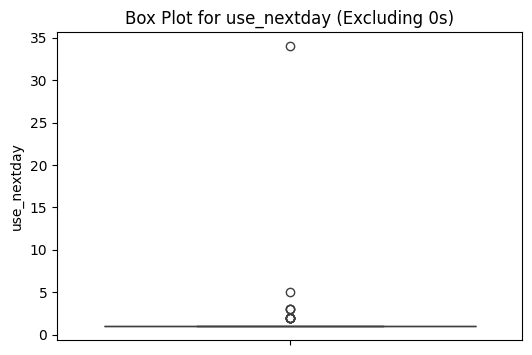

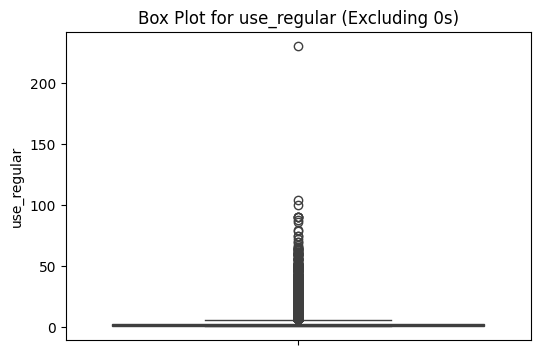

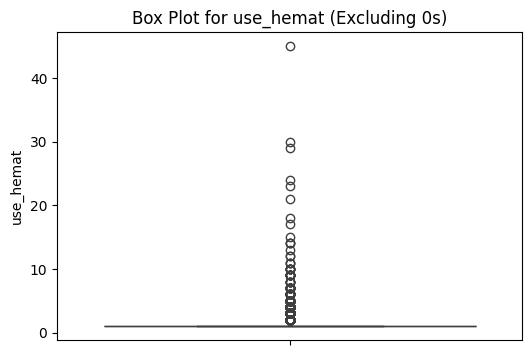

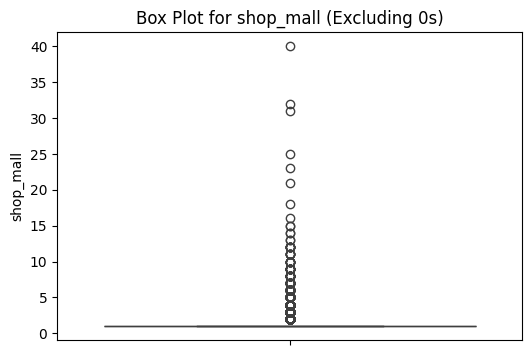

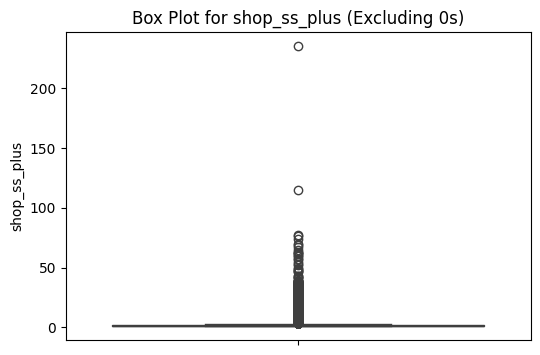

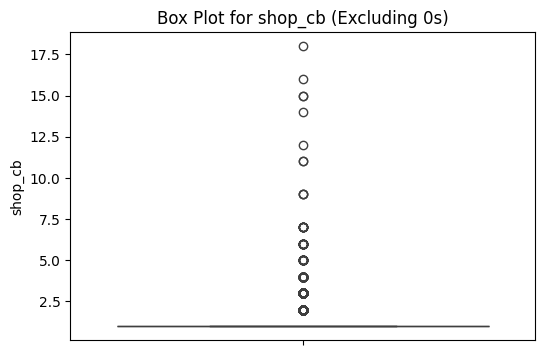

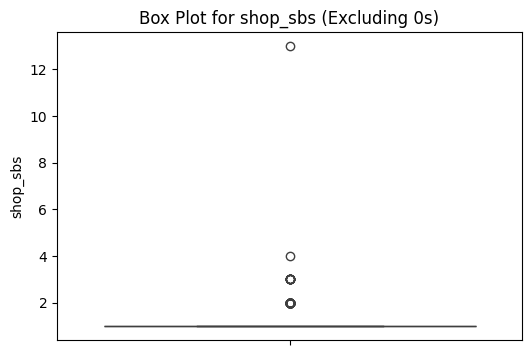

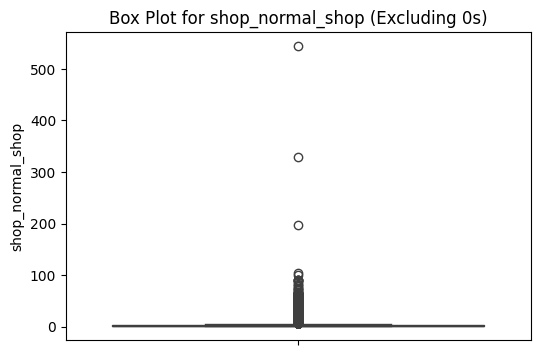

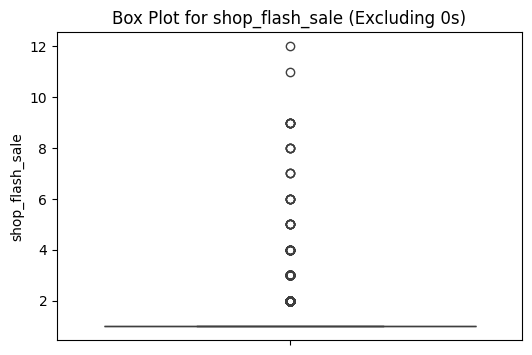

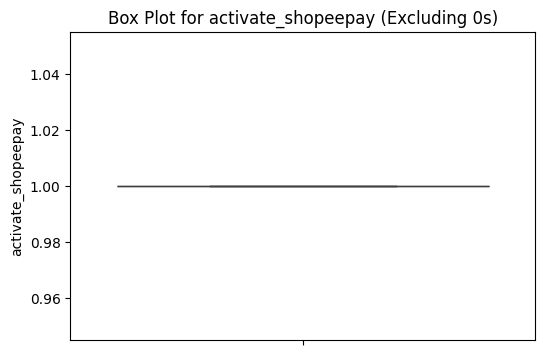

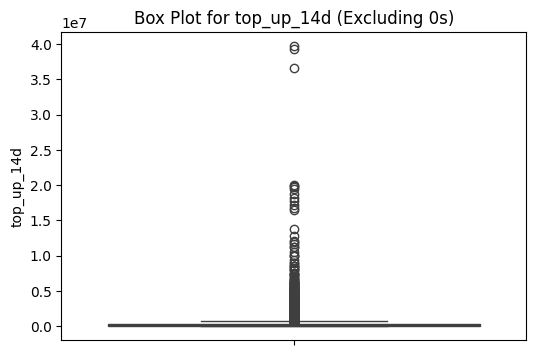

In [14]:
# Since most data fall on 0, it sow box plot for data non zero
for column in numerical_columns:
    # Filter out the zeros
    non_zero_data = df[df[column] != 0][column]
    
    # Create the box plot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=non_zero_data)
    plt.title(f'Box Plot for {column} (Excluding 0s)')
    plt.show()

Most column conatin outliar. The outliar is potential a true event so it's not that wise to remove the rows. The other approach is capping by using winsorazing method to transform the otuliar into closest percentile so it wont make too much bias but at the same time still maintain the value to be counted.

## Transform the outliar with capping

## Check the percintile

In [15]:
# check the percintil wihtout the zero value
percentiles = {}
for column in numerical_columns:
    non_zero_data = df[df[column] != 0][column]
    percentiles[column] = {
        "1st Percentile": non_zero_data.quantile(0.01),
        "99th Percentile": non_zero_data.quantile(0.99)
    }

# Convert the dictionary to a DataFrame for better visualization
percentiles_df = pd.DataFrame(percentiles).T
print(percentiles_df)

                           1st Percentile  99th Percentile
is_dp_buyer_14d                  1.000000     1.000000e+00
total_voucher_claim_14d          1.000000     1.200000e+01
total_order_14d                  1.000000     2.100000e+01
gmv_14d                        995.000000     4.576375e+06
pdp_views_14d                    1.000000     1.008000e+03
shop_views_14d                   1.000000     2.860000e+02
total_login_days_l14d            1.000000     1.500000e+01
total_login_sessions_l14d        1.000000     1.590000e+02
time_spent_platform_14d         87.343050     7.614107e+04
avg_time_per_session_14d        40.970875     1.603408e+03
use_shopeepay                    1.000000     1.500000e+01
use_shopeepaylater               1.000000     1.000000e+00
use_cod                          1.000000     1.700000e+01
use_va_bt                        1.000000     7.000000e+00
use_cc_debit                     1.000000     8.600000e+00
use_instant                      1.000000     5.100000e+

Since the ouliar quite large, non zero value are to reduce the imbalance distribution. and from the 99th percintile we can cap the top value. SO we transform all data beyond that point with 99th to improve perfomances

In [16]:
import numpy as np
#transfrom only top percintile to 99th percintile

# For each numerical column, excluding 'user_id' and 'label'
for column in numerical_columns:
    # Calculate the 99th percentile without considering zeros
    percentile_99 = df[df[column] != 0][column].quantile(0.99)
    
    # Cap the values at the 99th percentile
    df.loc[df[column] > percentile_99, column] = percentile_99


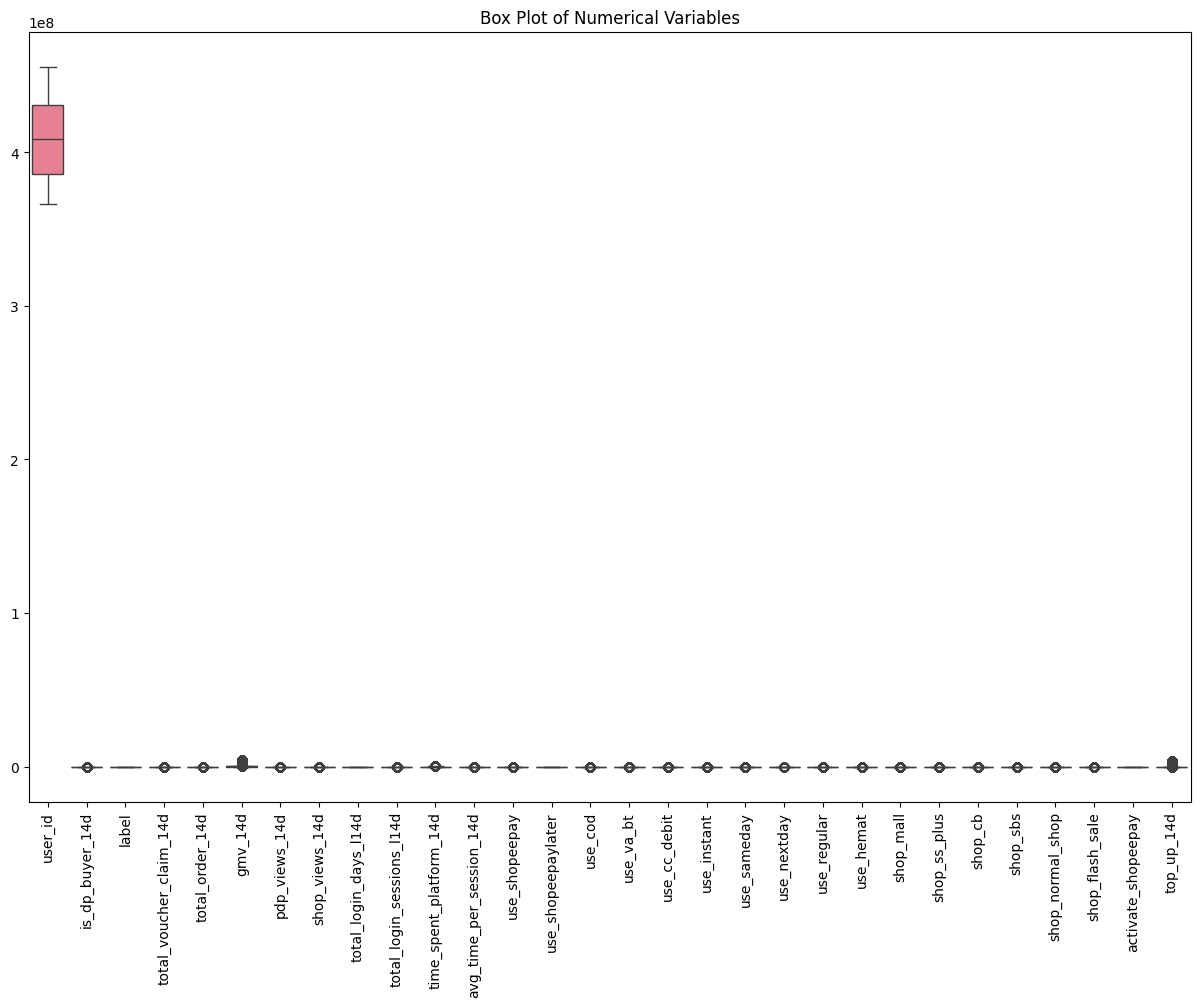

In [17]:
# view the box plot after winsorization
# Generate box plots for each numerical variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.title('Box Plot of Numerical Variables')
plt.show()

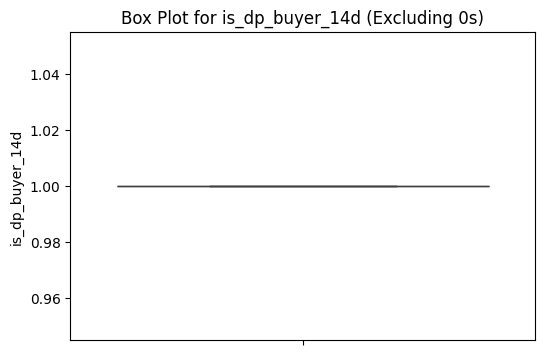

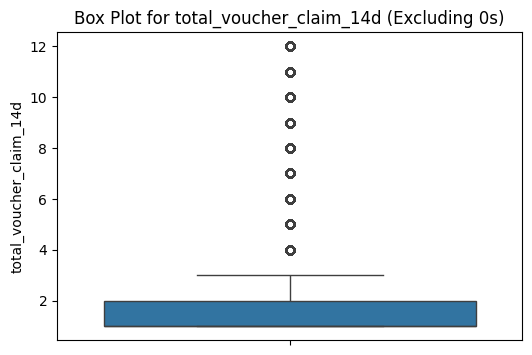

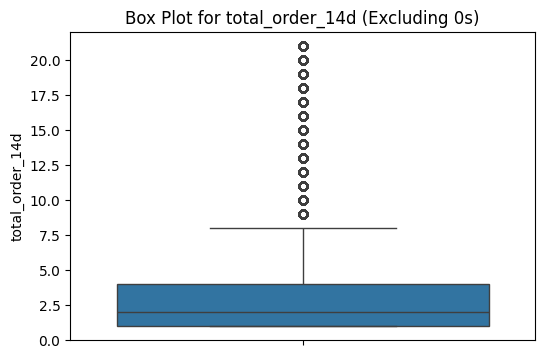

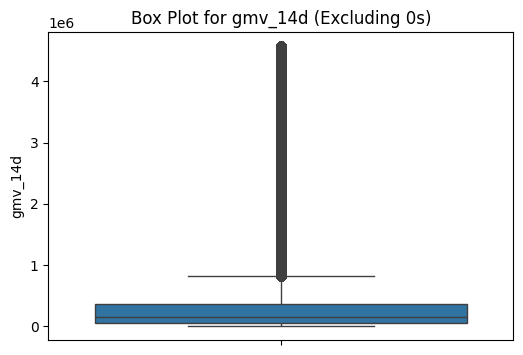

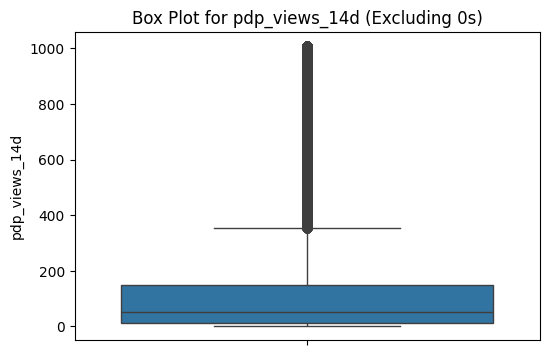

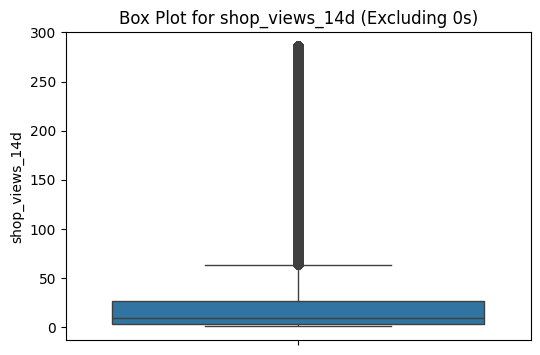

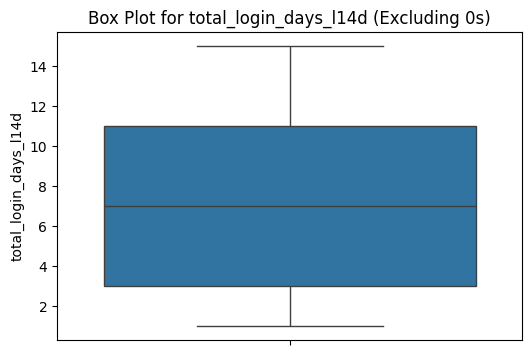

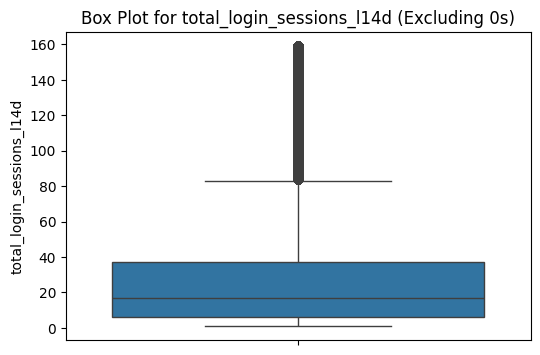

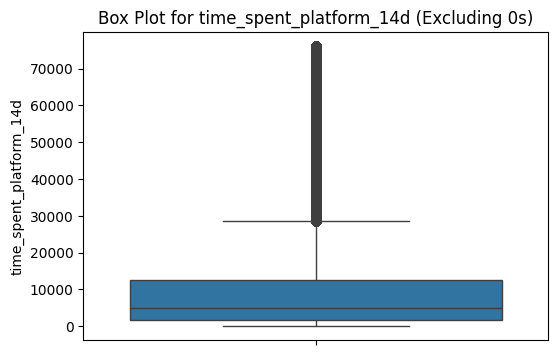

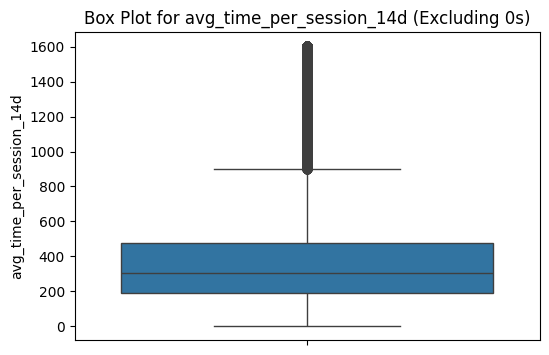

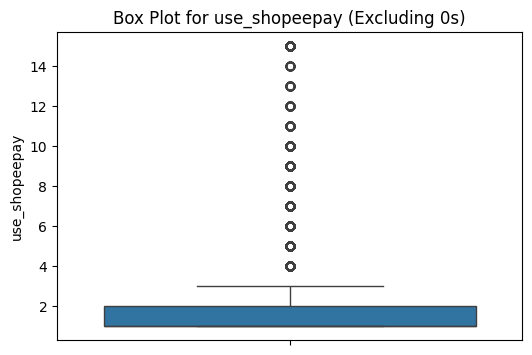

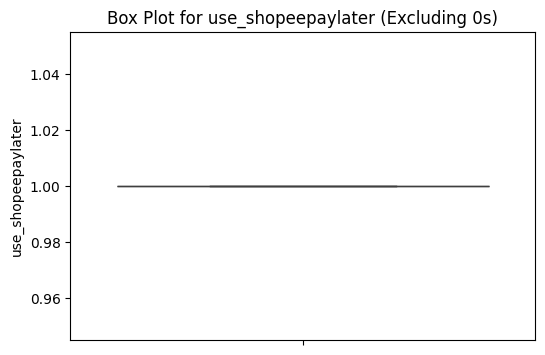

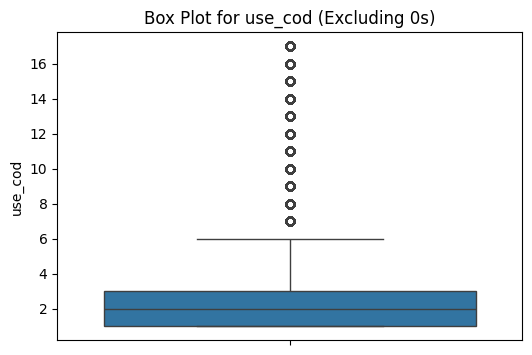

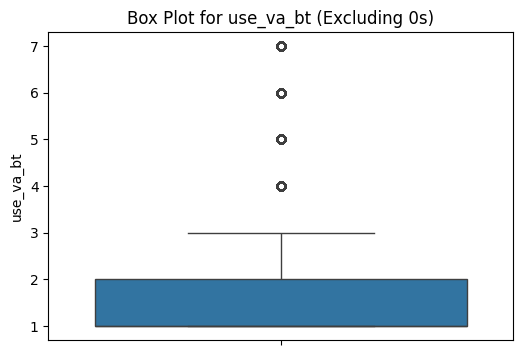

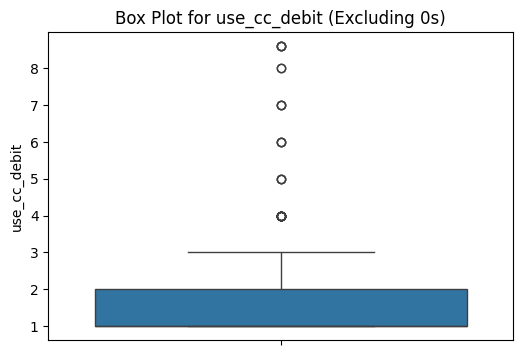

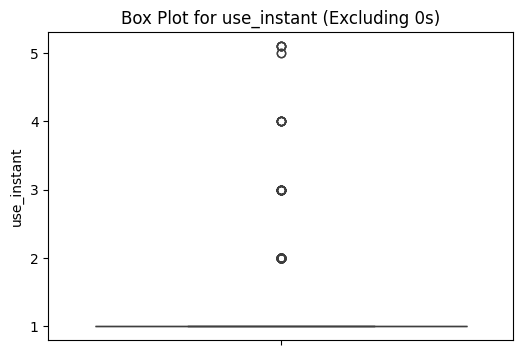

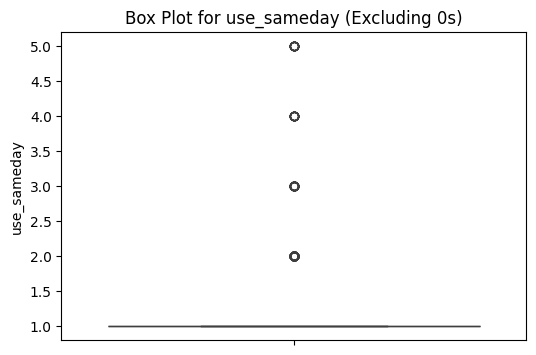

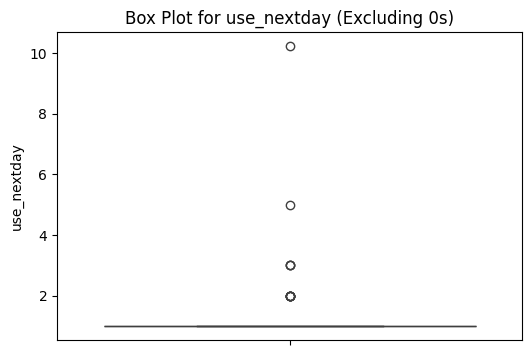

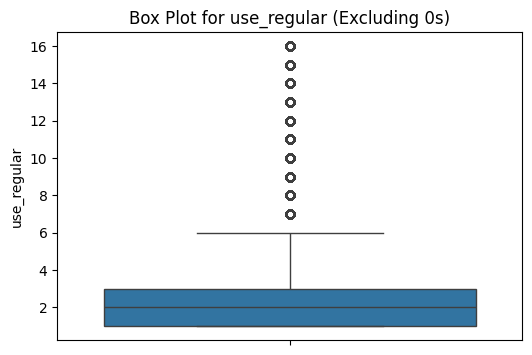

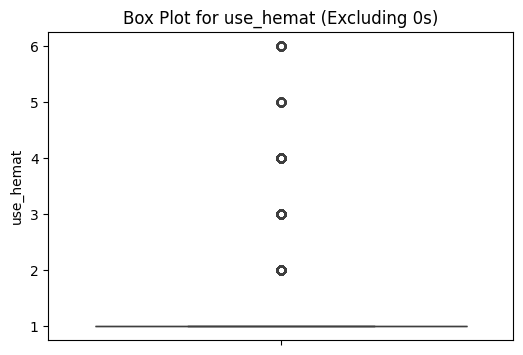

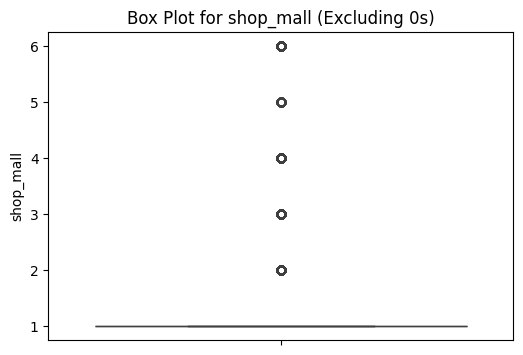

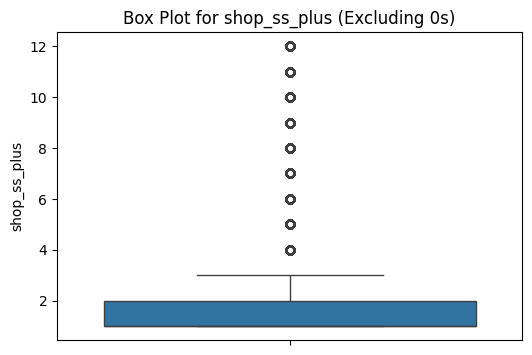

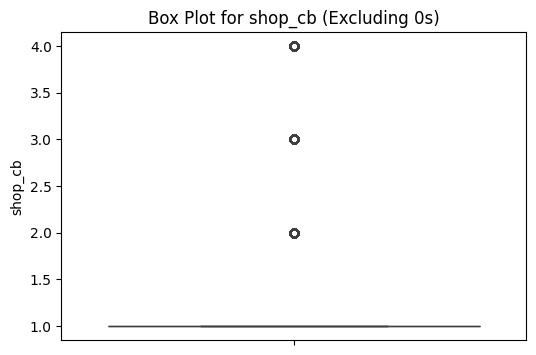

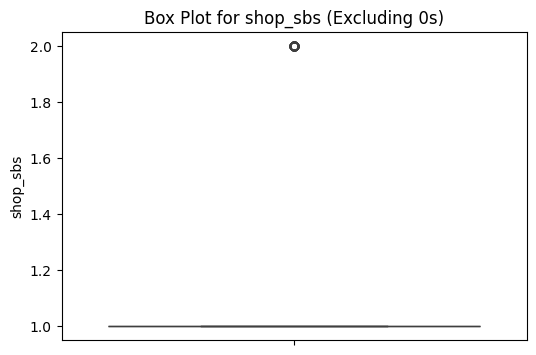

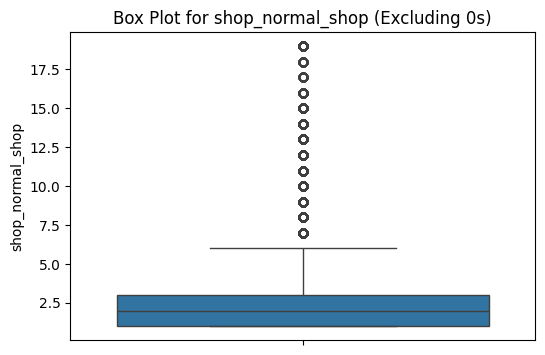

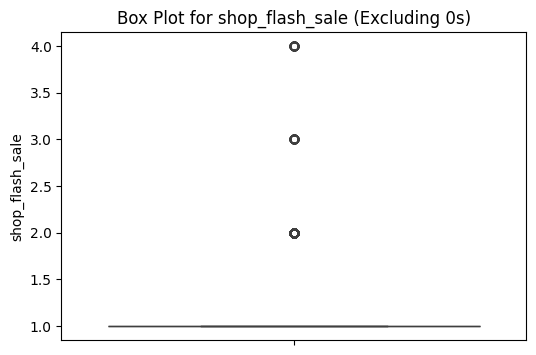

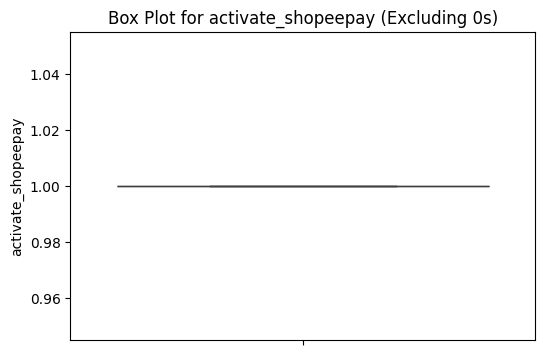

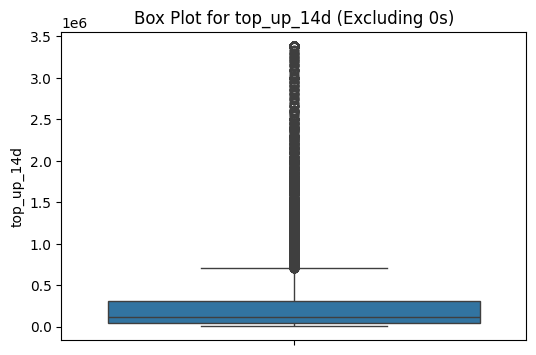

In [18]:
# Box plot after capping
for column in numerical_columns:
    # Filter out the zeros
    non_zero_data = df[df[column] != 0][column]
    
    # Create the box plot
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=non_zero_data)
    plt.title(f'Box Plot for {column} (Excluding 0s)')
    plt.show()

the distribution looks much better than before

# check data after transformation

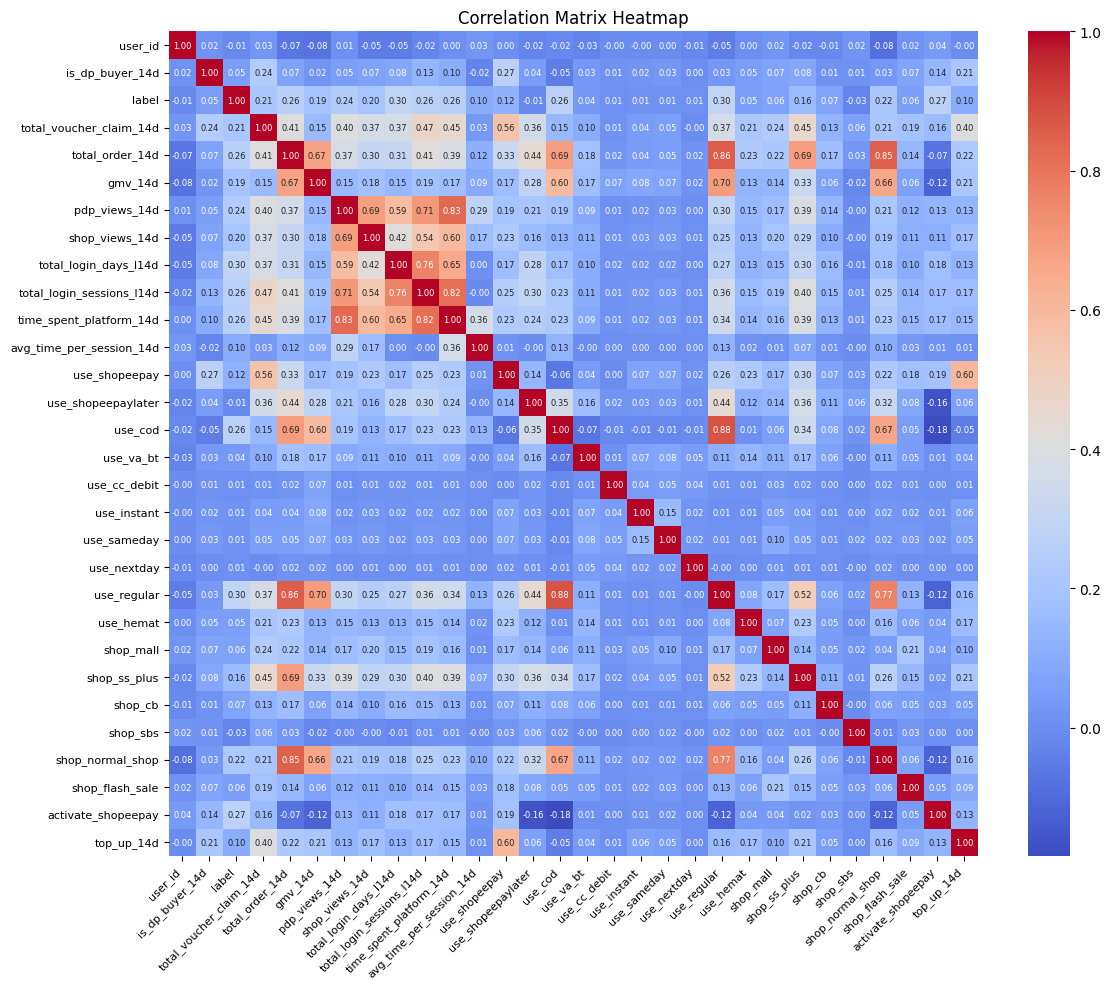

In [19]:
import seaborn as sns

#correlation table
#Get only Numerical value for correlation
numerical_data = df.select_dtypes(include=['number'])  # This selects both int and float columns

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

import matplotlib.pyplot as plt
# Plot the heatmap with adjusted font sizes
plt.figure(figsize=(12, 10))  # You might need to adjust the figure size based on your actual data size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0, 
            annot_kws={'size': 6},  # Reduce annotation font size
            xticklabels=True, yticklabels=True)

# Optionally, rotate the tick labels if it makes them more readable
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=8)  # Adjust y-axis labels font size

plt.title('Correlation Matrix Heatmap')
plt.tight_layout()  # This will fit the plot within the figure area nicely
plt.show()

almost no change in correlation which mean it's a good thing that is not effecting a lot the original data

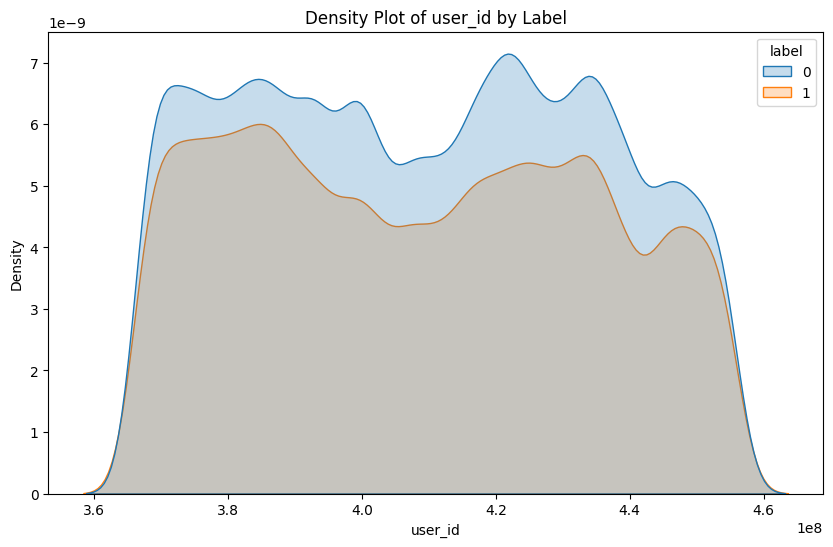

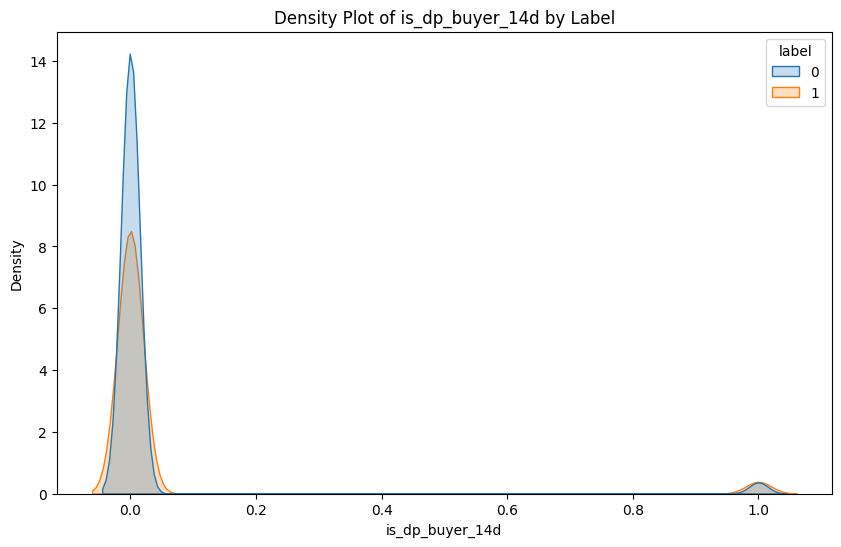

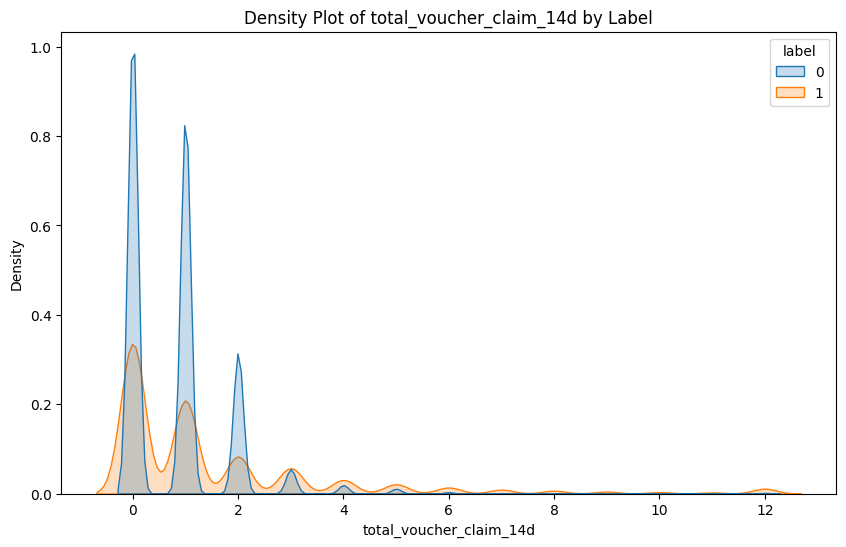

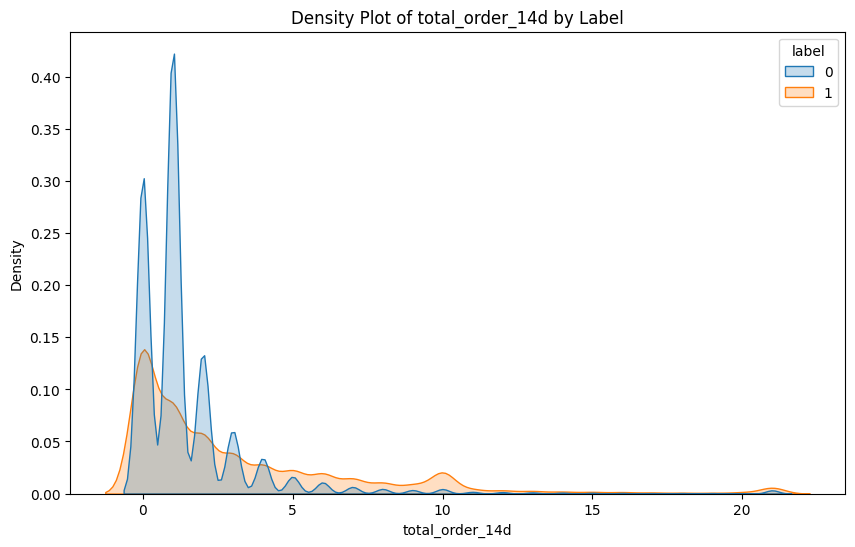

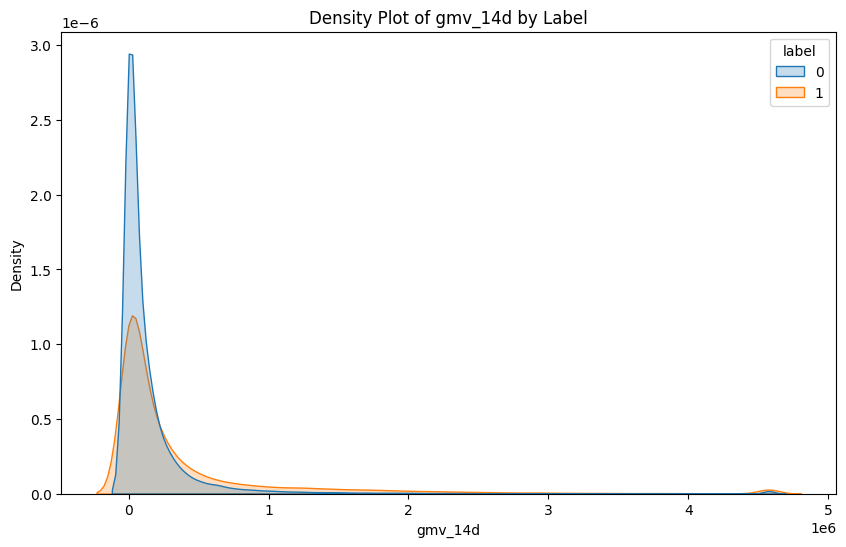

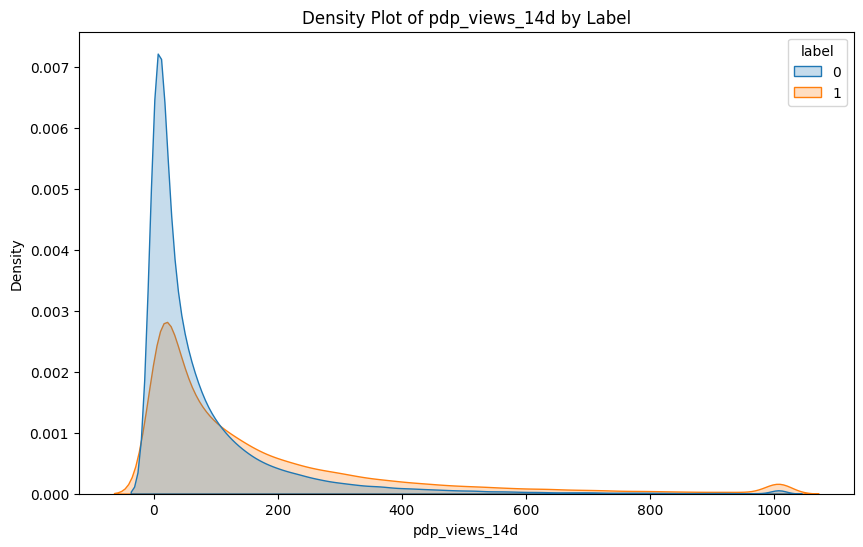

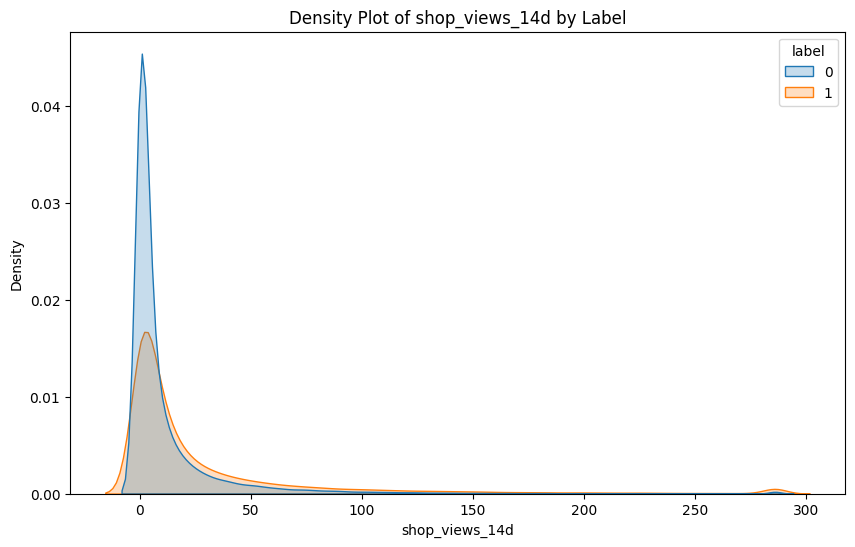

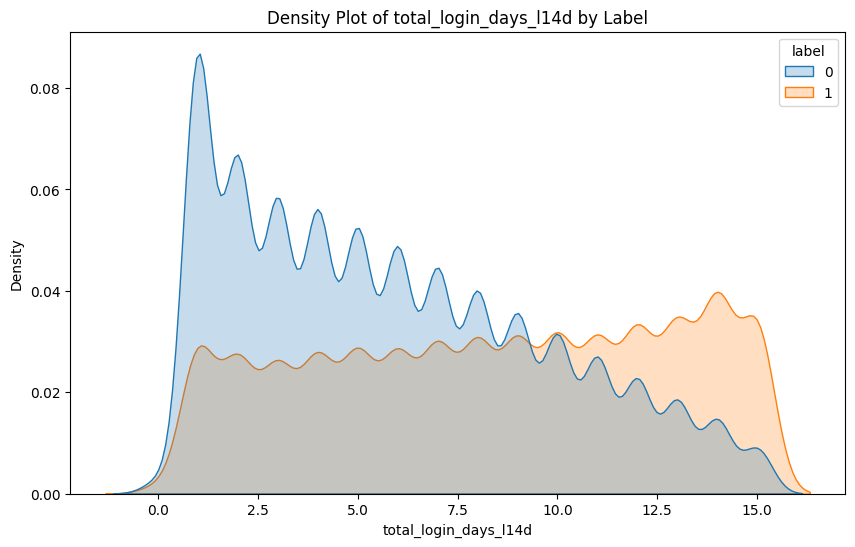

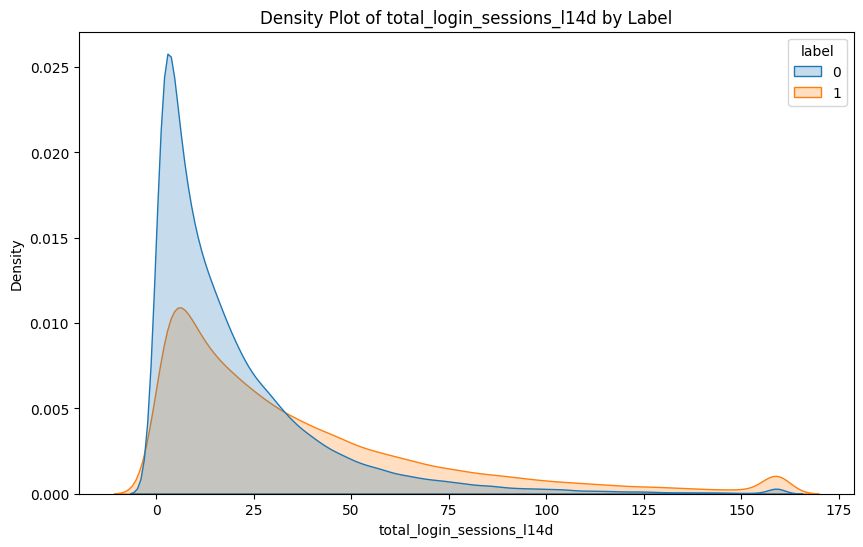

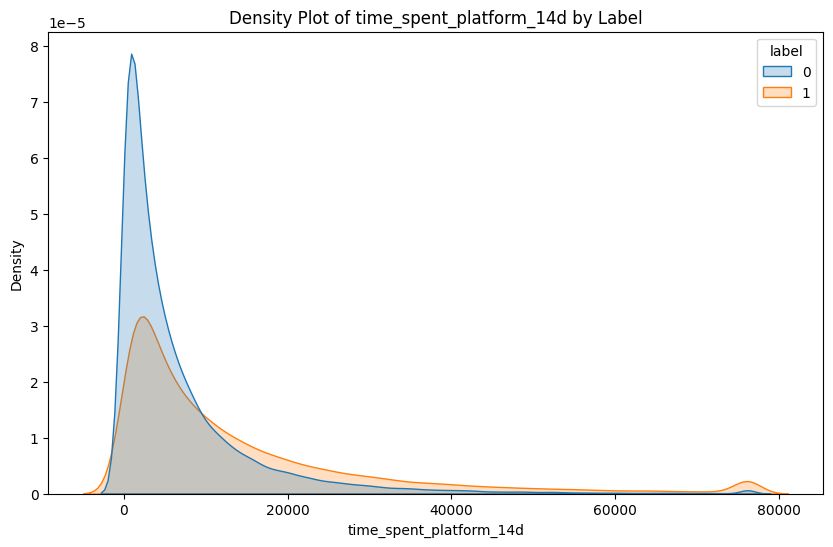

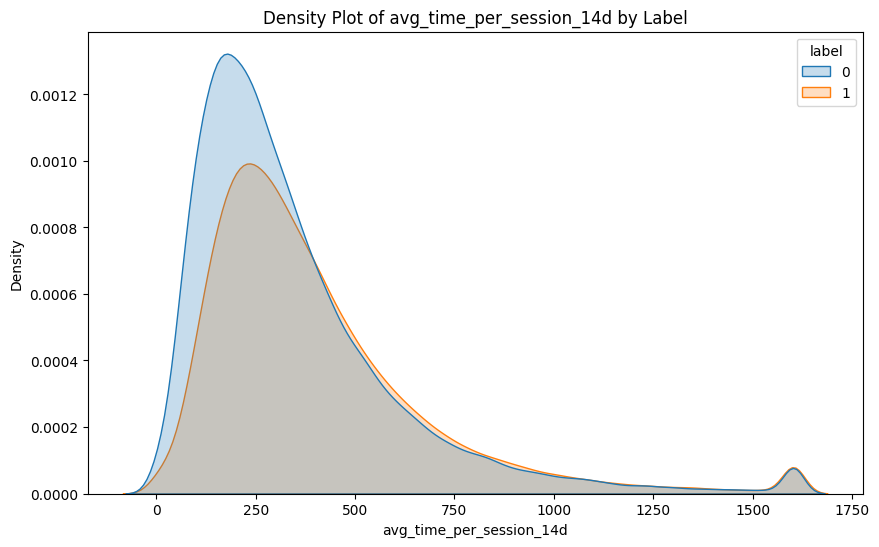

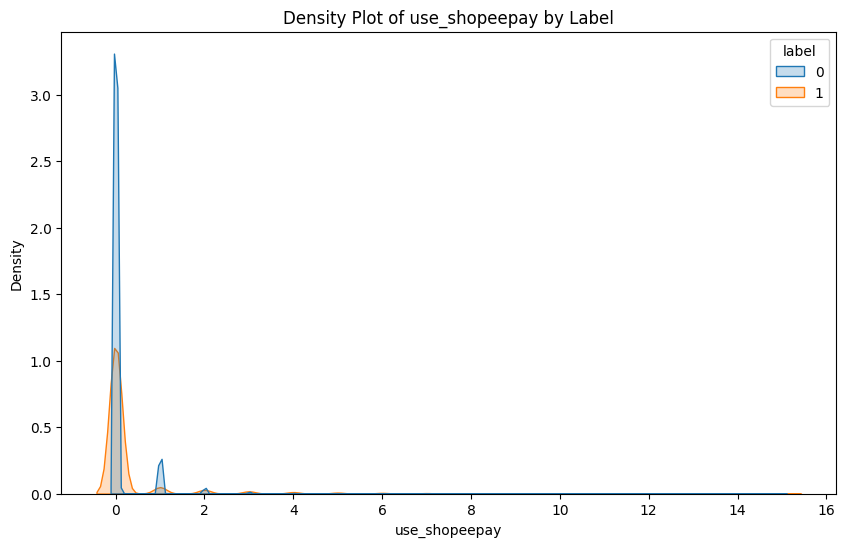

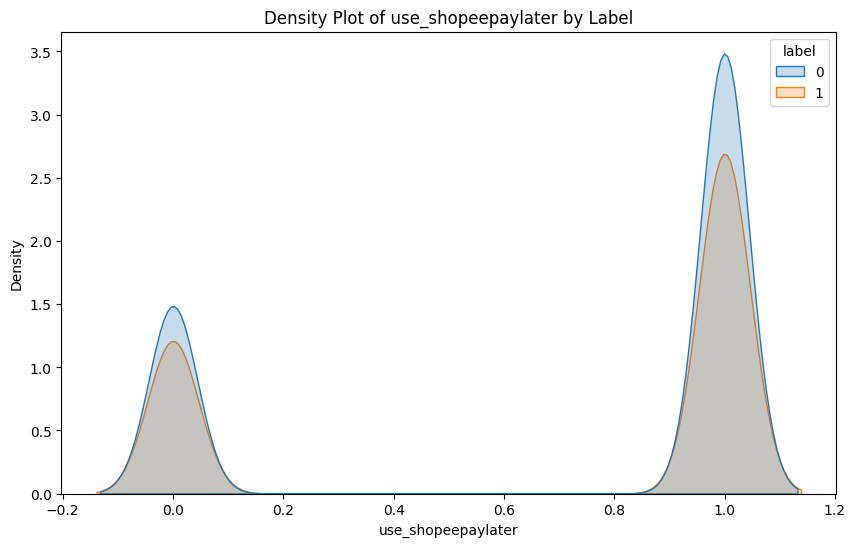

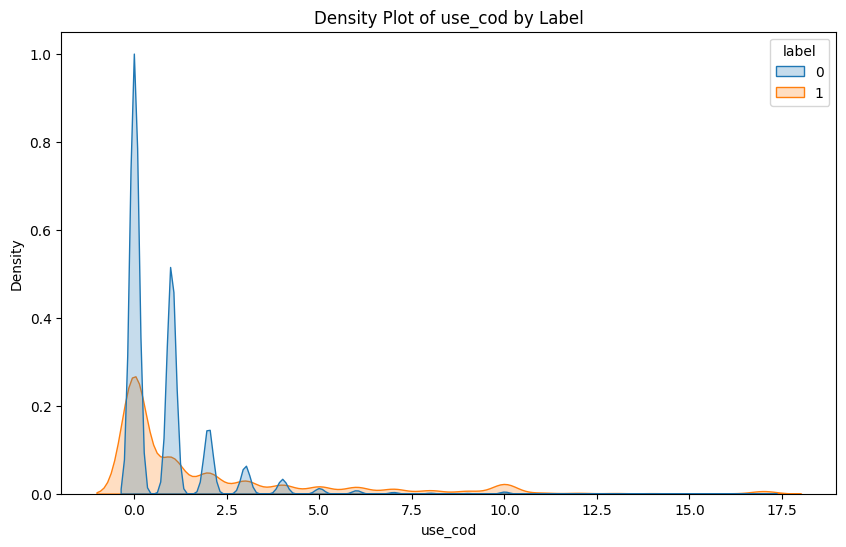

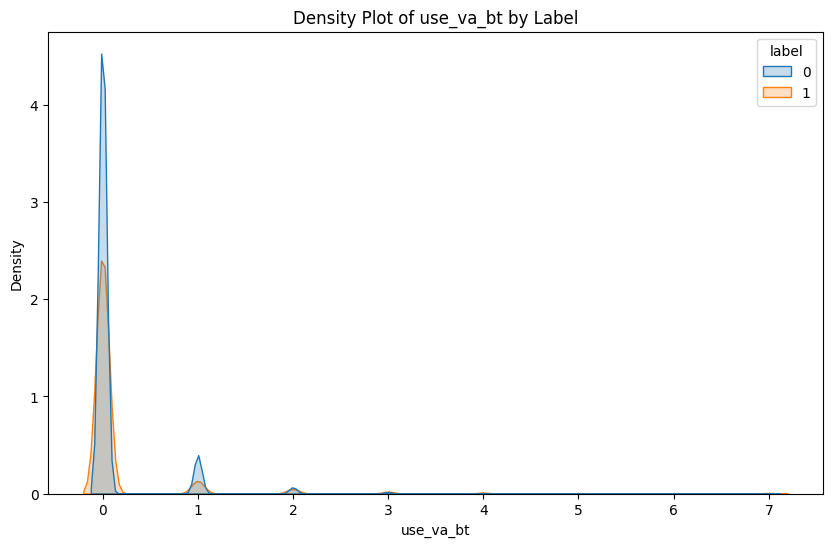

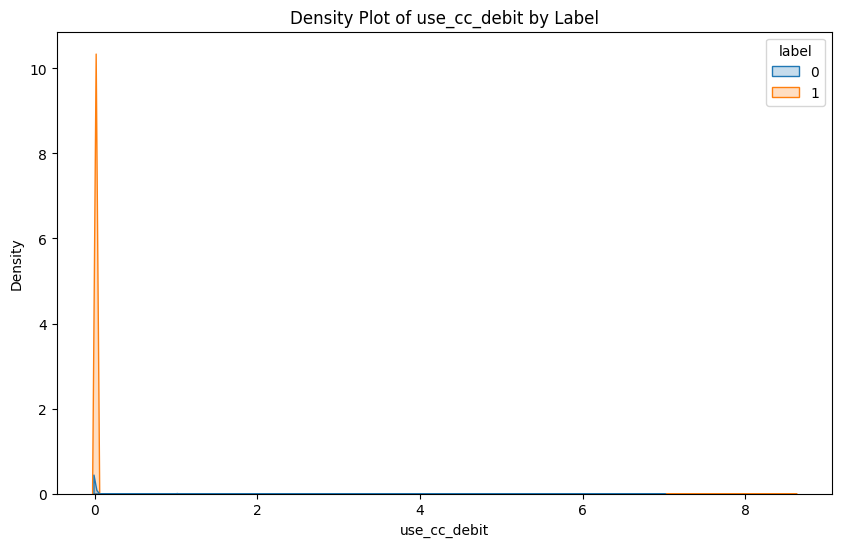

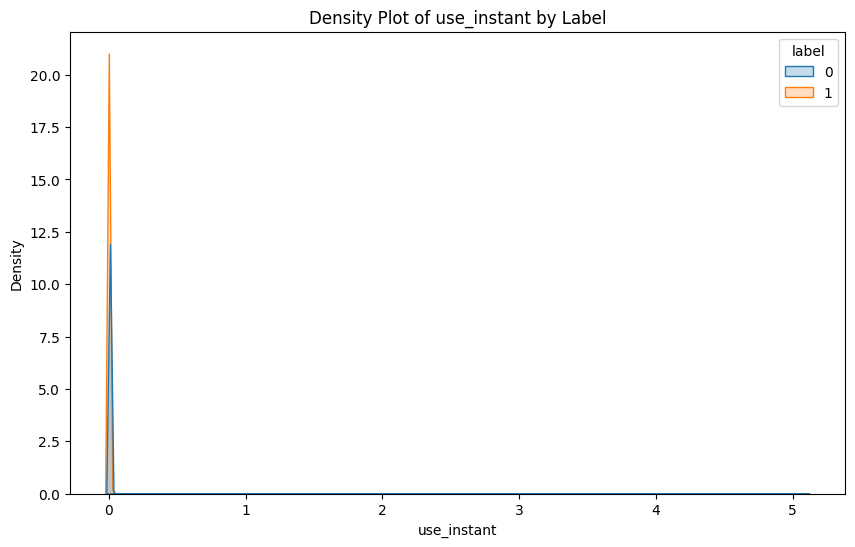

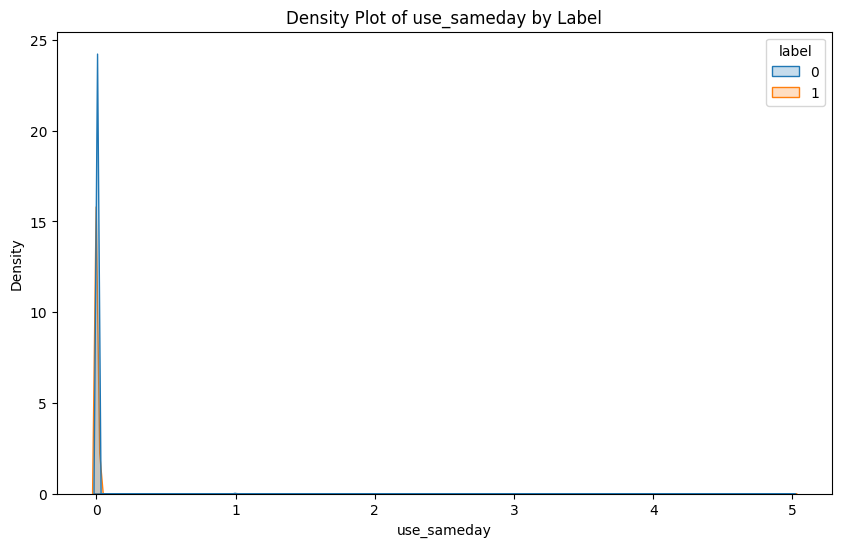

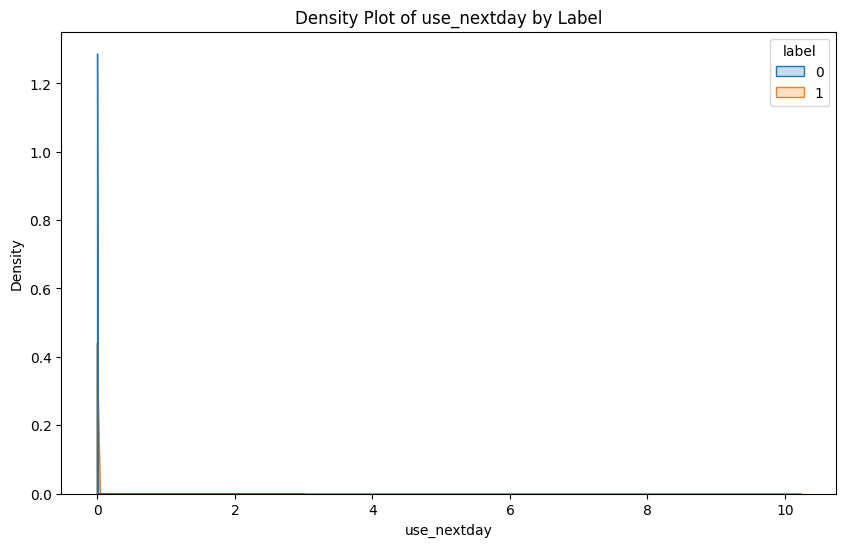

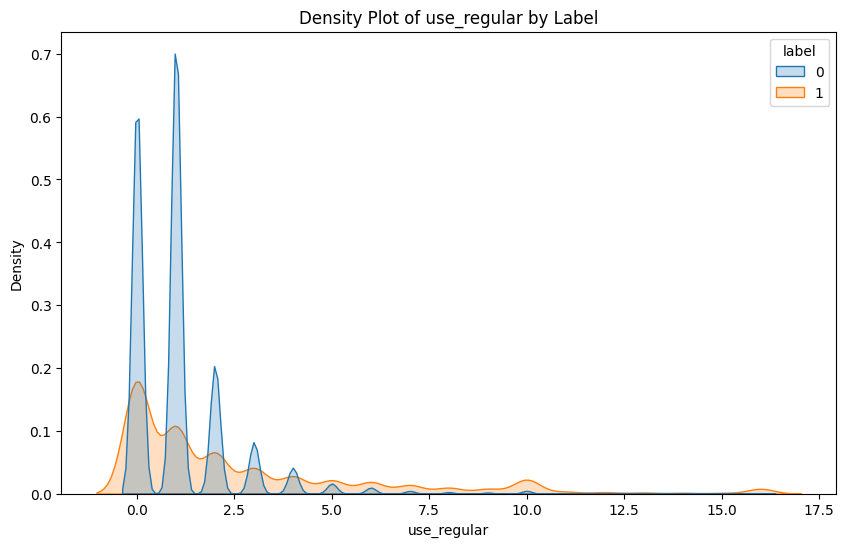

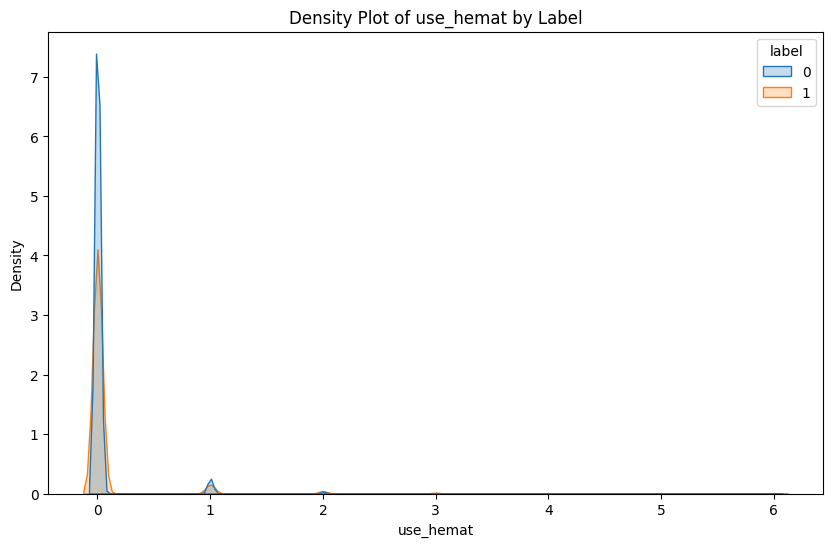

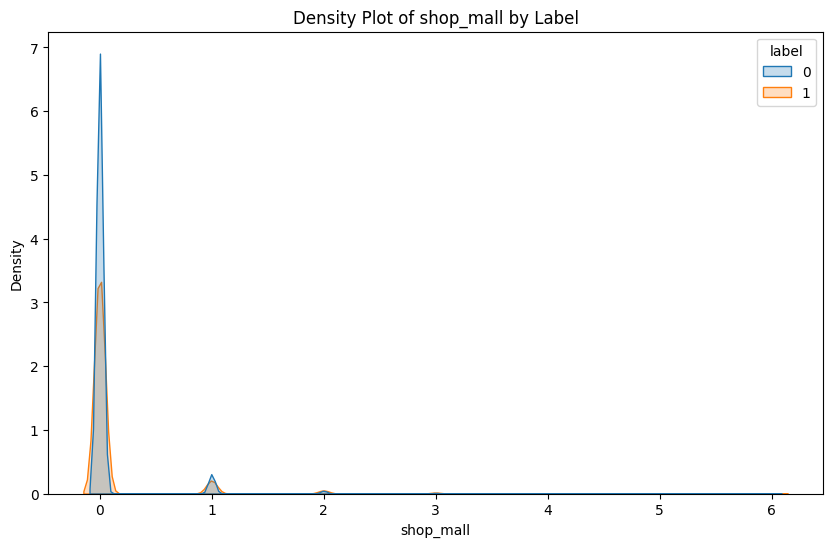

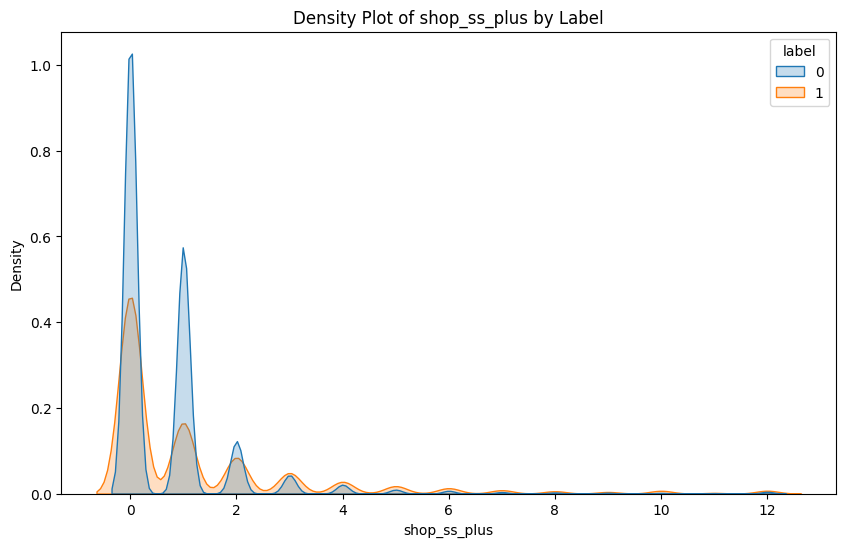

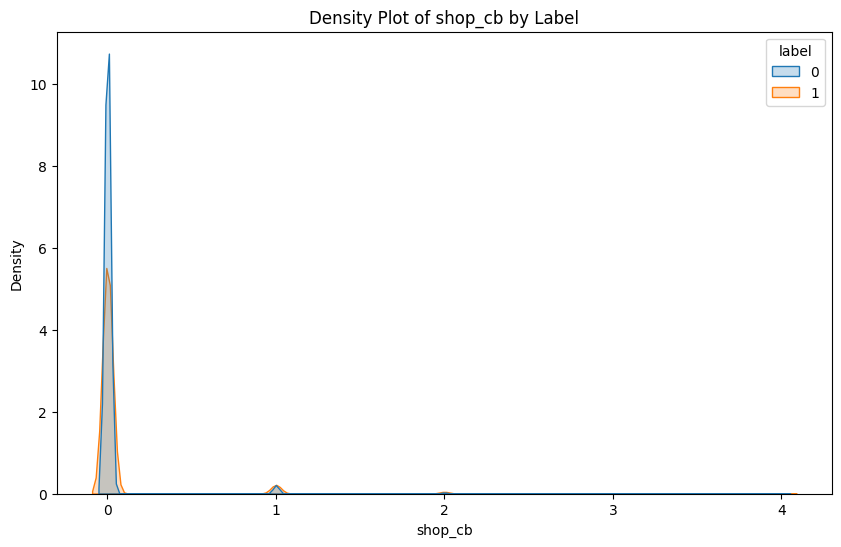

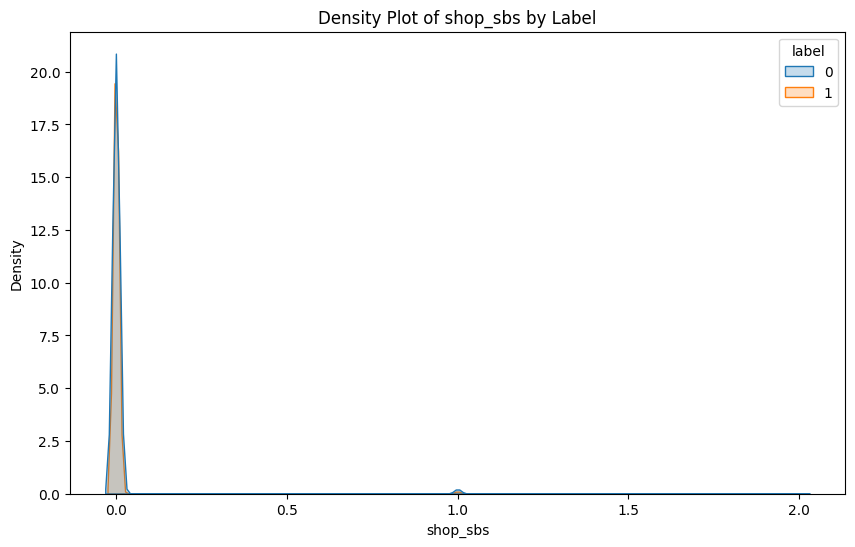

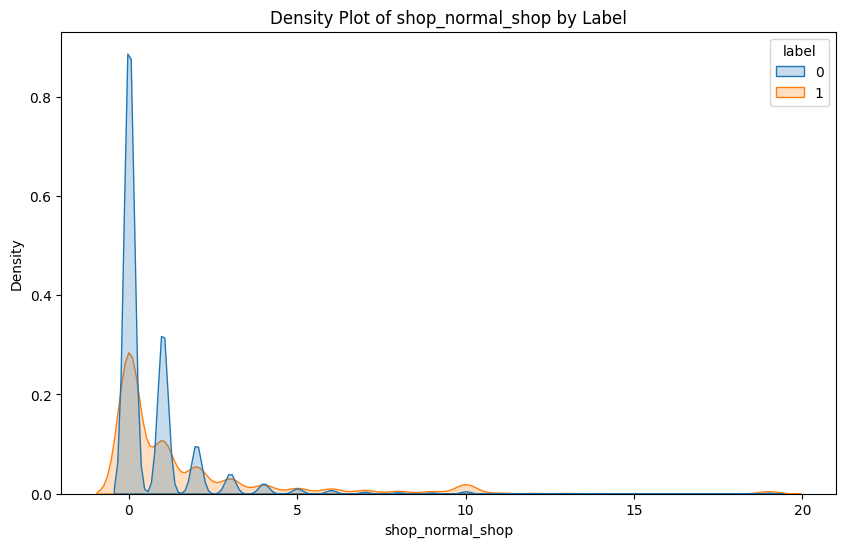

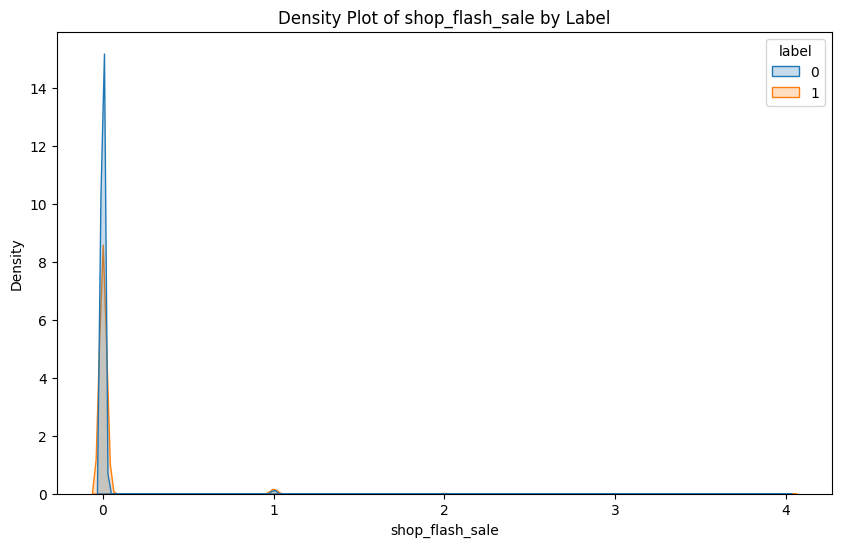

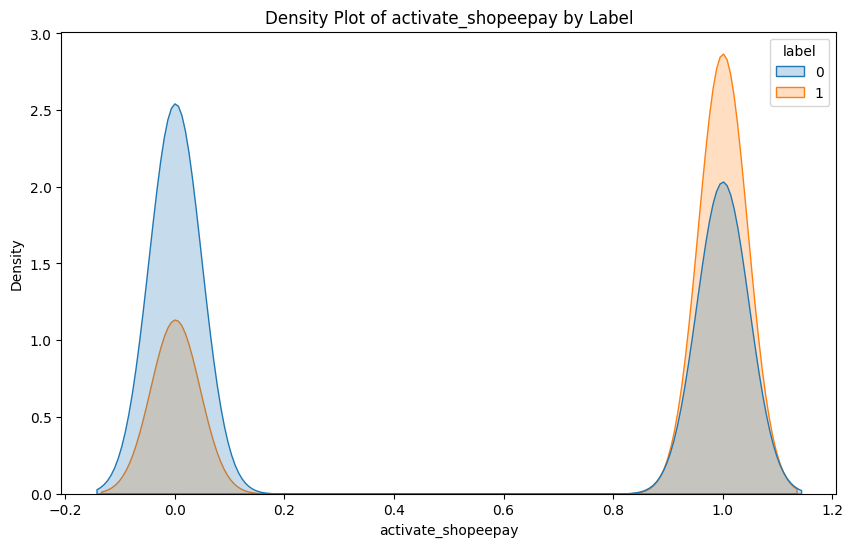

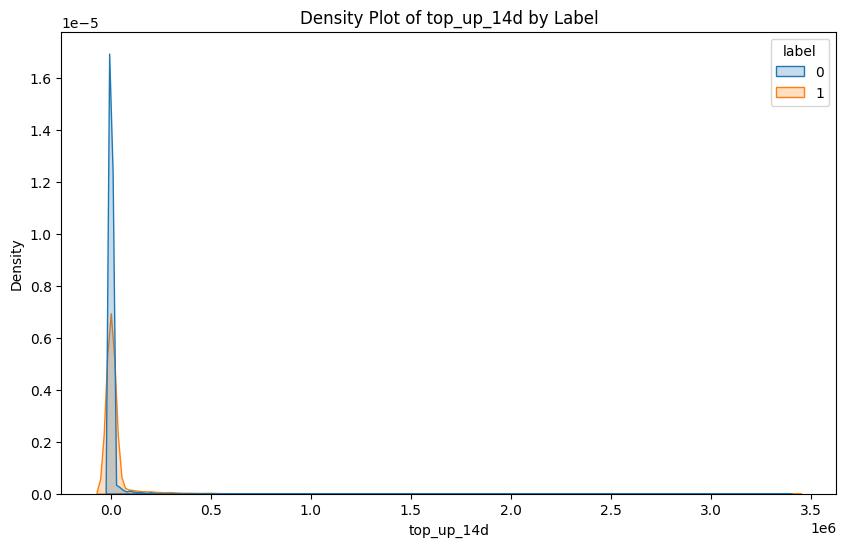

In [20]:
#violin desnity plot after trasnfromation
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('label')

for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=column, hue='label', fill=True)
    plt.title(f'Density Plot of {column} by Label')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


# Categorical analysis

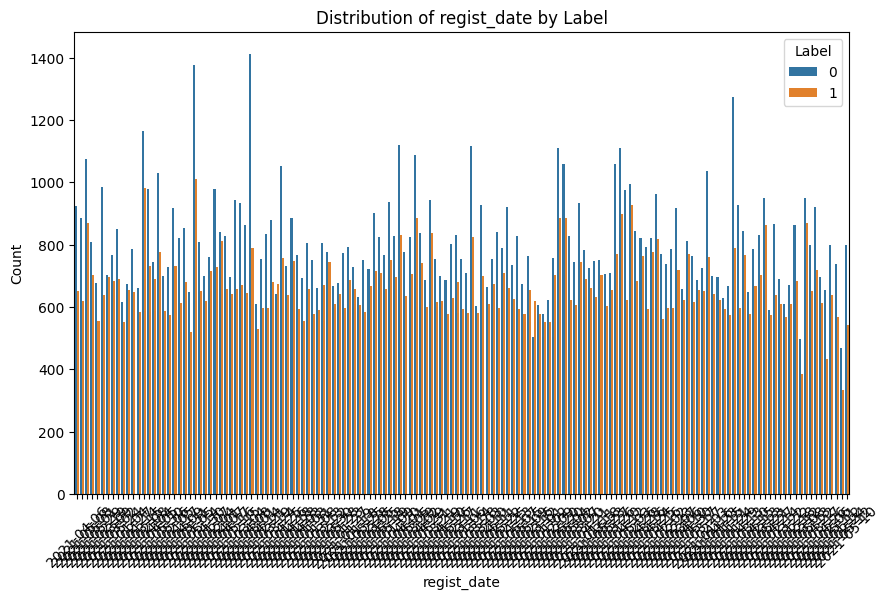

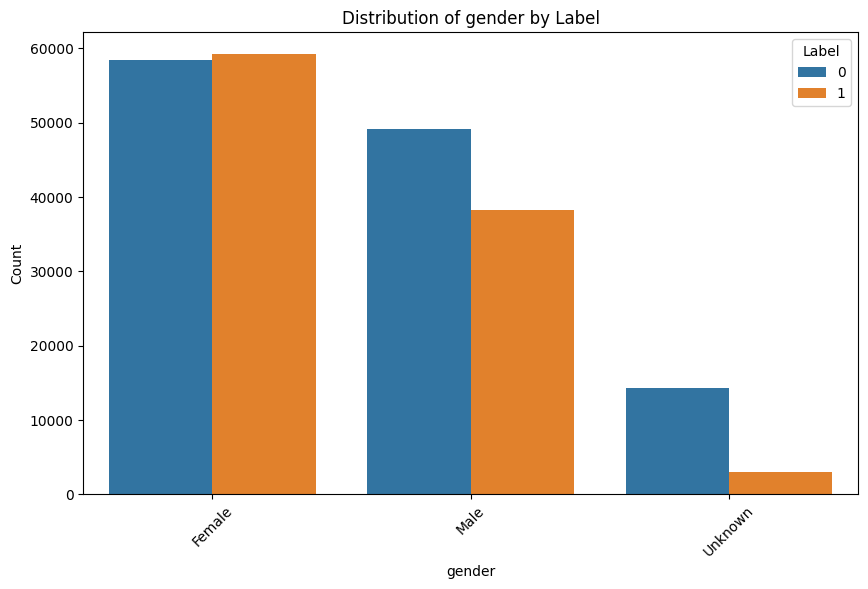

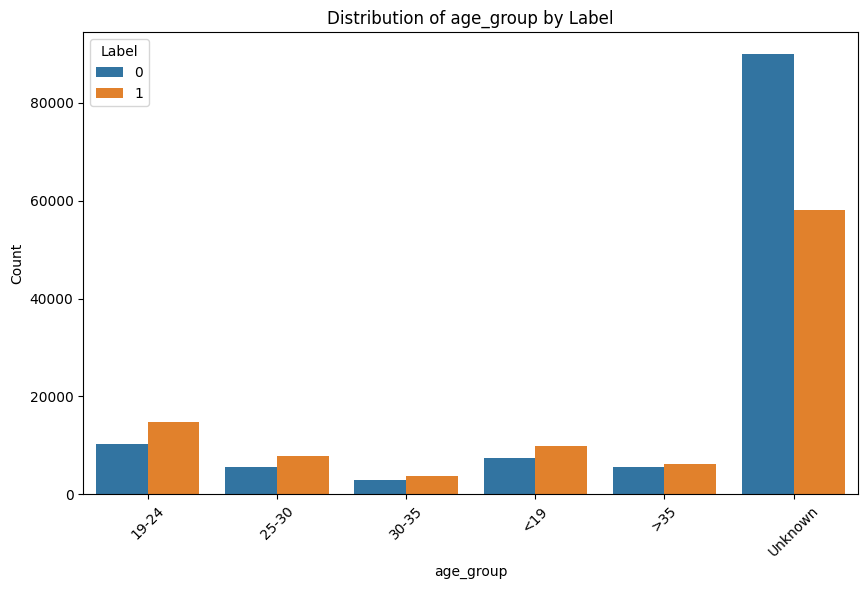

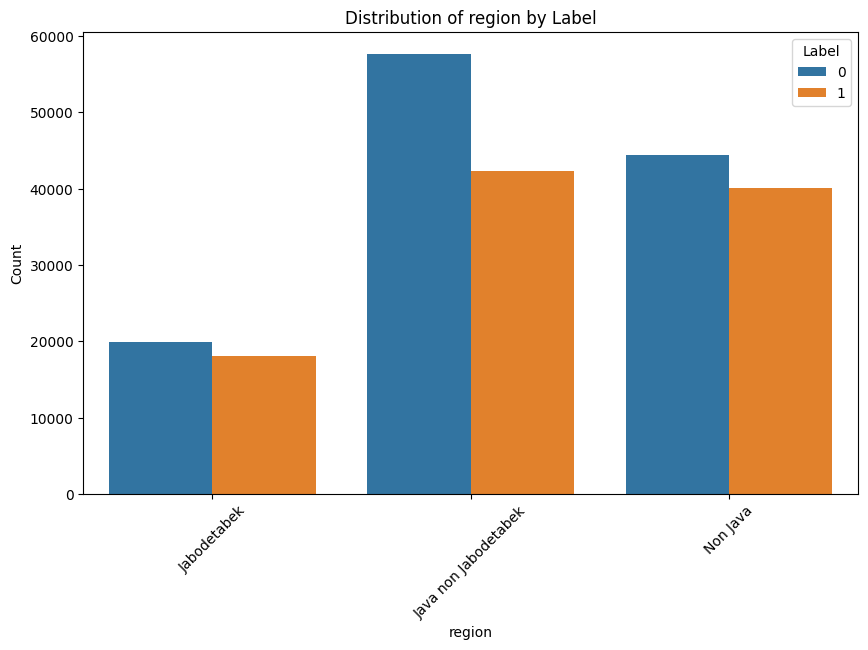

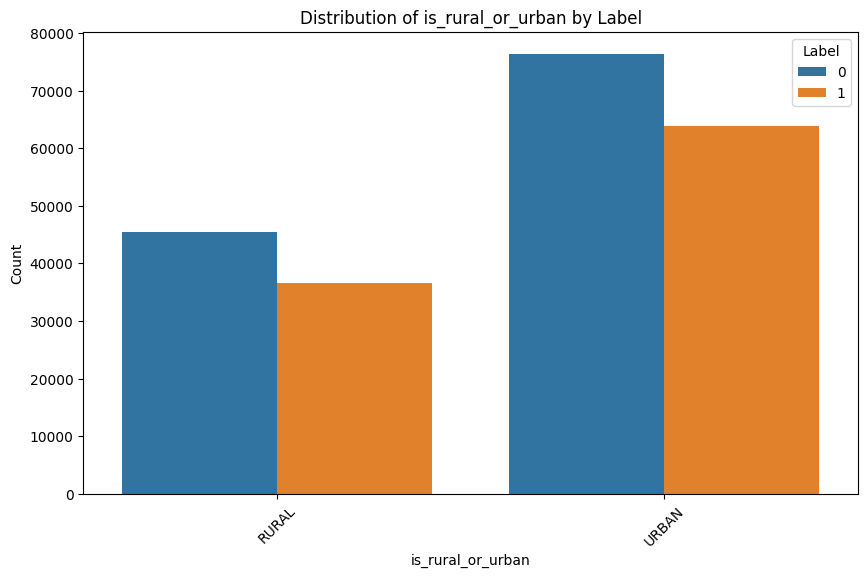

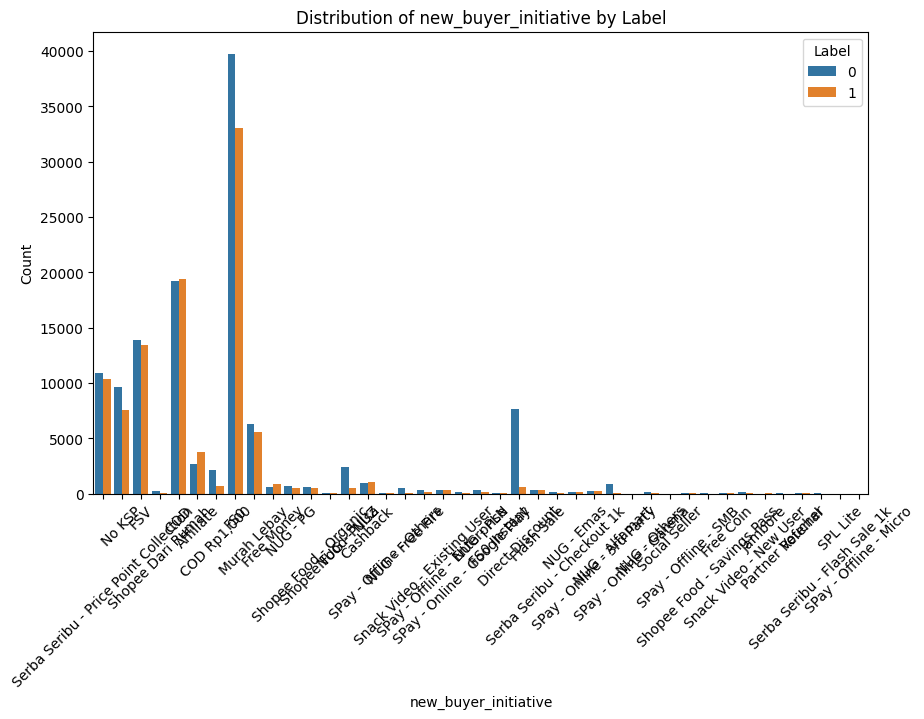

In [21]:
# bar plot against label
#select categorical varaible
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

#making plot itterate
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='label', data=df)
    plt.title(f'Distribution of {column} by Label')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels if they overlap
    plt.legend(title='Label')
    plt.show()

we can see the pattern like female are more likely to regular customer than man, and some other feature also has significances. For the regist-date we can drop the table since it wont be needed

In [22]:
#  for the resgit datee we canvert into 2 column day and months
df['regist_date'] = pd.to_datetime(df['regist_date'], format='%Y-%m-%d')

df['month'] = df['regist_date'].dt.month
df['day'] = df['regist_date'].dt.day

df.drop(columns=['regist_date'], inplace =True)

df.head()

user_id  gender age_group       region is_rural_or_urban  \
0  418329478  Female     19-24  Jabodetabek             RURAL   
1  439733301  Female     19-24  Jabodetabek             RURAL   
2  434646106  Female     19-24  Jabodetabek             RURAL   
3  453720531  Female     19-24  Jabodetabek             RURAL   
4  418277451  Female     19-24  Jabodetabek             RURAL   

   is_dp_buyer_14d  label                   new_buyer_initiative  \
0                0      0  Serba Seribu - Price Point Collection   
1                0      0                                 No KSP   
2                0      0                                    FSV   
3                0      0                      Shopee Dari Rumah   
4                0      0                                    FSV   

   total_voucher_claim_14d  total_order_14d  ...  shop_mall  shop_ss_plus  \
0                      0.0              0.0  ...        0.0           0.0   
1                      0.0              0.0  ...        0.0           0.0   
2                      0.0              0.0  ...        0.0           0.0   
3                      0.0              0.0  ...        0.0           0.0   
4                      0.0              0.0  ...        0.0           0.0   

   shop_cb  shop_sbs  shop_normal_shop  shop_flash_sale  activate_shopeepay  \
0      0.0       0.0               0.0              0.0                   0   
1      0.0       0.0               0.0              0.0                   0   
2      0.0       0.0               0.0              0.0                   0   
3      0.0       0.0               0.0              0.0                   0   
4      0.0       0.0               0.0              0.0                   0   

   top_up_14d  month  day  
0         0.0      4    6  
1         0.0      5    8  
2         0.0      5    1  
3         0.0      5   29  
4         0.0      4    6  

[5 rows x 37 columns]

In [23]:
df.to_csv('Selected_feature.csv')

# Balancing Dataset

The number of lable is imbalance so, we can balanced it with Smote which doing oversampling

## Tranform Categorical into nubmerical using dummies varaible

In [24]:
categorical_columns

Index(['regist_date', 'gender', 'age_group', 'region', 'is_rural_or_urban',
       'new_buyer_initiative'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
data_encoded = pd.get_dummies(df, columns=['gender', 'age_group', 'region', 'is_rural_or_urban',
       'new_buyer_initiative'])

In [26]:
data_encoded.head()

user_id  is_dp_buyer_14d  label  total_voucher_claim_14d  \
0  418329478                0      0                      0.0   
1  439733301                0      0                      0.0   
2  434646106                0      0                      0.0   
3  453720531                0      0                      0.0   
4  418277451                0      0                      0.0   

   total_order_14d  gmv_14d  pdp_views_14d  shop_views_14d  \
0              0.0      0.0           36.0             0.0   
1              0.0      0.0            4.0             0.0   
2              0.0      0.0           77.0             0.0   
3              0.0      0.0            7.0             0.0   
4              0.0      0.0           77.0             9.0   

   total_login_days_l14d  total_login_sessions_l14d  ...  \
0                      3                        5.0  ...   
1                      4                        4.0  ...   
2                      3                        3.0  ...   
3                      1                        1.0  ...   
4                      8                       28.0  ...   

   new_buyer_initiative_Serba Seribu - Checkout 1k  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   new_buyer_initiative_Serba Seribu - Flash Sale 1k  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   new_buyer_initiative_Serba Seribu - Price Point Collection  \
0                                               True            
1                                              False            
2                                              False            
3                                              False            
4                                              False            

   new_buyer_initiative_Shopee Dari Rumah  \
0                                   False   
1                                   False   
2                                   False   
3                                    True   
4                                   False   

   new_buyer_initiative_Shopee Food - NUZ  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   new_buyer_initiative_Shopee Food - Organic  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   new_buyer_initiative_Shopee Food - Savings Pass  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   

   new_buyer_initiative_Snack Video - Existing User  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   new_buyer_initiative_Snack Video - New User  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   new_buyer_initiative_Social Se

In [27]:
#drop the user id
data_encoded.drop(columns=['user_id'], inplace = True)

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Prepare the features and target variable
X = data_encoded.drop('label', axis=1)
y = data_encoded['label']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Combine the balanced features and target into a single DataFrame
balanced_data = pd.concat([X_balanced, y_balanced.rename('label')], axis=1)


<Axes: >

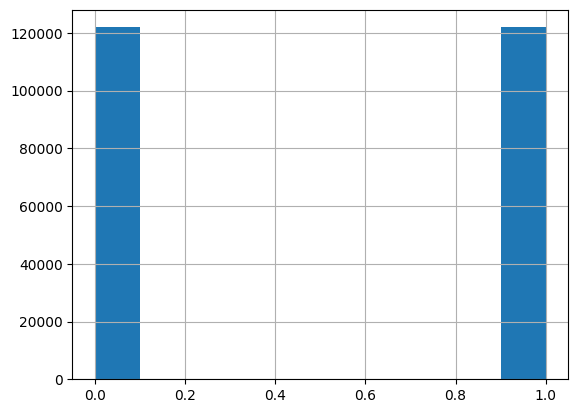

In [29]:
balanced_data['label'].hist()

In [30]:
#export
balanced_data.to_csv('balanced_data.csv')

# Check feature of importance using Random forest

## Feature of Importance

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the features and target variable
X = balanced_data.drop('label', axis=1)
y = balanced_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance'])
feature_importances.sort_values('importance', ascending=False, inplace=True)

# display the feature_importances DataFrame
print(feature_importances)

                                             importance
time_spent_platform_14d                        0.081752
pdp_views_14d                                  0.073657
avg_time_per_session_14d                       0.069284
total_login_sessions_l14d                      0.061430
total_login_days_l14d                          0.058195
...                                                 ...
new_buyer_initiative_Social Seller             0.000022
new_buyer_initiative_SPay - Online - Garena    0.000019
new_buyer_initiative_SPay - Offline - Micro    0.000018
new_buyer_initiative_Partner Voucher           0.000017
new_buyer_initiative_SPL Lite                  0.000009

[85 rows x 1 columns]


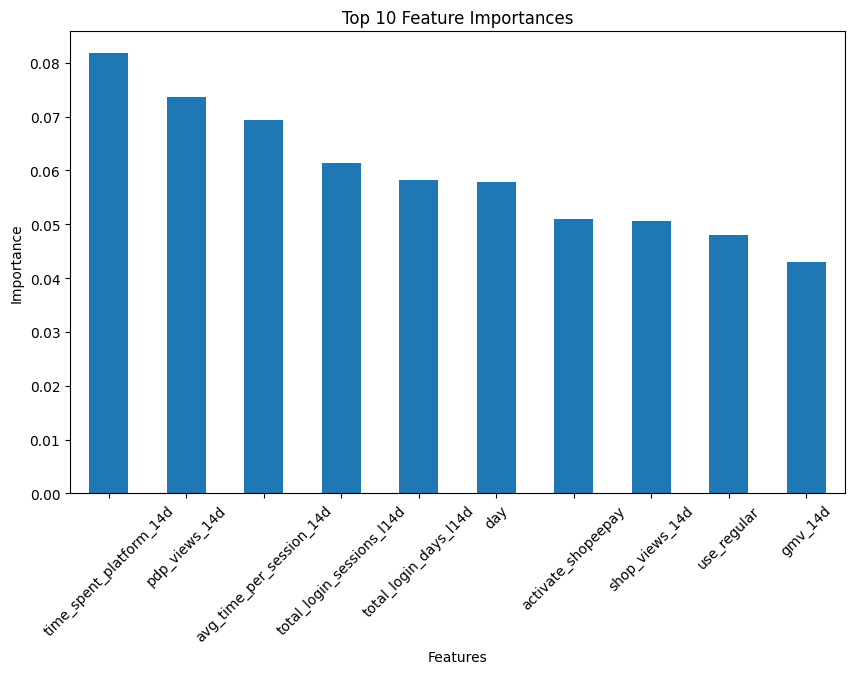

In [32]:
# visualize Feature of importance

# Plotting
plt.figure(figsize=(10, 6))
feature_importances['importance'].head(10).plot(kind='bar')  # Adjust to display more or fewer features
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

# Make simple predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7534148242339719


its just simple model training test accuracy, and result was not that bad.